Assignment 2

Task 1 : Ascending the Gradient Descent

In [332]:
import numpy as np

# Seed for reproducibility
np.random.seed(45)

# Generate data
num_samples = 40
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3 * x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

theta_0 = float(input("enter the value of theta_0"))
theta_1 = float(input("enter the value of theta_1"))


Q1. Use torch.autograd to find the true gradient on the above dataset using linear regression (in the form Theta1x+Theta0) for any given values of (Theta0,Theta1)

In [333]:
import torch

x_tensor = torch.tensor(x1, requires_grad=False).view(-1, 1)  
y_tensor = torch.tensor(y, requires_grad=False).view(-1, 1)  

theta0 = torch.tensor(theta_0, requires_grad=True)  
theta1 = torch.tensor(theta_1, requires_grad=True)  

# Define the linear model
def linear_model(x):
    return theta1 * x + theta0

# Predicting
y_pred = linear_model(x_tensor)

# calculating loss
loss = torch.mean((y_pred - y_tensor) ** 2)

# gradients calculation
loss.backward()

grad_theta0 = theta0.grad.item()
grad_theta1 = theta1.grad.item()

print(f"Gradient w.r.t theta0: {grad_theta0}")
print(f"Gradient w.r.t theta1: {grad_theta1}")



Gradient w.r.t theta0: -5.616434574127197
Gradient w.r.t theta1: -0.5629974603652954


tensor([-1.0000, -0.5000,  0.0000,  0.5000,  1.0000]) tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000])


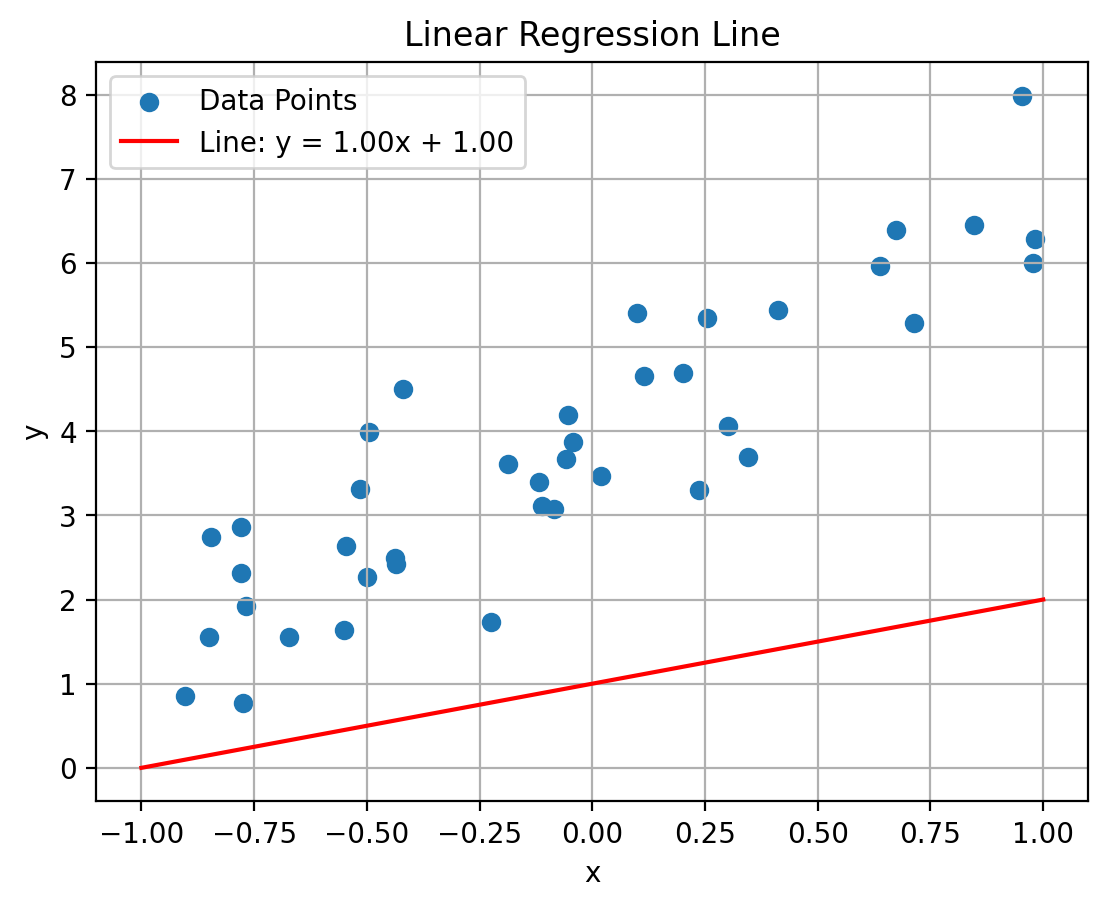

In [334]:
import matplotlib.pyplot as plt

# plotting data points
plt.scatter(x1, y, label='Data Points')

# plotting regression line
x_line = torch.linspace(-1,1,5)  
y_line = theta1.item() * x_line + theta0.item()  
print(x_line,y_line)

plt.plot(x_line.numpy(), y_line.numpy(), color='red', label=f'Line: y = {theta1.item():.2f}x + {theta0.item():.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Line')
plt.legend()
plt.grid(True)
plt.show()

Q.2 Using the same 
(theta0,theta1) as above, calculate the stochastic gradient for all points in the dataset. Then, find the average of all those gradients and show that the stochastic gradient is a good estimate of the true gradient.

In [335]:
grad_theta0_list = []
grad_theta1_list = []

# Compute gradients for all
for i in range(num_samples):
    theta0.grad = None
    theta1.grad = None
    
    y_pred = theta1 * x_tensor[i] + theta0  

    loss = (y_pred - y_tensor[i]) ** 2  
    
    loss.backward()
    
    grad_theta0_list.append(theta0.grad.item())
    grad_theta1_list.append(theta1.grad.item())

avg_grad_theta0 = np.mean(grad_theta0_list)
avg_grad_theta1 = np.mean(grad_theta1_list)

print(f"Average stochastic gradient w.r.t theta0: {avg_grad_theta0}")
print(f"Average stochastic gradient w.r.t theta1: {avg_grad_theta1}")
print(f"True gradient w.r.t theta0: {grad_theta0}")
print(f"True gradient w.r.t theta1: {grad_theta1}")
print(f"Difference in theta0: {avg_grad_theta0 - grad_theta0}")
print(f"Difference in theta1: {avg_grad_theta1 - grad_theta1}")

Average stochastic gradient w.r.t theta0: -5.616434797644615
Average stochastic gradient w.r.t theta1: -0.5629974387586116
True gradient w.r.t theta0: -5.616434574127197
True gradient w.r.t theta1: -0.5629974603652954
Difference in theta0: -2.2351741790771484e-07
Difference in theta1: 2.1606683775488023e-08


Q3. Implement full-batch, mini-batch and stochastic gradient descent. Calculate the average number of iterations required for each method to get sufficiently close to the optimal solution, where "sufficiently close" means within a distance of ϵ (or ϵ-neighborhood) from the minimum value of the loss function. Visualize the convergence process for 15 epochs Choose ϵ=0.001 for convergence criteria. Which optimization process takes a larger number of epochs to converge, and why? Show the contour plots for different epochs (or show an animation/GIF) for visualisation of optimisation process. Also, make a plot for Loss v/s epochs for all the methods

In [336]:
# Prepare the data for the normal equation
X = np.c_[np.ones(num_samples), x1]  
y = y.reshape(-1, 1)  

# Calculate optimal theta using the normal equation
theta_optimal = np.linalg.inv(X.T @ X) @ X.T @ y

theta0_optimal = theta_optimal[0, 0]
theta1_optimal = theta_optimal[1, 0]

print(f"Optimal θ0: {theta0_optimal}")
print(f"Optimal θ1: {theta1_optimal}")
print(theta_optimal)


Optimal θ0: 3.9507064023194527
Optimal θ1: 2.6824689259670587
[[3.9507064 ]
 [2.68246893]]


below I have set learning rates as,
0.1 for full
0.05 for mini batch
0.005 for SGD 

SGD converges fastest(in least epochs)

(done specially to compare 15 epochs, SGD converged too fast if not kept this learning rate.)

average epochs for convergence of full batch :  120
average epochs for convergence of mini batch :  150
average epochs for convergence of SGD :  22


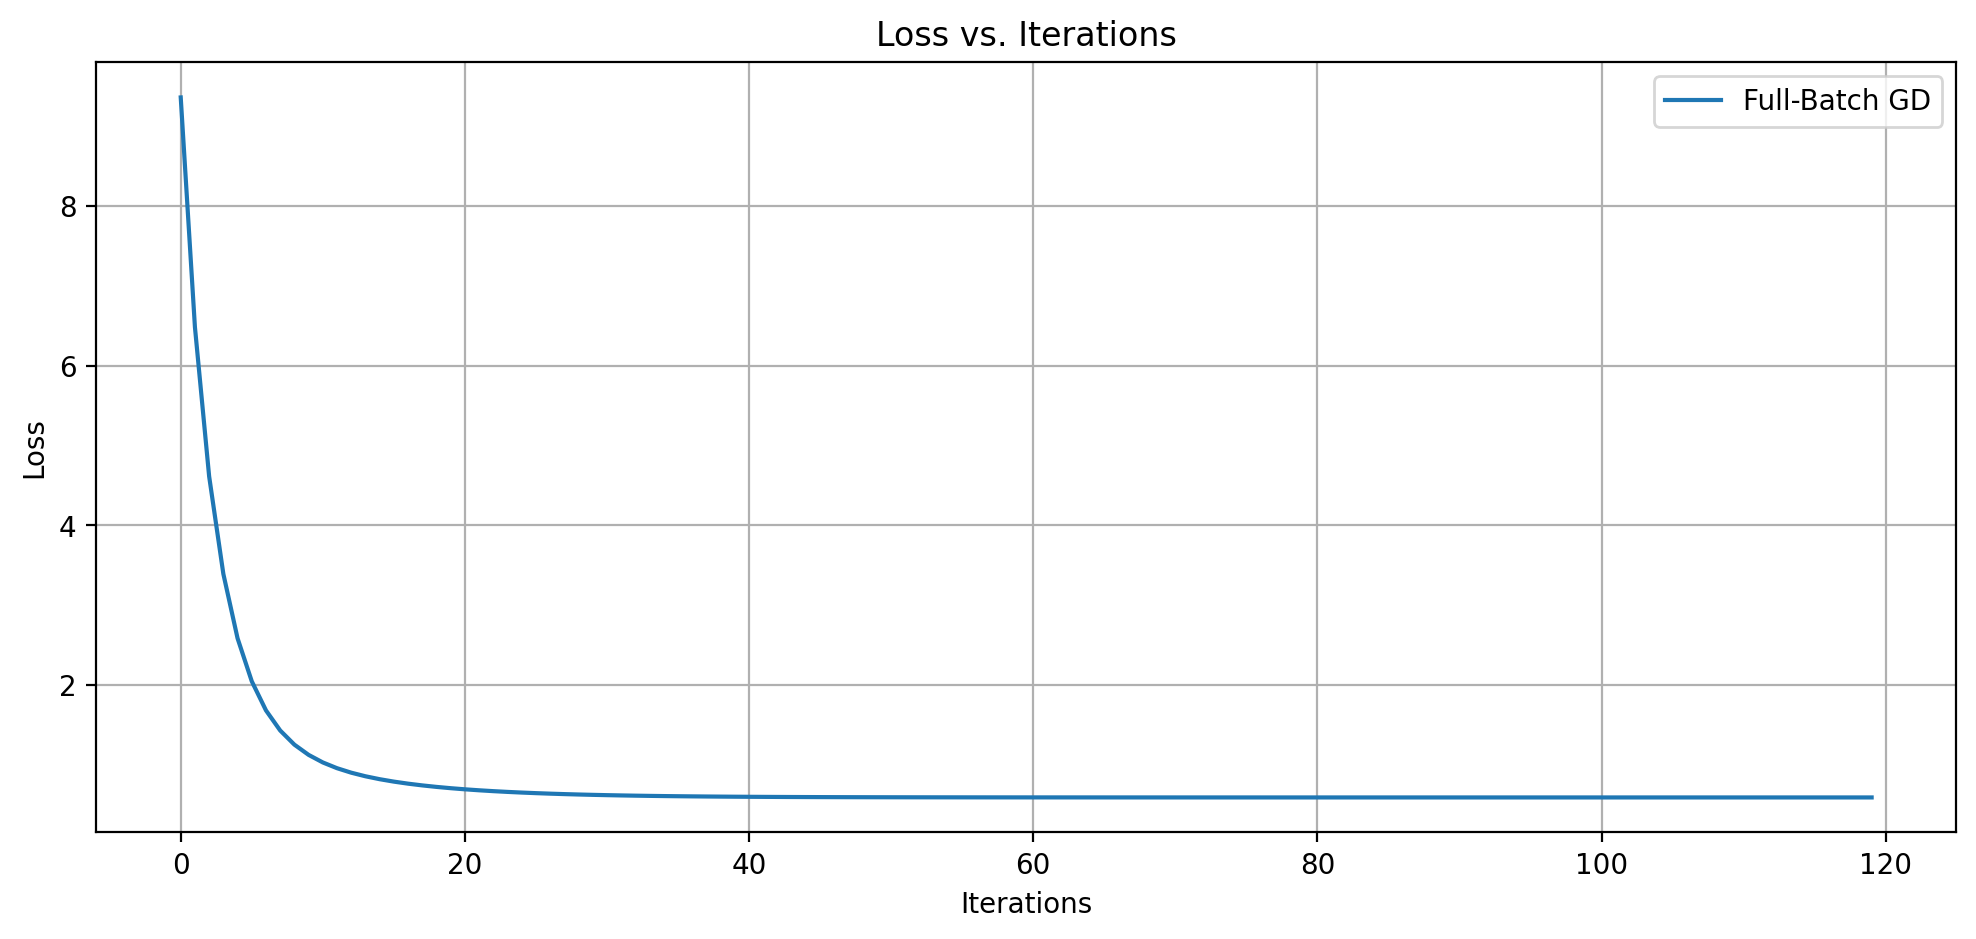

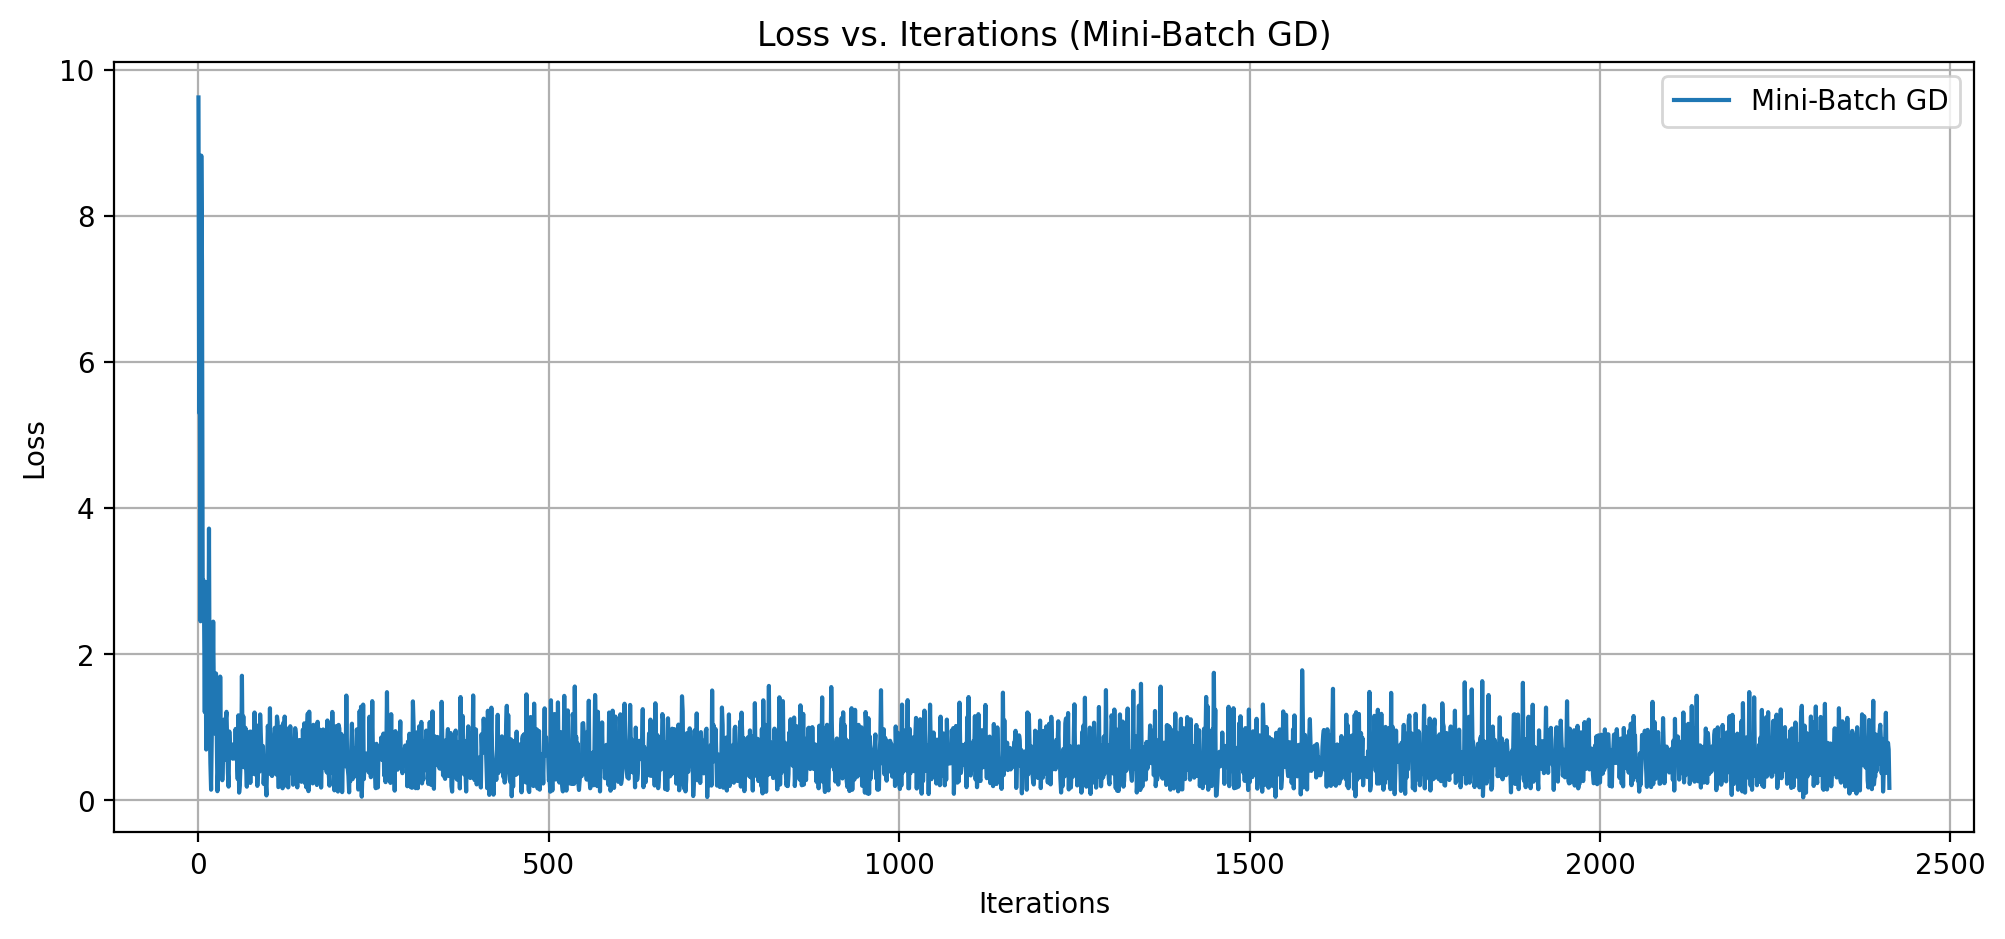

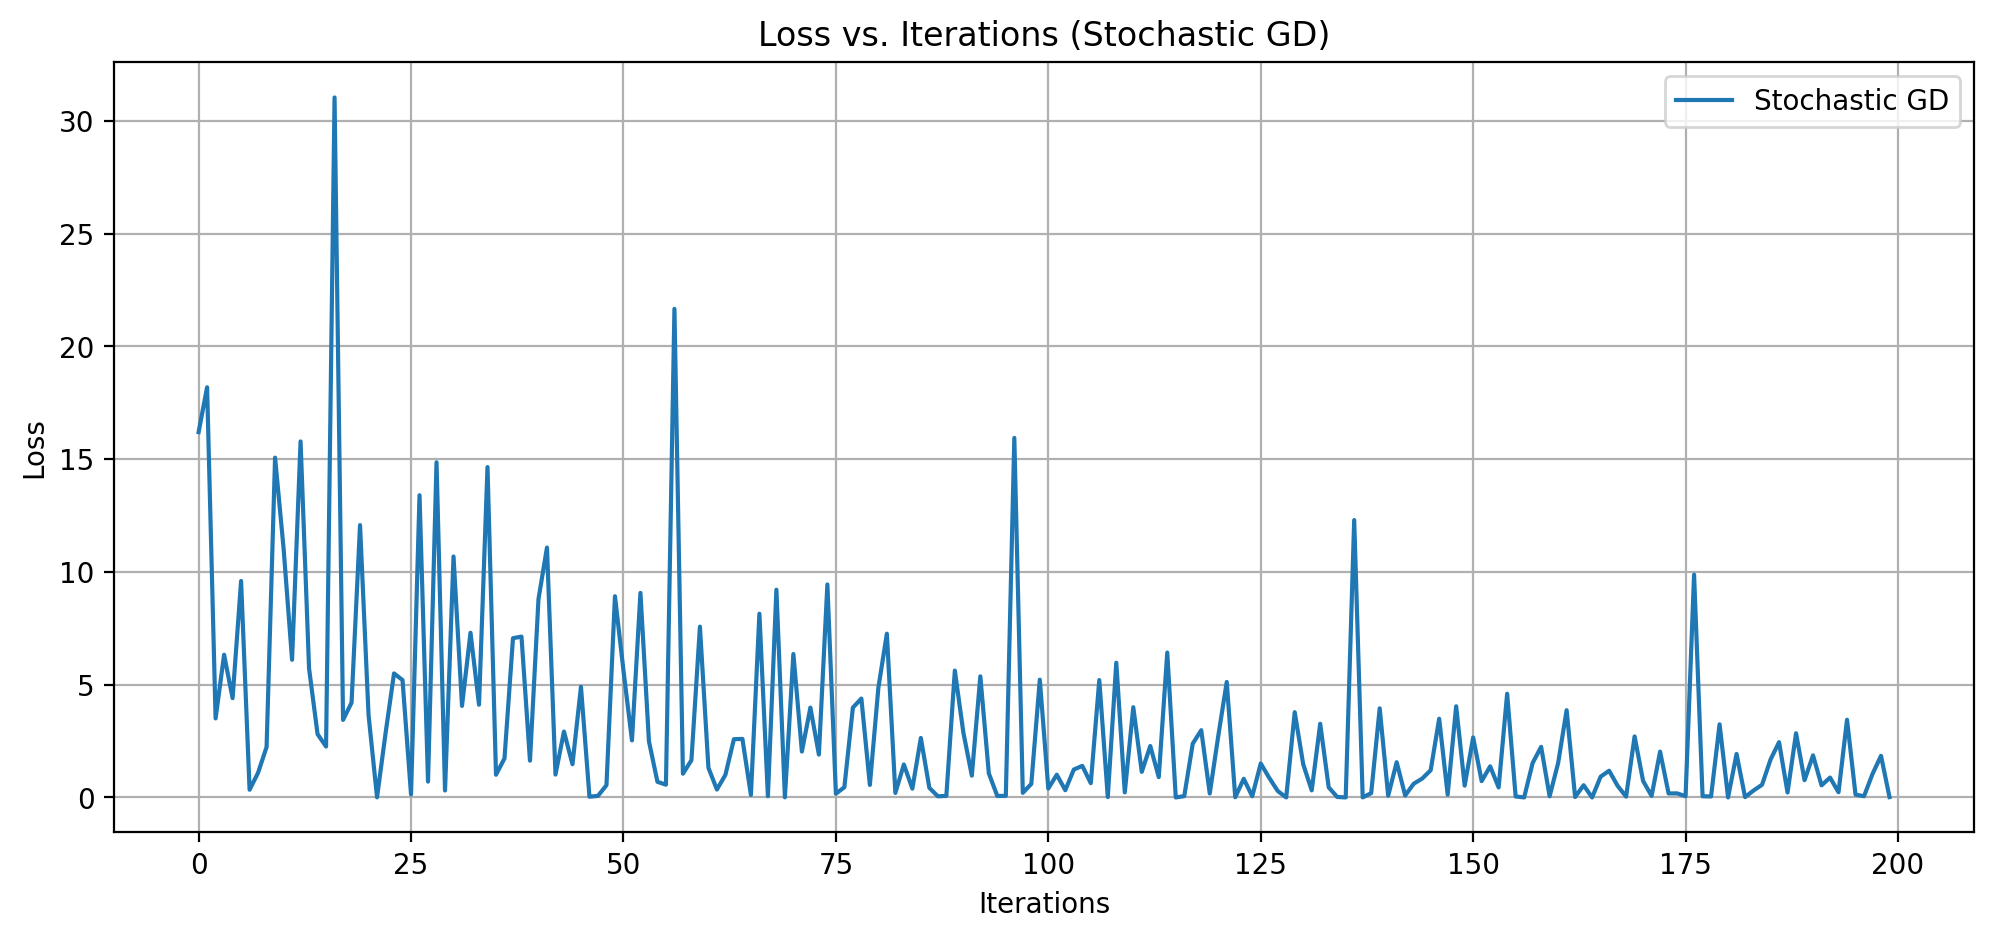

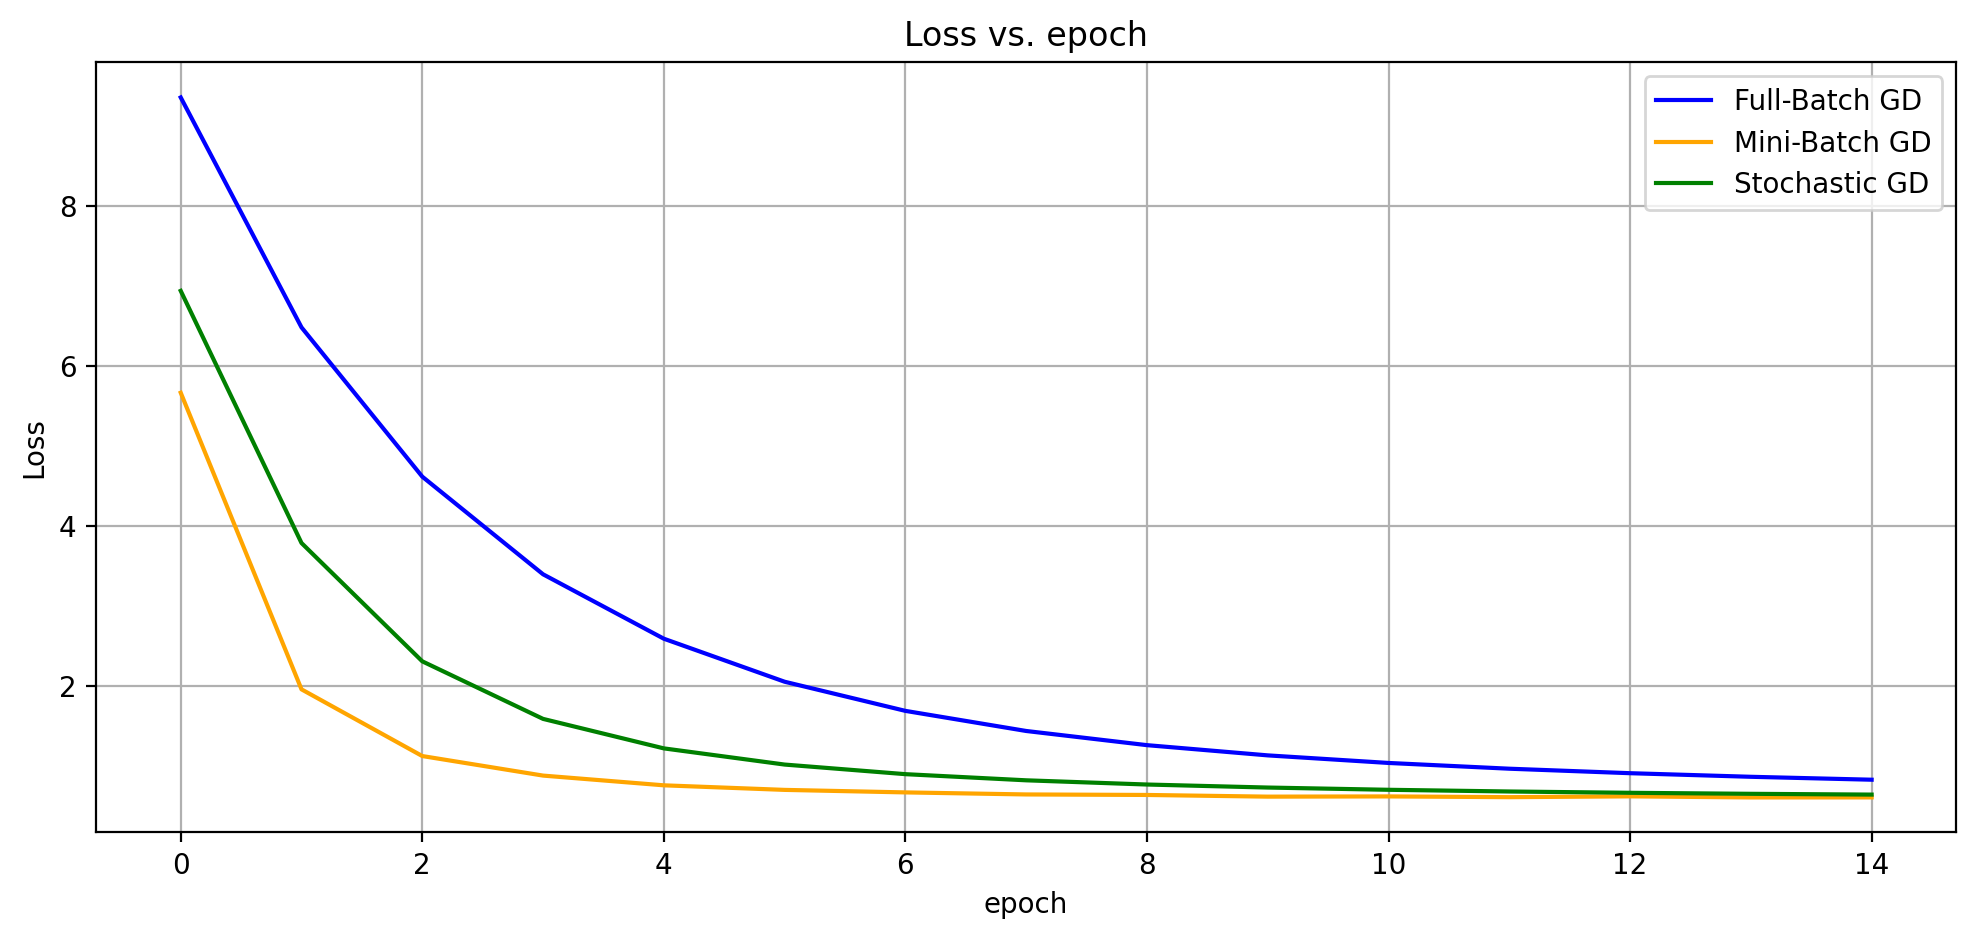

In [337]:
import matplotlib.animation as animation
import math

epochs = 500
epsilon = 0.001
batch_size = 5

def compute_loss(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

# Full-Batch Gradient Descent
def full_batch_gradient_descent(theta0_full, theta1_full, learning_rate=0.1):
    loss_history = []
    theta0_history = []
    theta1_history = []
    for epoch in range(epochs):
        y_pred = theta1_full * x_tensor + theta0_full
        loss = compute_loss(y_pred, y_tensor)
        loss.backward()

        # Update parameters
        with torch.no_grad():
            theta0_full -= learning_rate * theta0_full.grad
            theta1_full -= learning_rate * theta1_full.grad

        if math.fabs(theta0_optimal-theta0_full.item()) < epsilon and math.fabs(theta1_optimal-theta1_full.item()) < epsilon:
            break
        
        loss_history.append(loss.item())
        theta0_history.append(theta0_full.item())
        theta1_history.append(theta1_full.item())

        # Reset gradients
        theta0_full.grad = None
        theta1_full.grad = None
    return loss_history, theta0_history,theta1_history, epoch

# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(theta0_mini, theta1_mini, learning_rate=0.05):
    loss_history = []
    loss_after_epoch_mini = []
    theta_epoch_mini = []
    theta_0_history = []
    theta_1_history = []
    for epoch in range(epochs):
        perm = torch.randperm(num_samples)
        for i in range(0, num_samples, batch_size):
            indices = perm[i:i + batch_size]
            x_batch = x_tensor[indices]
            y_batch = y_tensor[indices]

            y_pred = theta1_mini * x_batch + theta0_mini
            loss = compute_loss(y_pred, y_batch)
            loss.backward()

            # Update parameters
            with torch.no_grad():
                theta0_mini -= learning_rate * theta0_mini.grad
                theta1_mini -= learning_rate * theta1_mini.grad

            if math.fabs(theta0_optimal-theta0_mini.item()) < epsilon and math.fabs(theta1_optimal-theta1_mini.item()) < epsilon:
                break

            loss_history.append(loss.item())
            theta_0_history.append(theta0_mini.item())
            theta_1_history.append(theta1_mini.item())

            # Reset gradients
            theta0_mini.grad = None
            theta1_mini.grad = None
        if math.fabs(theta0_optimal-theta0_mini.item()) < epsilon and math.fabs(theta1_optimal-theta1_mini.item()) < epsilon:
                break
        loss_after_epoch_mini.append((sum(loss_history[8*epoch:8*(epoch+1)])/8))
        theta_epoch_mini.append((theta0_mini.item(), theta1_mini.item()))
    return loss_history,theta_epoch_mini,loss_after_epoch_mini, epoch , theta_0_history , theta_1_history

# Stochastic Gradient Descent
def stochastic_gradient_descent(theta0_stochastic, theta1_stochastic, learning_rate=0.005):
    loss_history = []
    loss_after_epoch_SGD = []
    theta_epoch_sgd = []
    theta_0_history = []
    theta_1_history = []
    for epoch in range(epochs):
        for i in range(num_samples):
            y_pred = theta1_stochastic * x_tensor[i] + theta0_stochastic
            loss = compute_loss(y_pred, y_tensor[i:i + 1])
            loss.backward()

            with torch.no_grad():
                theta0_stochastic -= learning_rate * theta0_stochastic.grad
                theta1_stochastic -= learning_rate * theta1_stochastic.grad

            loss_history.append(loss.item())
            theta_0_history.append(theta0_stochastic.item())
            theta_1_history.append(theta1_stochastic.item())
            if math.fabs(theta0_optimal-theta0_stochastic.item()) < epsilon and math.fabs(theta1_optimal-theta1_stochastic.item()) < epsilon:
                break

            # Reset gradients
            theta0_stochastic.grad = None
            theta1_stochastic.grad = None

        loss_after_epoch_SGD.append(sum(loss_history[40*epoch:40*(epoch+1)])/40)
        theta_epoch_sgd.append((theta0_stochastic.item(), theta1_stochastic.item()))


        if math.fabs(theta0_optimal-theta0_stochastic.item()) < epsilon:
            break
    return loss_history,theta_epoch_sgd, loss_after_epoch_SGD, epoch ,theta_0_history, theta_1_history

# Run optimizers
epochs_full = 0
epochs_mini = 0
epochs_stochastic = 0
for i in range(10):
    theta0_full = torch.tensor(theta_0, requires_grad=True)
    theta1_full = torch.tensor(theta_1, requires_grad=True)
    theta0_mini = torch.tensor(theta_0, requires_grad=True)
    theta1_mini = torch.tensor(theta_1, requires_grad=True)
    theta0_stochastic = torch.tensor(theta_0, requires_grad=True)
    theta1_stochastic = torch.tensor(theta_1, requires_grad=True)
    loss_full, theta0_history_full, theta1_history_full, epochs_full_i = full_batch_gradient_descent(theta0_full, theta1_full)
    loss_mini, theta_epoch_mini, loss_epoch_mini, epochs_mini_i, theta_0_history_mini, theta_1_history_mini = mini_batch_gradient_descent(theta0_mini, theta1_mini)
    loss_stochastic,theta_epoch_sgd,loss_epoch_sgd, epochs_stochastic_i ,theta_0_history_sgd,theta_1_history_sgd = stochastic_gradient_descent(theta0_stochastic, theta1_stochastic)
    epochs_full = epochs_full+epochs_full_i
    epochs_mini = epochs_mini+epochs_mini_i
    epochs_stochastic = epochs_stochastic+epochs_stochastic_i
print("average epochs for convergence of full batch : ",int(epochs_full/10))
print("average epochs for convergence of mini batch : ",int(epochs_mini/10))
print("average epochs for convergence of SGD : ",int(epochs_stochastic/10))

# Plot Loss vs Epochs
plt.figure(figsize=(12, 5))
plt.plot(loss_full, label='Full-Batch GD')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(loss_mini, label='Mini-Batch GD')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations (Mini-Batch GD)')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(loss_stochastic[0:200], label='Stochastic GD')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations (Stochastic GD)')
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(12, 5))
plt.plot(loss_full[0:15], label='Full-Batch GD', color='blue')
plt.plot(loss_epoch_mini[0:15], label='Mini-Batch GD', color='orange')
plt.plot(loss_epoch_sgd[0:15], label='Stochastic GD', color='green')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss vs. epoch')
plt.legend()
plt.grid()
plt.show()




In [338]:
def evaluate_loss_grid(a, b, x1, y):
    grid_loss = np.zeros((len(a), len(b)))
    gradient_theta_0 = np.zeros((len(a), len(b)))
    gradient_theta_1 = np.zeros((len(a), len(b)))
    theta_0_c = torch.empty(1, requires_grad=True, dtype=torch.float32)
    theta_1_c = torch.empty(1, requires_grad=True, dtype=torch.float32)
    for i, theta_0_c in enumerate(a):
        for j, theta_1_c in enumerate(b):
            theta_0_stochastic = torch.tensor(theta_0_c, dtype=torch.float32, requires_grad=True)
            theta_1_stochastic = torch.tensor(theta_1_c, dtype=torch.float32, requires_grad=True)
            
            loss = torch.tensor(0.0)
            for k in range(len(y)):
                loss += torch.mean((y[k].item()- (theta_1_stochastic * x1[k].item() + theta_0_stochastic))**2)            
            loss.backward()
            
            grid_loss[i, j] = loss.item() / len(y)
            gradient_theta_0[i, j] = theta_0_stochastic.grad.item()
            gradient_theta_1[i, j] = theta_1_stochastic.grad.item()
            
            theta_0_stochastic.grad.zero_()
            theta_1_stochastic.grad.zero_()
    
    return grid_loss, gradient_theta_0, gradient_theta_1

a = np.linspace(0, 5, 100)
b = np.linspace(0, 5, 100)
X, Y = np.meshgrid(a, b)

grid_loss, gradient_theta_0, gradient_theta_1 = evaluate_loss_grid(a, b, x1, y)


In [339]:
def create_contour_plot(epoch, a, b, grid_loss,
                         theta_0_c, theta_1_c, prev_theta_0, prev_theta_1,mode):

    plt.figure(figsize=(8, 6))

    plt.scatter(theta_0_c, theta_1_c, color='white', edgecolor='black', s=30, zorder=5)
    plt.contourf(a, b, grid_loss.T, cmap='magma')
    plt.plot(prev_theta_0, prev_theta_1, color='r')

    plt.colorbar(label='Loss')
    plt.title(f'Contour Plot of Loss at Epoch {epoch}')
    plt.xlabel('Theta 0')
    plt.ylabel('Theta 1')

    plt.grid(True)
    plt.savefig(f' Aepoch_{epoch}_{mode}.png')
    plt.close()
#for full-batch
for epoch in range(0,120,4):

    create_contour_plot(epoch, a, b,
                         grid_loss, theta0_history_full[epoch],
                         theta1_history_full[epoch],
                         theta0_history_full[:epoch],
                         theta1_history_full[:epoch],'full')
    
#for sgd
for epoch in range(0,epochs_stochastic_i*40,50):

    create_contour_plot(epoch, a, b,
                         grid_loss, theta_0_history_sgd[epoch],
                         theta_1_history_sgd[epoch],
                         theta_0_history_sgd[:epoch],
                         theta_1_history_sgd[:epoch],'sgd')


#for mini
for epoch in range(0,epochs_mini_i*8,10):

    create_contour_plot(epoch, a, b,
                         grid_loss, theta_0_history_mini[epoch],
                         theta_1_history_mini[epoch],
                         theta_0_history_mini[:epoch],
                         theta_1_history_mini[:epoch],
                         'mini')
    


In [340]:

import imageio
def create_gif(epochs,steps,mode):
    images = []
    for epoch in range(0, epochs, steps):
        filename = f' Aepoch_{epoch}_{mode}.png'
        images.append(imageio.v2.imread(filename))
    imageio.mimsave(f'contour_plot_{mode}.gif', images, duration=0.5)

create_gif(epochs_stochastic_i*40,50,'sgd')
create_gif(120,4,'full')
create_gif(epochs_mini_i*8,10,'mini')

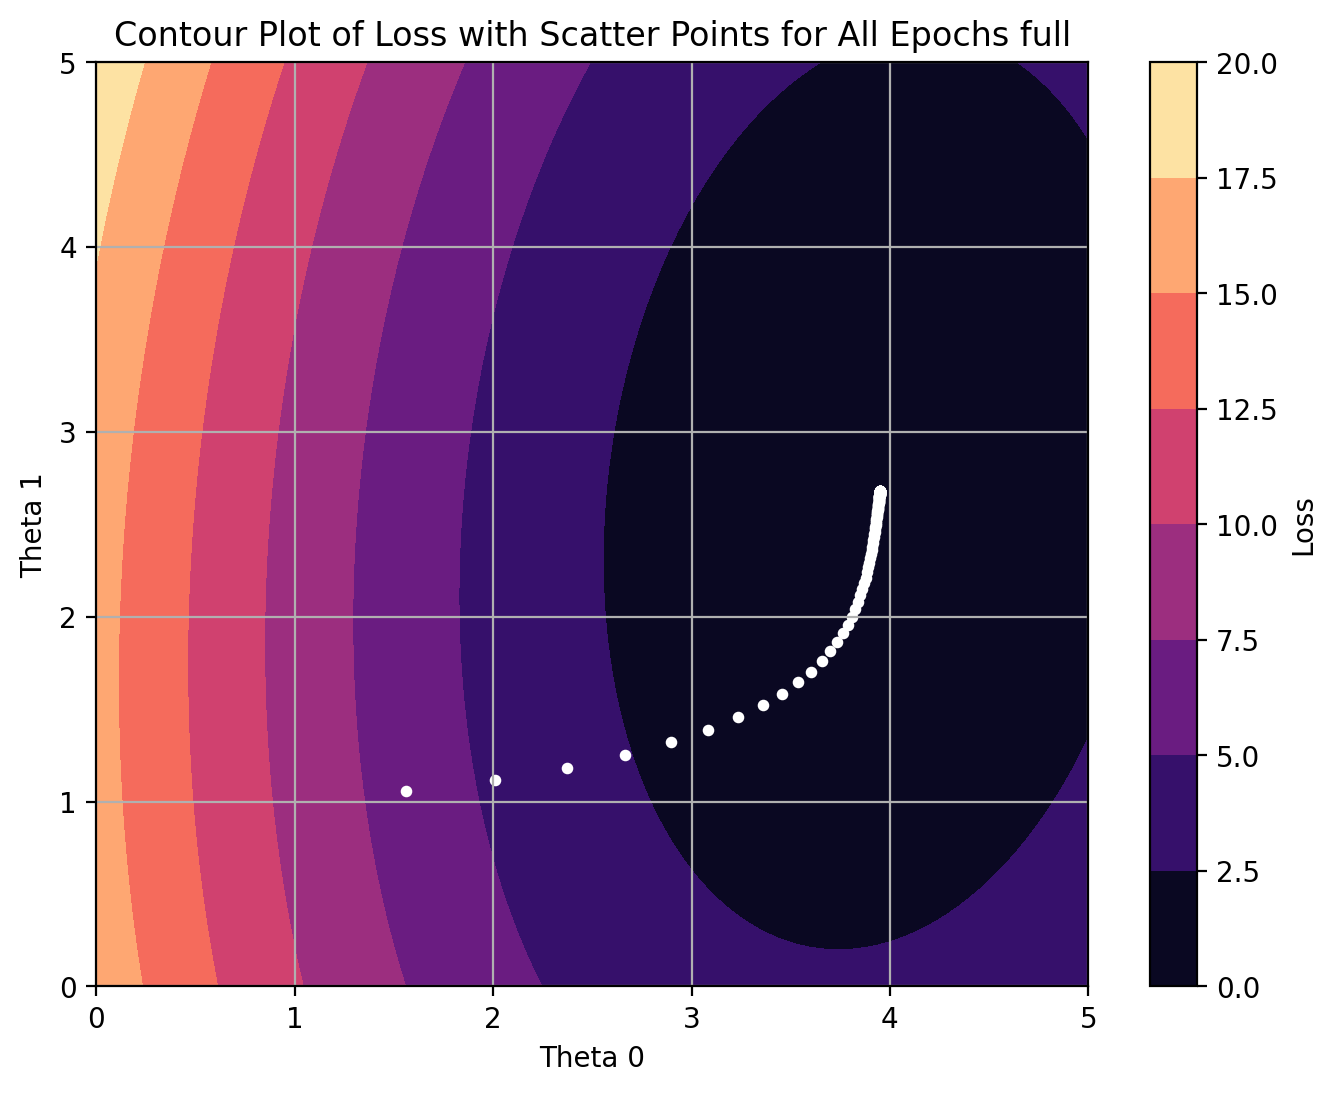

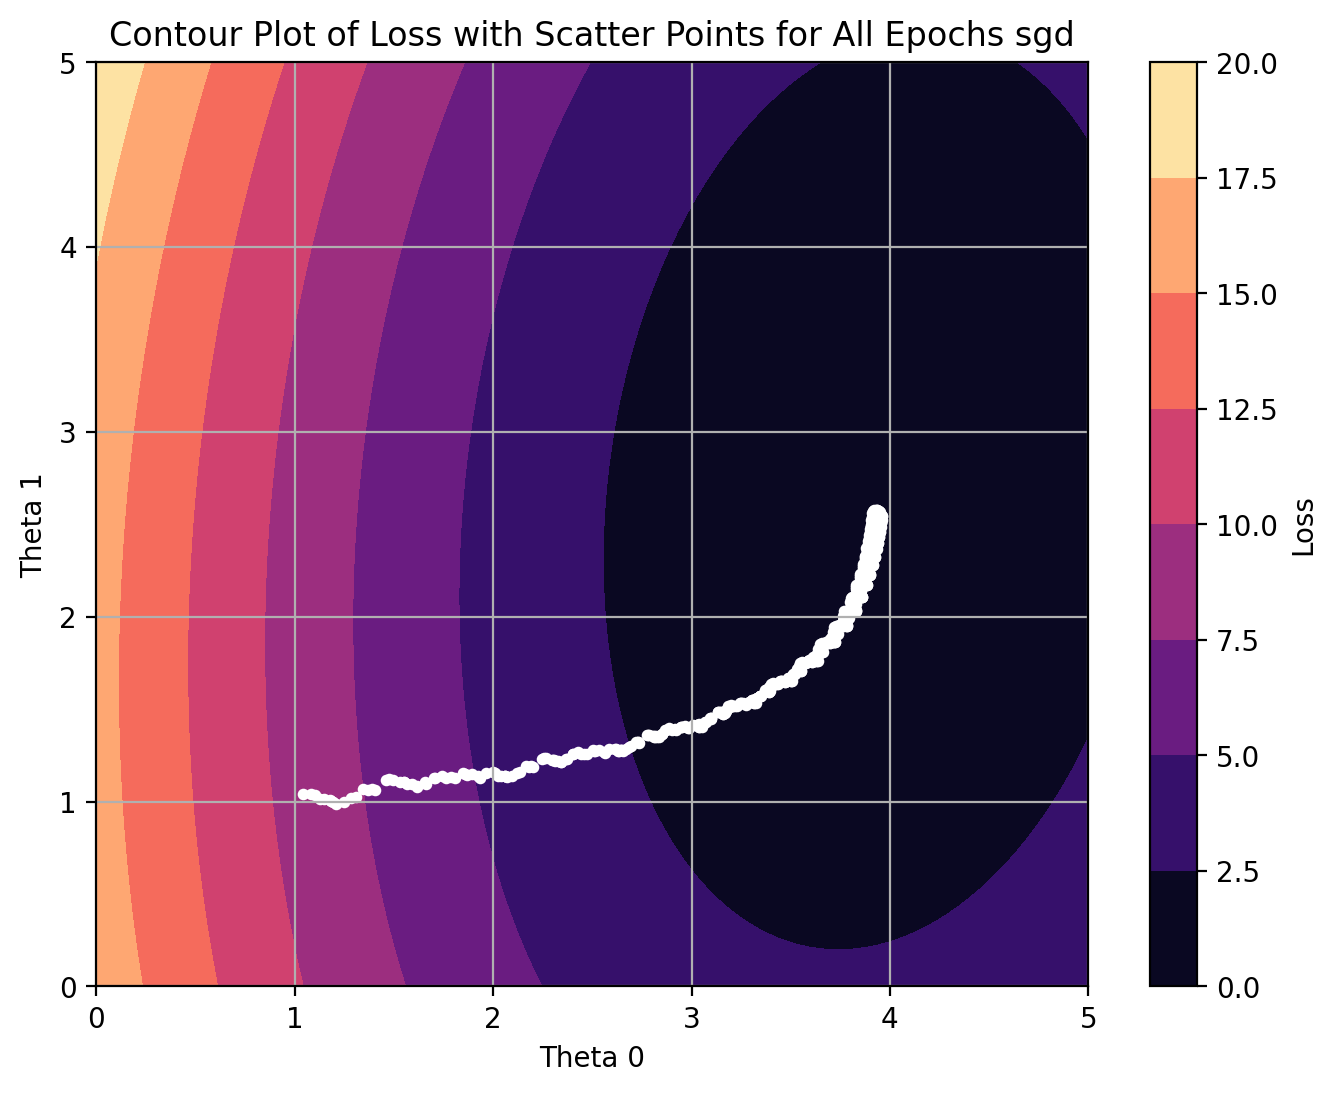

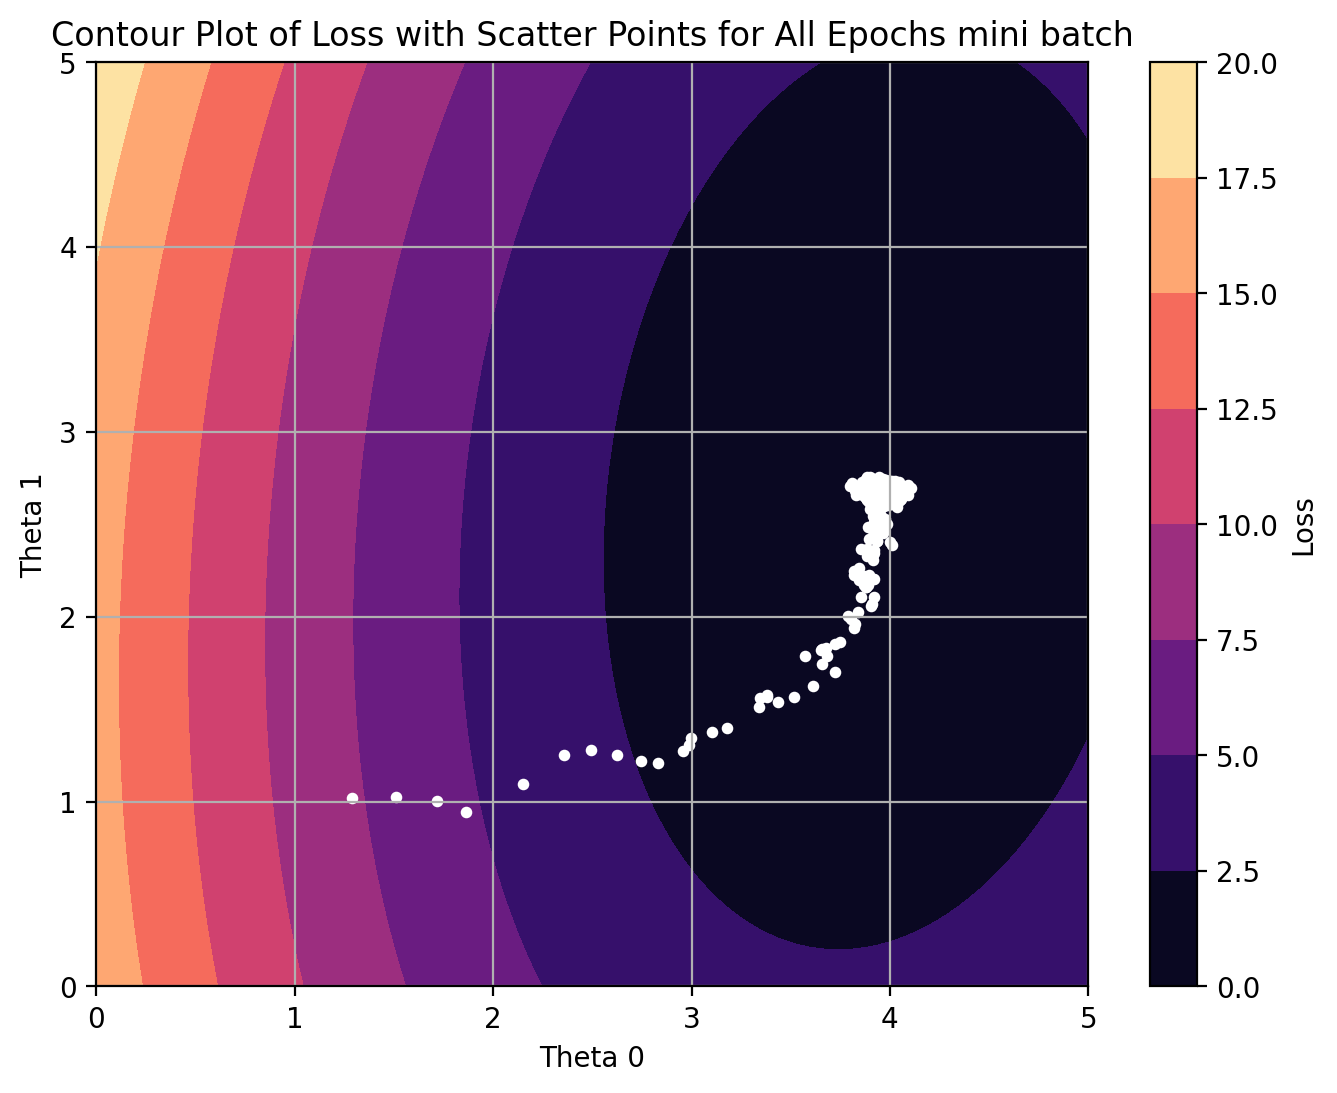

In [341]:
plt.figure(figsize=(8, 6))
plt.contourf(a, b, grid_loss.T, cmap='magma')
plt.colorbar(label='Loss')
plt.scatter(theta0_history_full, theta1_history_full, color='white', s=10)
plt.title('Contour Plot of Loss with Scatter Points for All Epochs full')
plt.xlabel('Theta 0')
plt.ylabel('Theta 1')
plt.grid(True)

plt.show()

plt.figure(figsize=(8, 6))
plt.contourf(a, b, grid_loss.T, cmap='magma')
plt.colorbar(label='Loss')
plt.scatter(theta_0_history_sgd, theta_1_history_sgd, color='white', s=10)
plt.title('Contour Plot of Loss with Scatter Points for All Epochs sgd')
plt.xlabel('Theta 0')
plt.ylabel('Theta 1')
plt.grid(True)

plt.show()

plt.figure(figsize=(8, 6))
plt.contourf(a, b, grid_loss.T, cmap='magma')
plt.colorbar(label='Loss')
plt.scatter(theta_0_history_mini, theta_1_history_mini, color='white', s=10)
plt.title('Contour Plot of Loss with Scatter Points for All Epochs mini batch')
plt.xlabel('Theta 0')
plt.ylabel('Theta 1')
plt.grid(True)

plt.show()

We noticed that the SGD converges in least Epoch, but it does not give smooth stabilized result because of changing the parameters too many times.
Full-batch generallly takes maximum Epochs but it is very stabilized. mini batch is mixture of both.

Q4. Explore the article here on gradient descent with momentum. Implement gradient descent with momentum for the dataset. Visualize the convergence process for 15 steps. Compare the average number of steps taken with gradient descent (for variants full batch and stochastic) with momentum to that of vanilla gradient descent to converge to an ϵ-neighborhood for both dataset. Choose ϵ=0.001. Write down your observations. Show the contour plots for different epochs for momentum implementation. Specifically, show all the vectors: gradient, current value of theta, momentum, etc. 

average epochs for convergence of full batch with momentum :  145
average epochs for convergence of mini batch with momeentum :  44
average epochs for convergence of SGD with momentum :  499


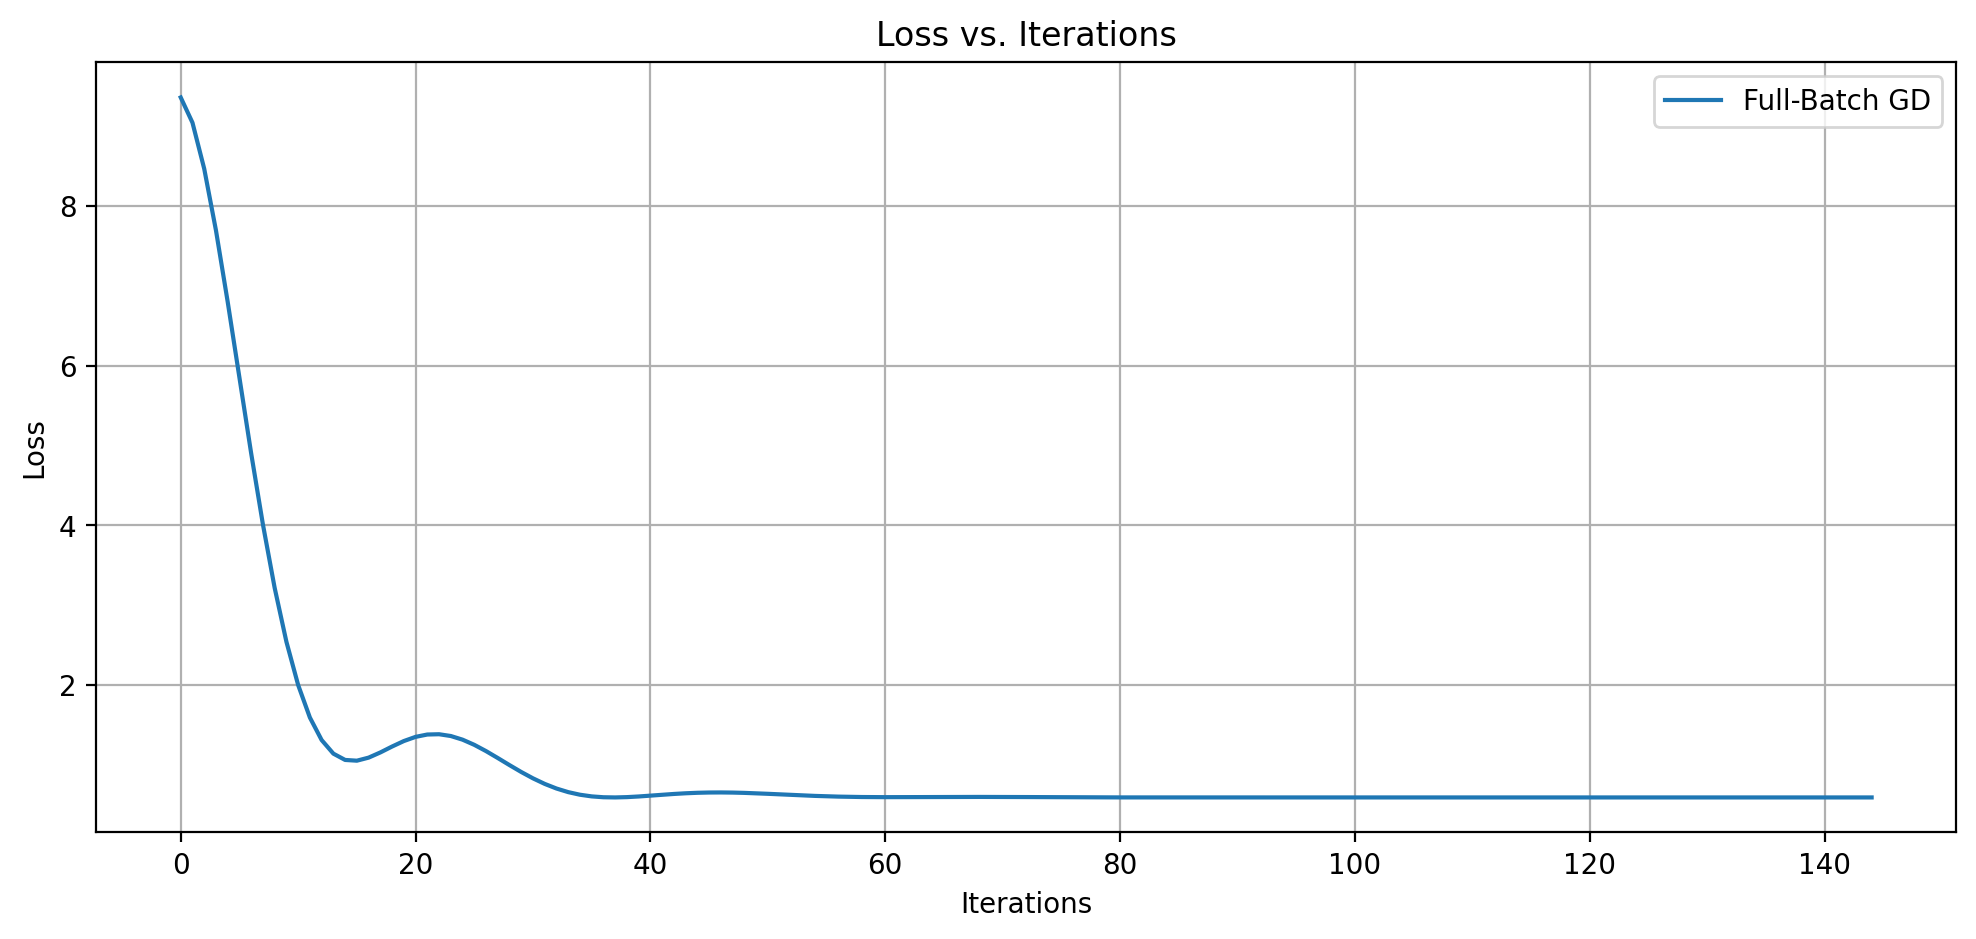

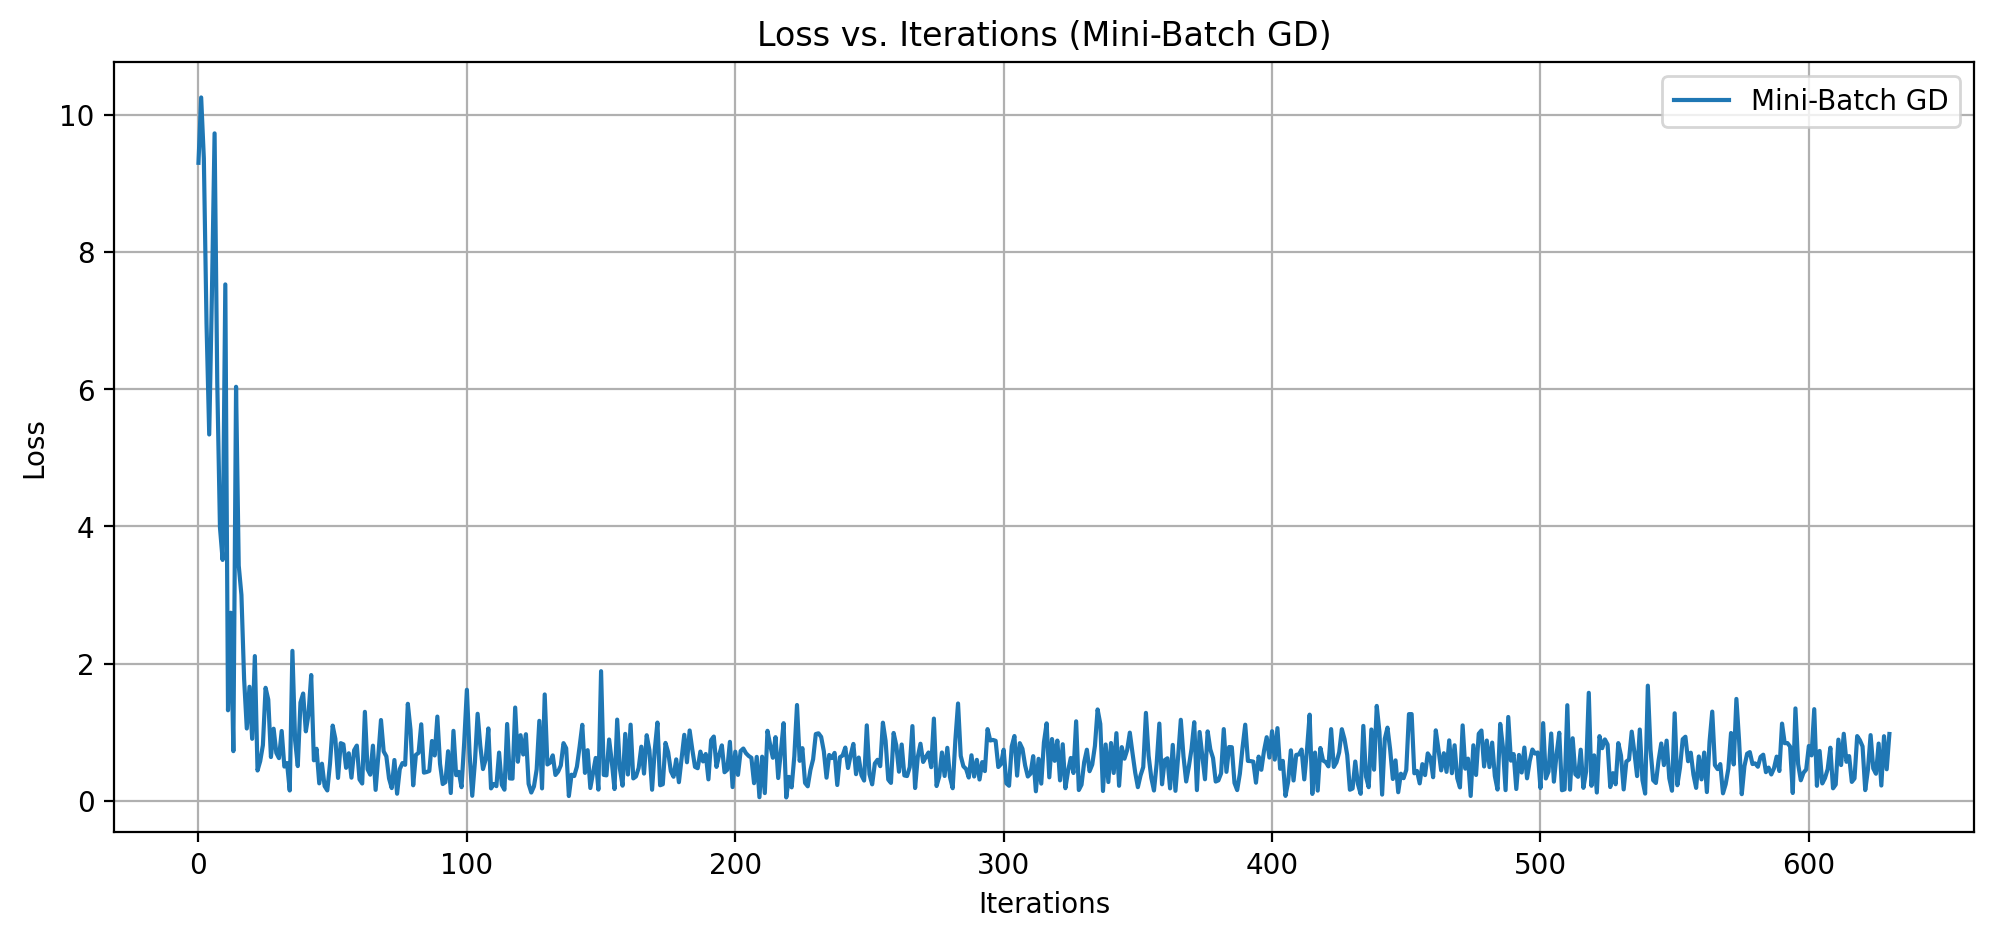

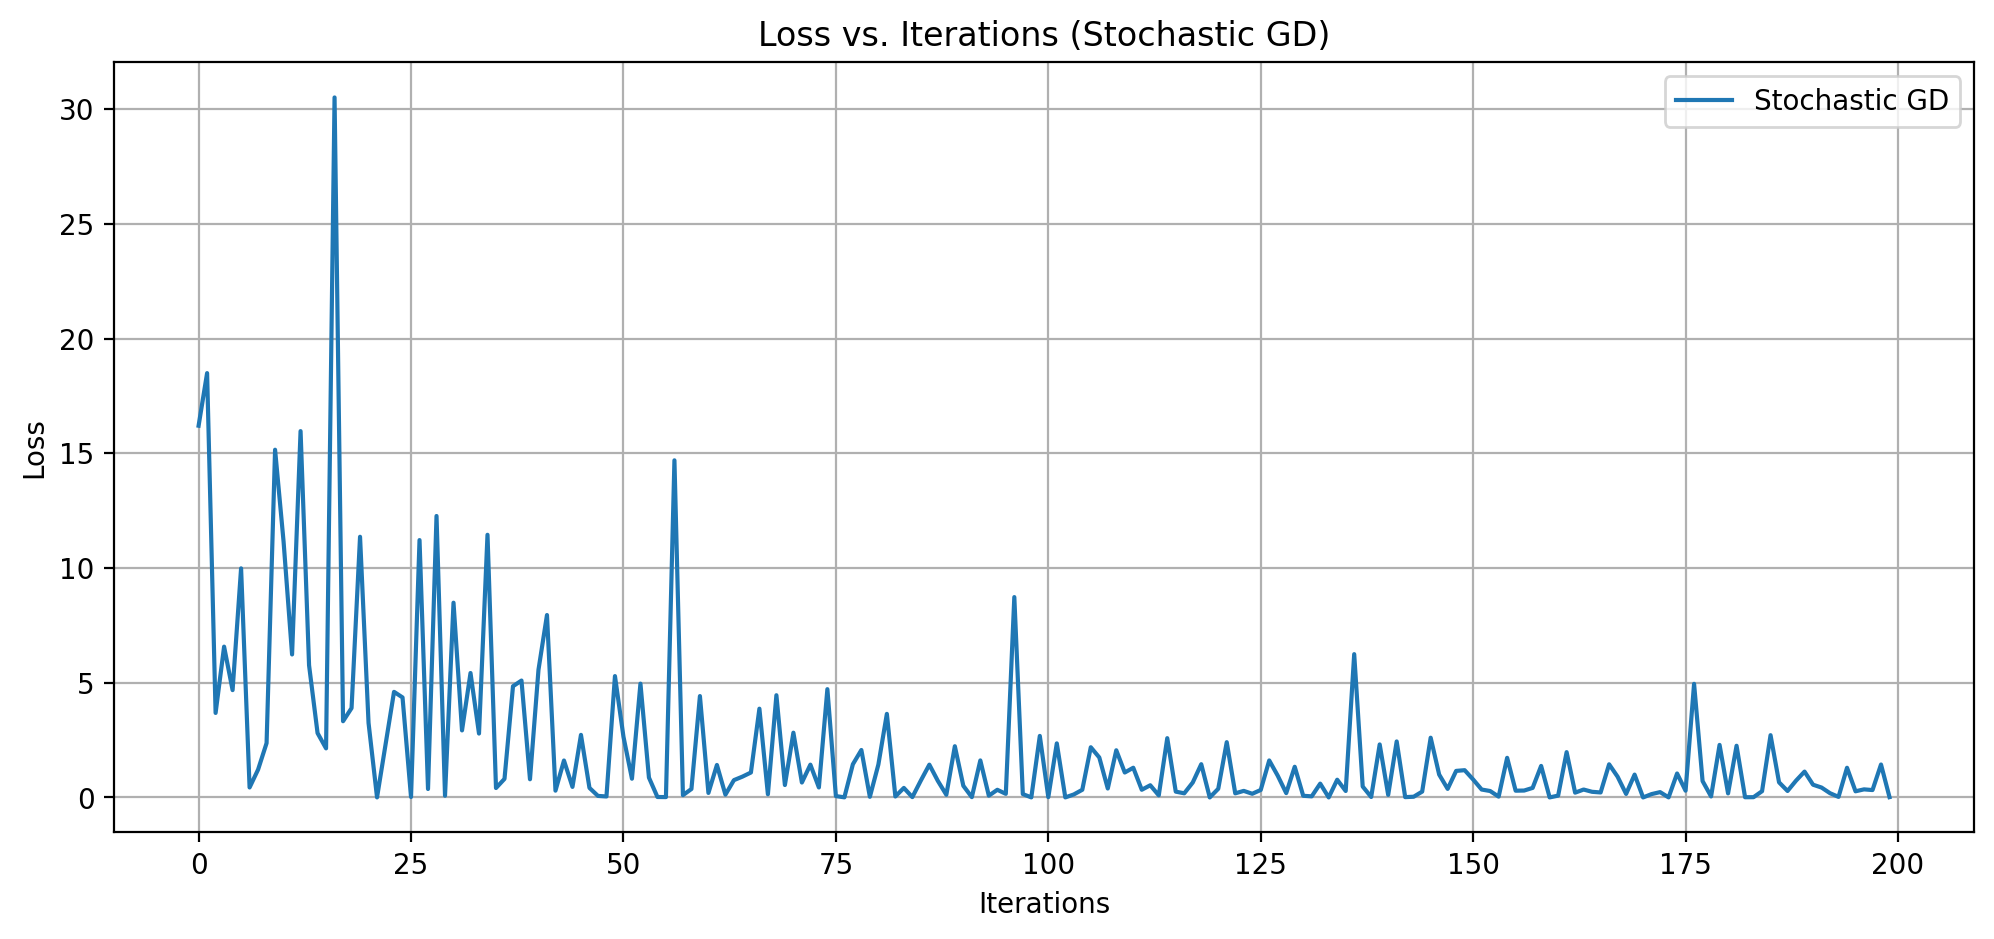

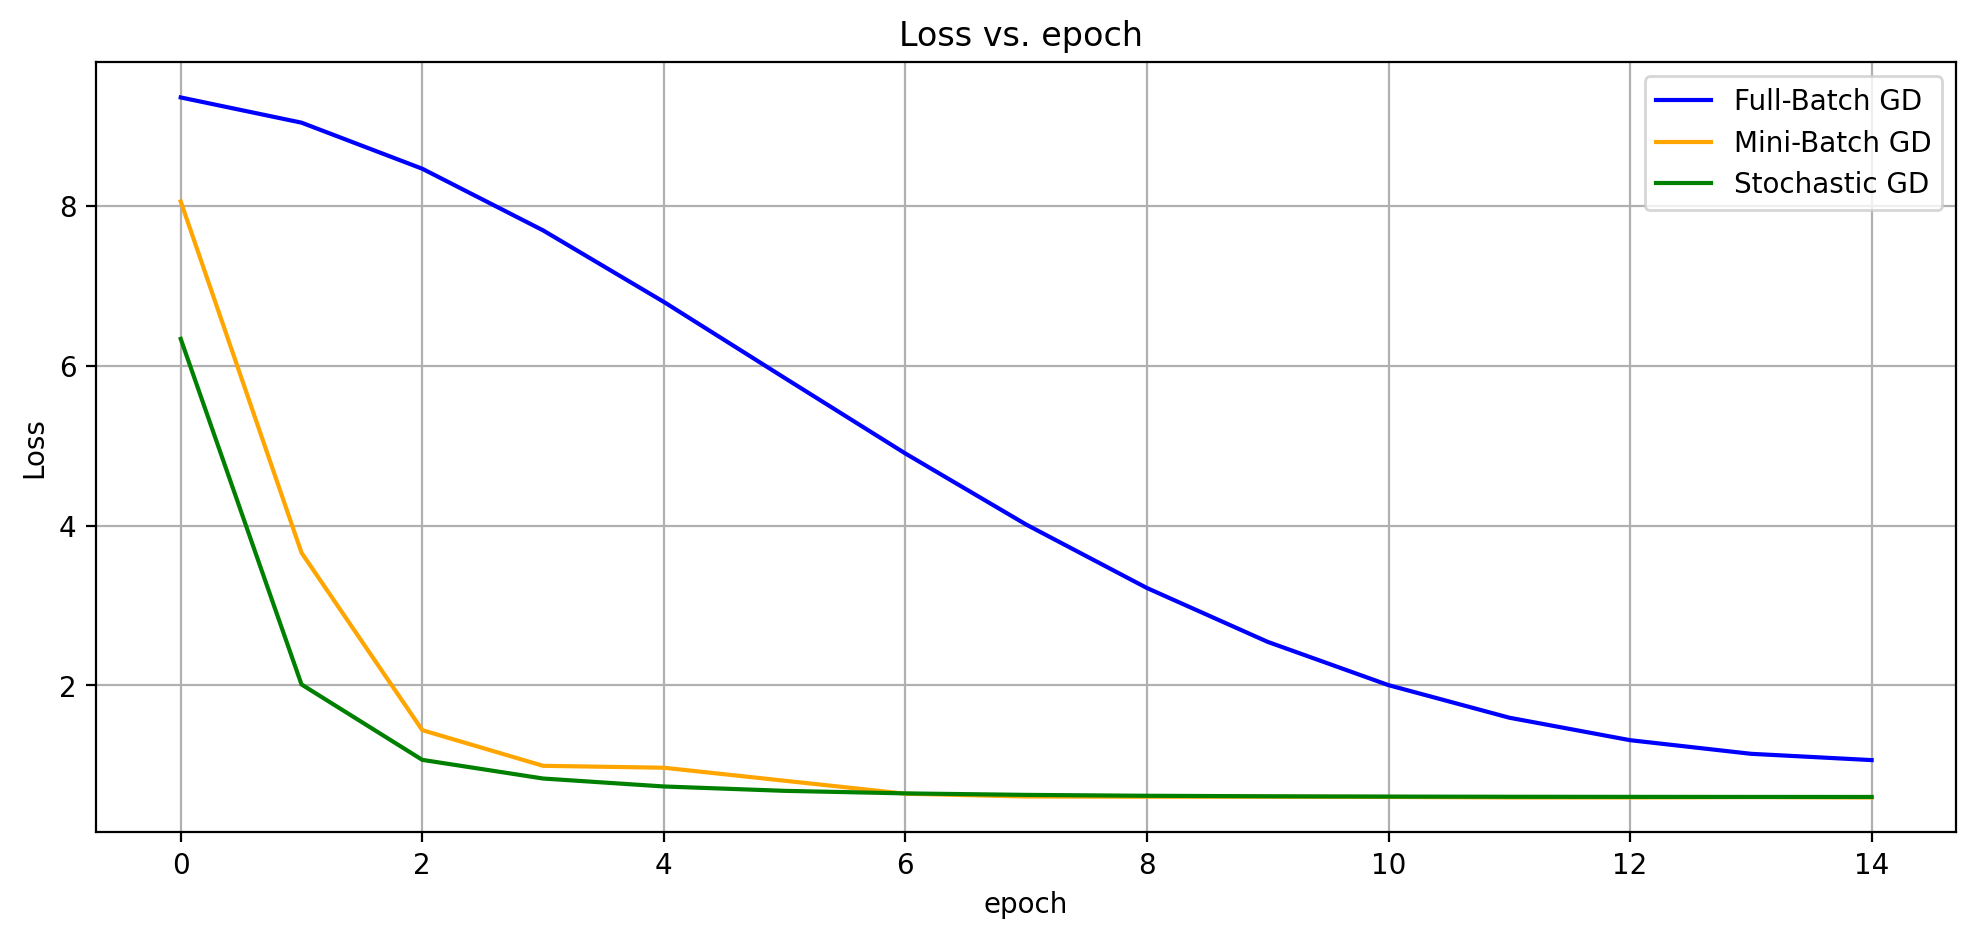

In [342]:
import math

epochs = 500
epsilon = 0.001

# Define the loss function
def compute_loss(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

# Full-Batch Gradient Descent
def full_batch_gradient_descent_momentum(theta0_full, theta1_full, learning_rate=0.01):
    loss_history = []
    theta0_history = []
    theta1_history = []
    momentum = 0.9
    prev_change_theta_0 = 0
    prev_change_theta_1 = 0
    for epoch in range(epochs):
        y_pred = theta1_full * x_tensor + theta0_full
        loss = compute_loss(y_pred, y_tensor)
        loss.backward()

        # Update parameters
        with torch.no_grad():
            change_theta_0 = learning_rate*theta0_full.grad + momentum*prev_change_theta_0
            change_theta_1 = learning_rate*theta1_full.grad + momentum*prev_change_theta_1

            theta0_full -= change_theta_0
            theta1_full -= change_theta_1

            prev_change_theta_0 = change_theta_0
            prev_change_theta_1 = change_theta_1

        if math.fabs(theta0_optimal-theta0_full.item()) < epsilon and math.fabs(theta1_optimal-theta1_full.item()) < epsilon:
            break
        
        loss_history.append(loss.item())
        theta0_history.append(theta0_full.item())
        theta1_history.append(theta1_full.item())

        # Reset gradients
        theta0_full.grad = None
        theta1_full.grad = None
    return loss_history, theta0_history,theta1_history, epoch

# Mini-Batch Gradient Descent
def mini_batch_gradient_descent_momentum(theta0_mini, theta1_mini, learning_rate=0.005):
    loss_history = []
    loss_after_epoch_mini = []
    theta_epoch_mini = []
    theta_0_history = []
    theta_1_history = []
    momentum = 0.9
    prev_change_theta_0 = 0
    prev_change_theta_1 = 0
    for epoch in range(epochs):
        perm = torch.randperm(num_samples)
        for i in range(0, num_samples, batch_size):
            indices = perm[i:i + batch_size]
            x_batch = x_tensor[indices]
            y_batch = y_tensor[indices]

            y_pred = theta1_mini * x_batch + theta0_mini
            loss = compute_loss(y_pred, y_batch)
            loss.backward()

            # Update parameters
            with torch.no_grad():
                change_theta_0 = learning_rate*theta0_mini.grad + momentum*prev_change_theta_0
                change_theta_1 = learning_rate*theta1_mini.grad + momentum*prev_change_theta_1

                theta0_mini -= change_theta_0
                theta1_mini -= change_theta_1

                prev_change_theta_0 = change_theta_0
                prev_change_theta_1 = change_theta_1

            if math.fabs(theta0_optimal-theta0_mini.item()) < epsilon and math.fabs(theta1_optimal-theta1_mini.item()) < epsilon:
                break

            loss_history.append(loss.item())
            theta_0_history.append(theta0_mini.item())
            theta_1_history.append(theta1_mini.item())

            # Reset gradients
            theta0_mini.grad = None
            theta1_mini.grad = None
        if math.fabs(theta0_optimal-theta0_mini.item()) < epsilon and math.fabs(theta1_optimal-theta1_mini.item()) < epsilon:
                break
        loss_after_epoch_mini.append((sum(loss_history[8*epoch:8*(epoch+1)])/8))
        theta_epoch_mini.append((theta0_mini.item(), theta1_mini.item()))
    return loss_history,theta_epoch_mini,loss_after_epoch_mini, epoch , theta_0_history , theta_1_history

# Stochastic Gradient Descent
def stochastic_gradient_descent_momentum(theta0_stochastic, theta1_stochastic, learning_rate=0.001):
    loss_history = []
    loss_after_epoch_SGD = []
    theta_epoch_sgd = []
    theta_0_history = []
    theta_1_history = []
    momentum = 0.9
    prev_change_theta_0 = 0
    prev_change_theta_1 = 0
    for epoch in range(epochs):
        for i in range(num_samples):
            y_pred = theta1_stochastic * x_tensor[i] + theta0_stochastic
            loss = compute_loss(y_pred, y_tensor[i:i + 1])
            loss.backward()

            # Update parameters
            with torch.no_grad():
                change_theta_0 = learning_rate*theta0_stochastic.grad + momentum*prev_change_theta_0
                change_theta_1 = learning_rate*theta1_stochastic.grad + momentum*prev_change_theta_1

                theta0_stochastic -= change_theta_0
                theta1_stochastic -= change_theta_1

                prev_change_theta_0 = change_theta_0
                prev_change_theta_1 = change_theta_1

            loss_history.append(loss.item())
            theta_0_history.append(theta0_stochastic.item())
            theta_1_history.append(theta1_stochastic.item())
            if math.fabs(theta0_optimal-theta0_stochastic.item()) < epsilon and math.fabs(theta1_optimal-theta1_stochastic.item()) < epsilon:
                break


            # Reset gradients
            theta0_stochastic.grad = None
            theta1_stochastic.grad = None

        loss_after_epoch_SGD.append(sum(loss_history[40*epoch:40*(epoch+1)])/40)
        theta_epoch_sgd.append((theta0_stochastic.item(), theta1_stochastic.item()))


        if math.fabs(theta0_optimal-theta0_stochastic.item()) < epsilon:
            break
    return loss_history,theta_epoch_sgd, loss_after_epoch_SGD, epoch ,theta_0_history, theta_1_history

# Run optimizers
epochs_full_mom = 0
epochs_mini_mom = 0
epochs_stochastic_mom = 0
for i in range(10):
    theta0_full_mom = torch.tensor(theta_0, requires_grad=True)
    theta1_full_mom = torch.tensor(theta_1, requires_grad=True)
    theta0_mini_mom = torch.tensor(theta_0, requires_grad=True)
    theta1_mini_mom = torch.tensor(theta_1, requires_grad=True)
    theta0_stochastic_mom = torch.tensor(theta_0, requires_grad=True)
    theta1_stochastic_mom = torch.tensor(theta_1, requires_grad=True)
    loss_full_mom, theta0_history_full_mom, theta1_history_full_mom, epochs_full_i_mom = full_batch_gradient_descent_momentum(theta0_full_mom, theta1_full_mom)
    loss_mini_mom, theta_epoch_mini_mom, loss_epoch_mini_mom, epochs_mini_i_mom, theta_0_history_mini_mom, theta_1_history_mini_mom = mini_batch_gradient_descent_momentum(theta0_mini_mom, theta1_mini_mom)
    loss_stochastic_mom,theta_epoch_sgd_mom,loss_epoch_sgd_mom, epochs_stochastic_i_mom ,theta_0_history_sgd_mom,theta_1_history_sgd_mom = stochastic_gradient_descent_momentum(theta0_stochastic_mom, theta1_stochastic_mom)
    epochs_full_mom = epochs_full_mom+epochs_full_i_mom
    epochs_mini_mom = epochs_mini_mom+epochs_mini_i_mom
    epochs_stochastic_mom = epochs_stochastic_mom+epochs_stochastic_i_mom
print("average epochs for convergence of full batch with momentum : ",int(epochs_full_mom/10))
print("average epochs for convergence of mini batch with momeentum : ",int(epochs_mini_mom/10))
print("average epochs for convergence of SGD with momentum : ",int(epochs_stochastic_mom/10))

# Plot Loss vs Epochs
plt.figure(figsize=(12, 5))
plt.plot(loss_full_mom, label='Full-Batch GD')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(loss_mini_mom, label='Mini-Batch GD')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations (Mini-Batch GD)')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(loss_stochastic_mom[0:200], label='Stochastic GD')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations (Stochastic GD)')
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(12, 5))
plt.plot(loss_full_mom[0:15], label='Full-Batch GD', color='blue')
plt.plot(loss_epoch_mini_mom[0:15], label='Mini-Batch GD', color='orange')
plt.plot(loss_epoch_sgd_mom[0:15], label='Stochastic GD', color='green')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss vs. epoch ')
plt.legend()
plt.grid()
plt.show()



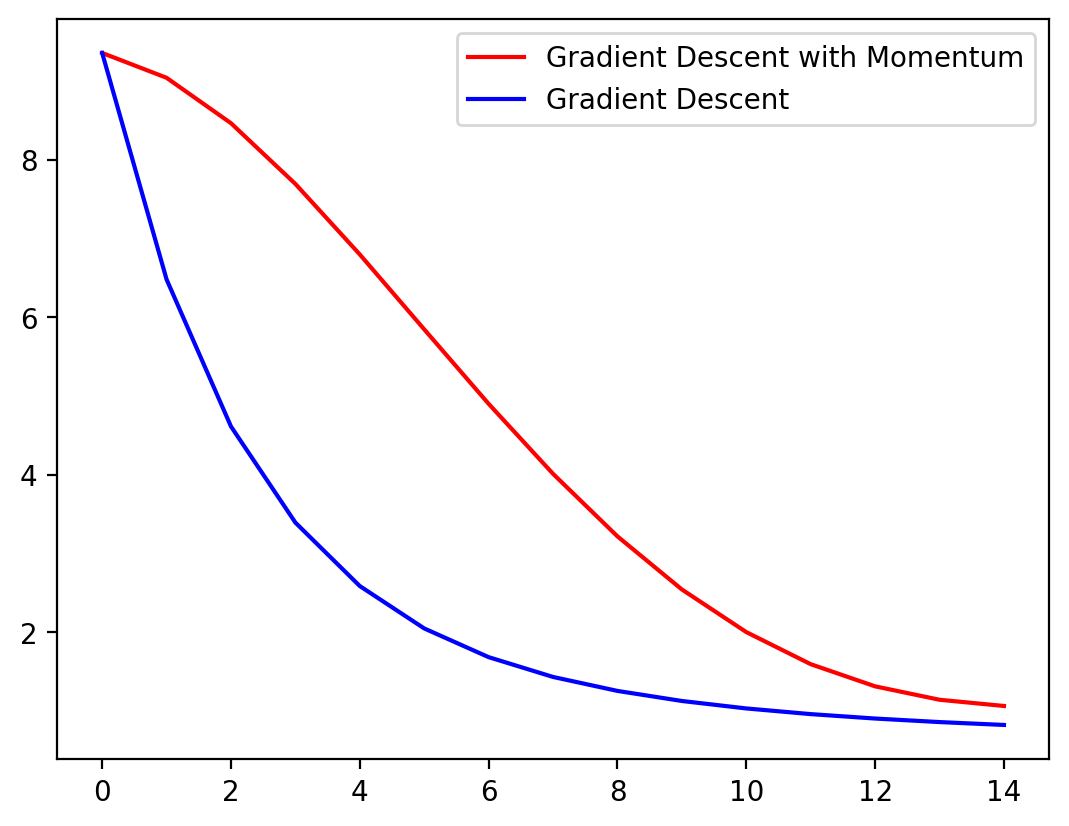

In [343]:
plt.plot(loss_full_mom[:15], color='r', label="Gradient Descent with Momentum")
plt.plot(loss_full[:15], color='b', label="Gradient Descent")
plt.legend()
plt.show()


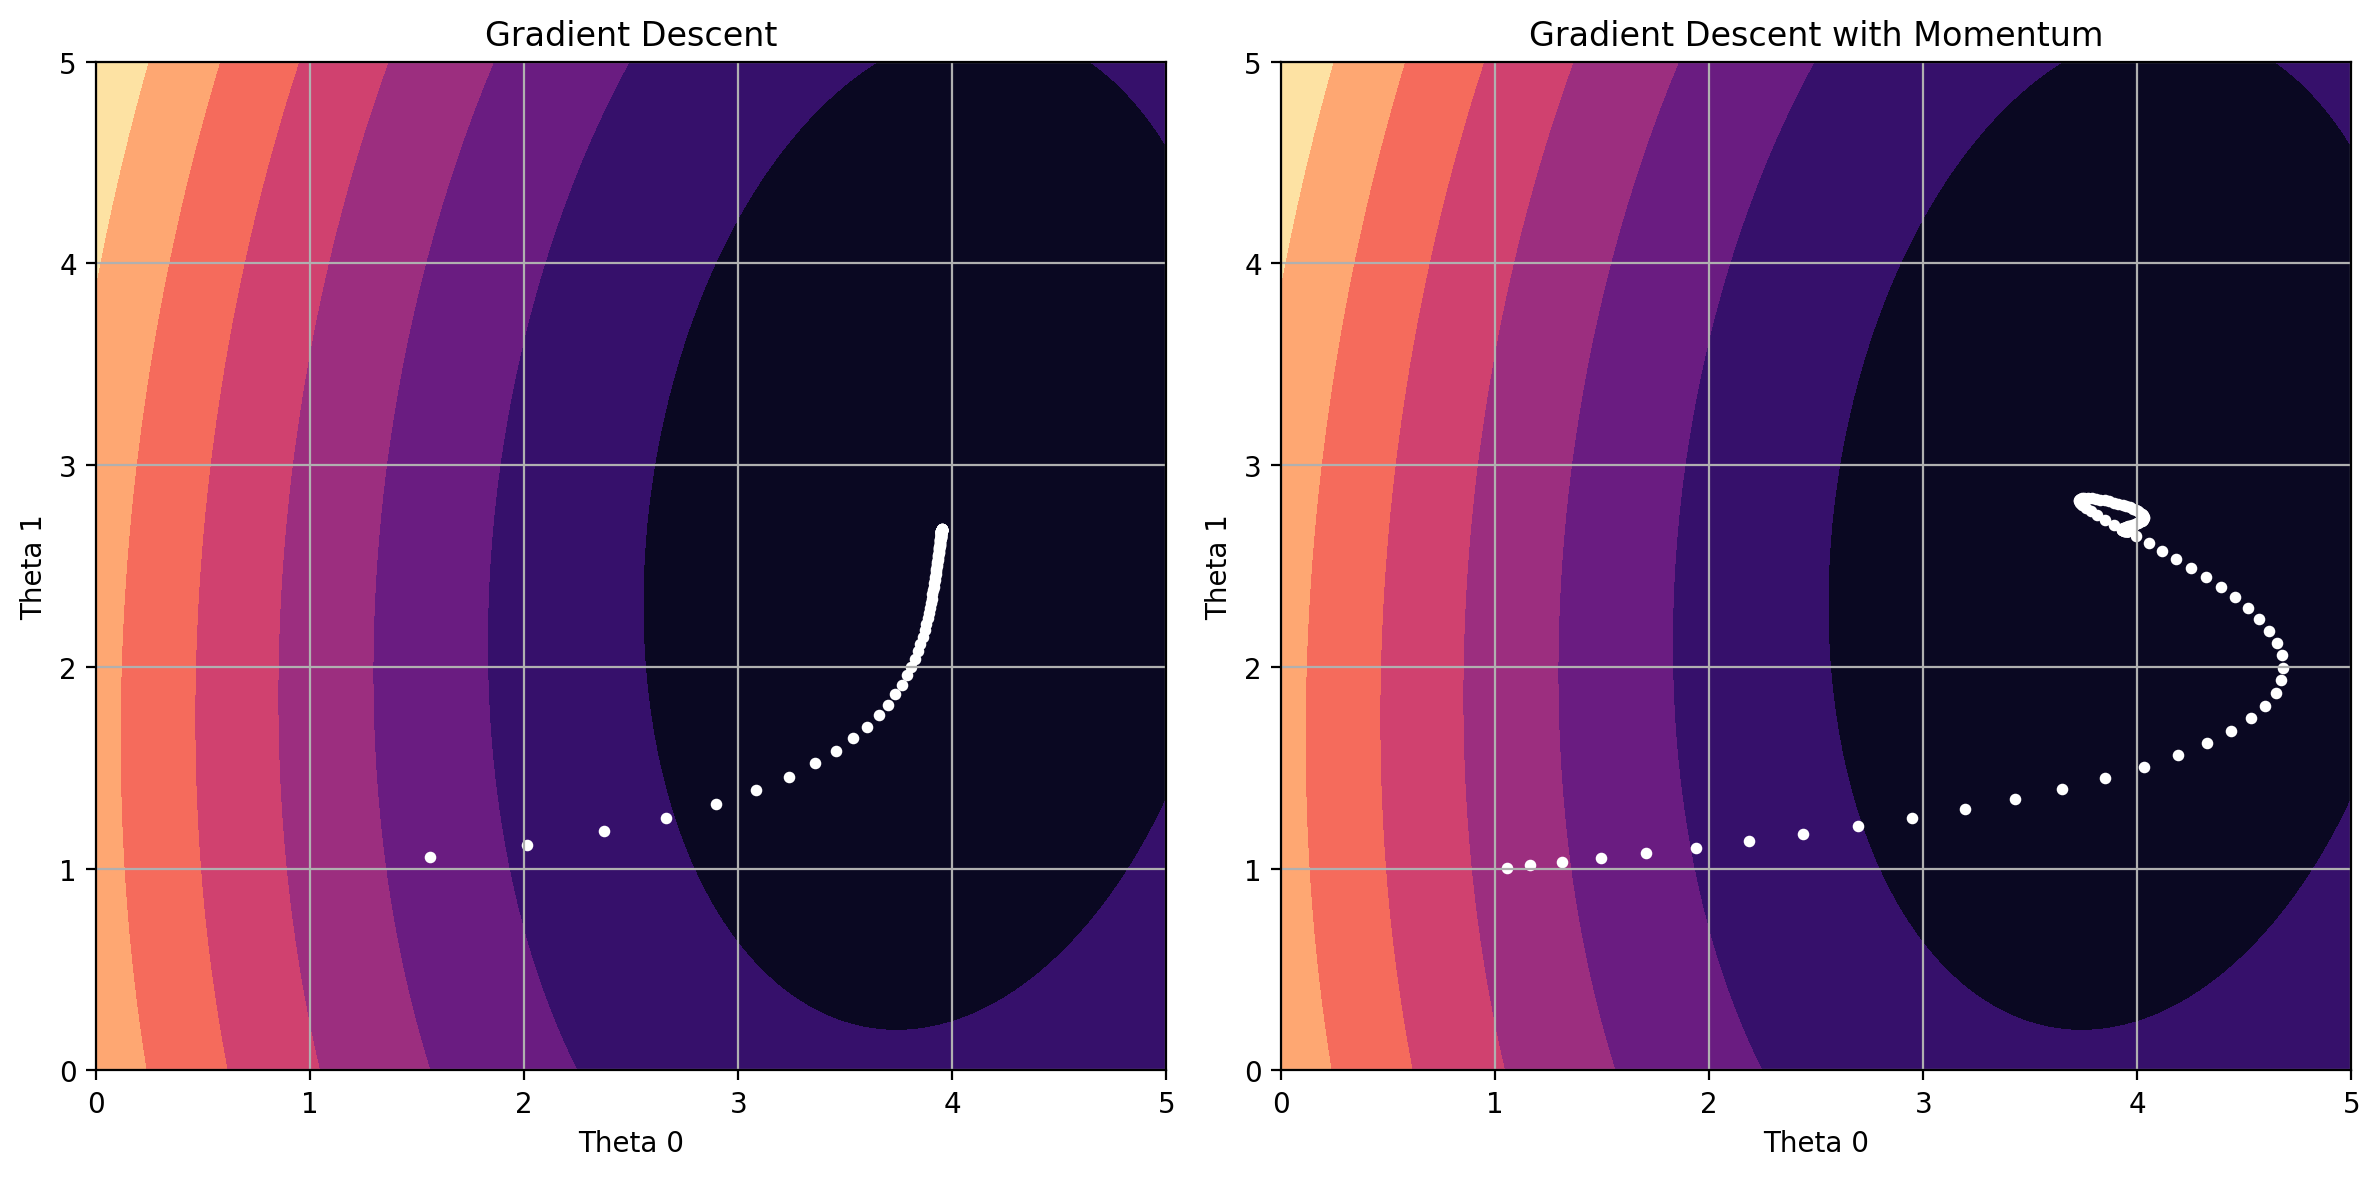

In [344]:
fig, axs = plt.subplots(1,2, figsize=(12, 6))

contour1 = axs[0].contourf(a, b, grid_loss.T, cmap='magma')
axs[0].scatter(theta0_history_full, theta1_history_full, color='white', s=10)

axs[0].set_title('Gradient Descent')
axs[0].set_xlabel('Theta 0')
axs[0].set_ylabel('Theta 1')
axs[0].grid(True)

contour2 = axs[1].contourf(a, b, grid_loss.T, cmap='magma')
axs[1].scatter(theta0_history_full_mom, theta1_history_full_mom, color='white', s=10)

axs[1].set_title('Gradient Descent with Momentum')
axs[1].set_xlabel('Theta 0')
axs[1].set_ylabel('Theta 1')
axs[1].grid(True)

plt.tight_layout()
plt.show()

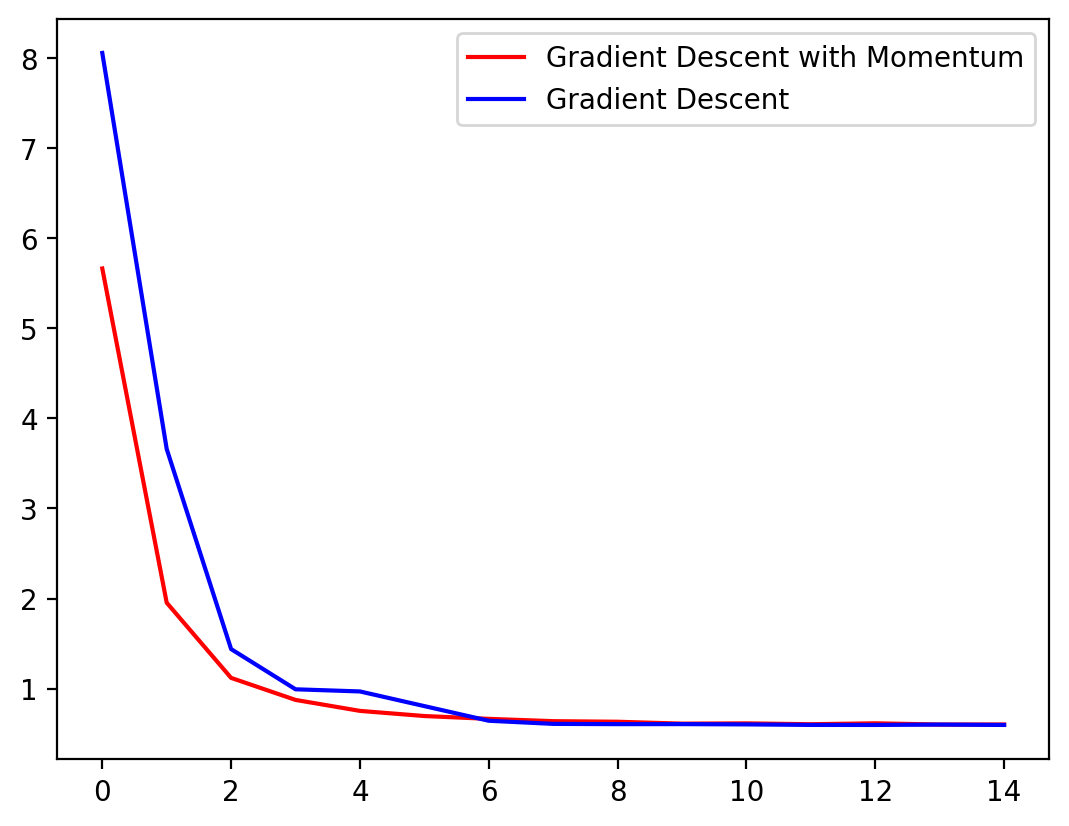

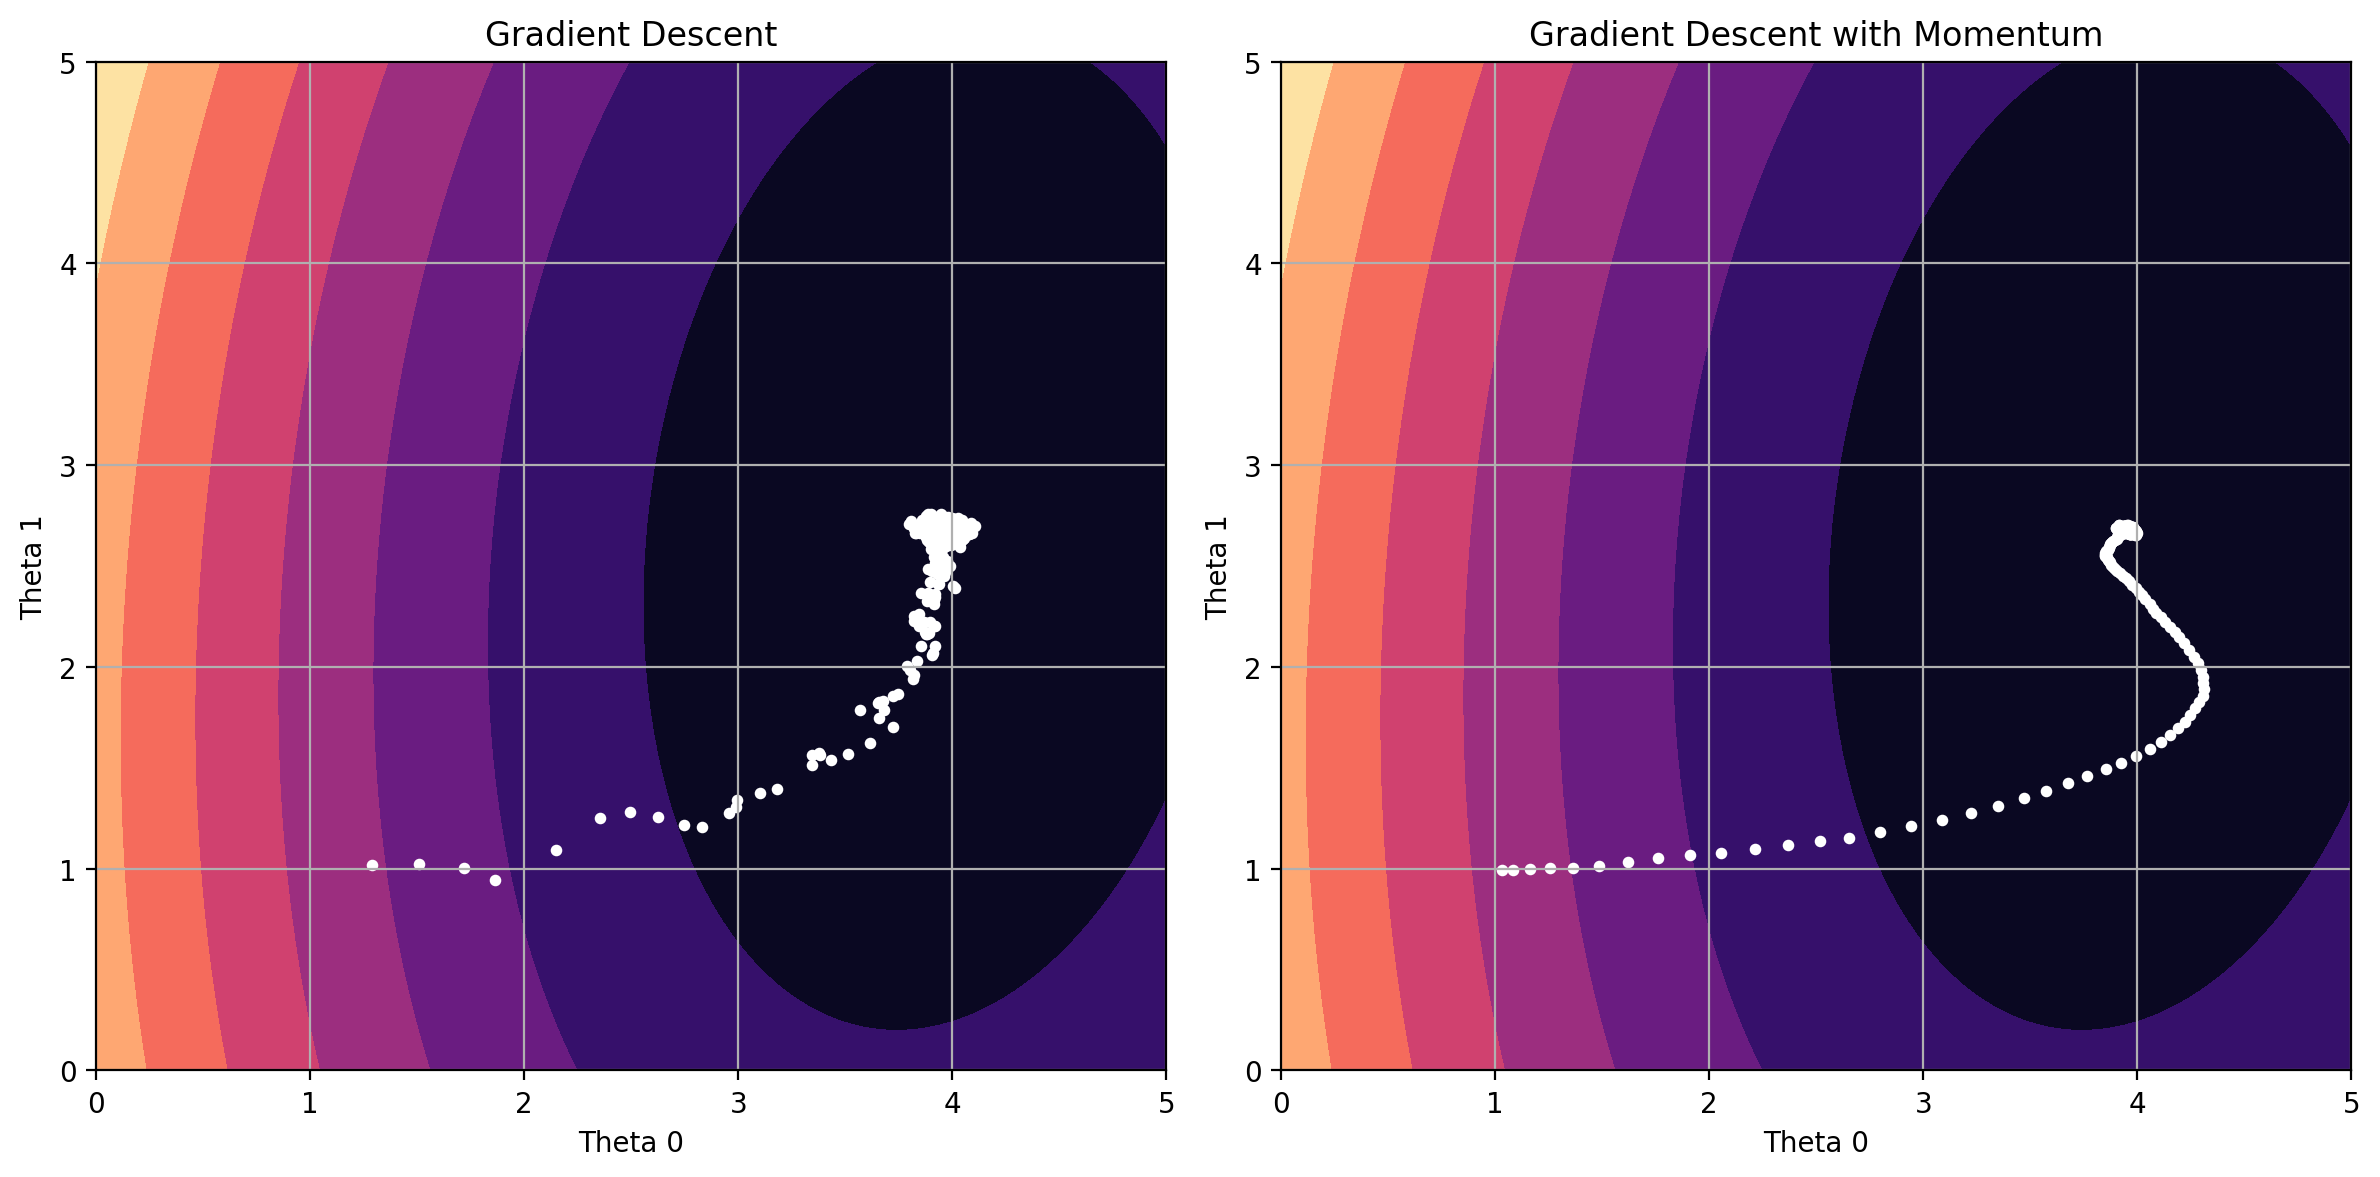

In [345]:
plt.plot(loss_epoch_mini[:15], color='r', label="Gradient Descent with Momentum")
plt.plot(loss_epoch_mini_mom[:15], color='b', label="Gradient Descent")
plt.legend()
plt.show()

fig, axs = plt.subplots(1,2, figsize=(12, 6))

contour1 = axs[0].contourf(a, b, grid_loss.T, cmap='magma')
axs[0].scatter(theta_0_history_mini, theta_1_history_mini, color='white', s=10)

axs[0].set_title('Gradient Descent')
axs[0].set_xlabel('Theta 0')
axs[0].set_ylabel('Theta 1')
axs[0].grid(True)

contour2 = axs[1].contourf(a, b, grid_loss.T, cmap='magma')
axs[1].scatter(theta_0_history_mini_mom, theta_1_history_mini_mom, color='white', s=10)

axs[1].set_title('Gradient Descent with Momentum')
axs[1].set_xlabel('Theta 0')
axs[1].set_ylabel('Theta 1')
axs[1].grid(True)

plt.tight_layout()
plt.show()

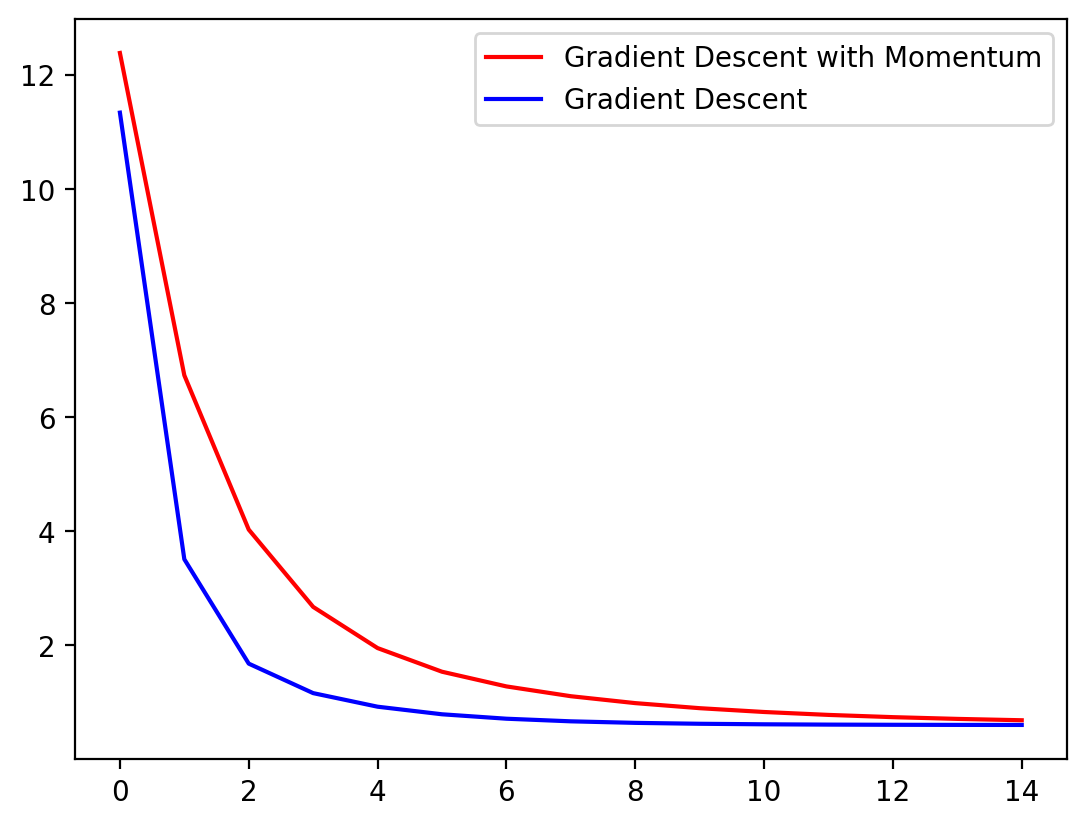

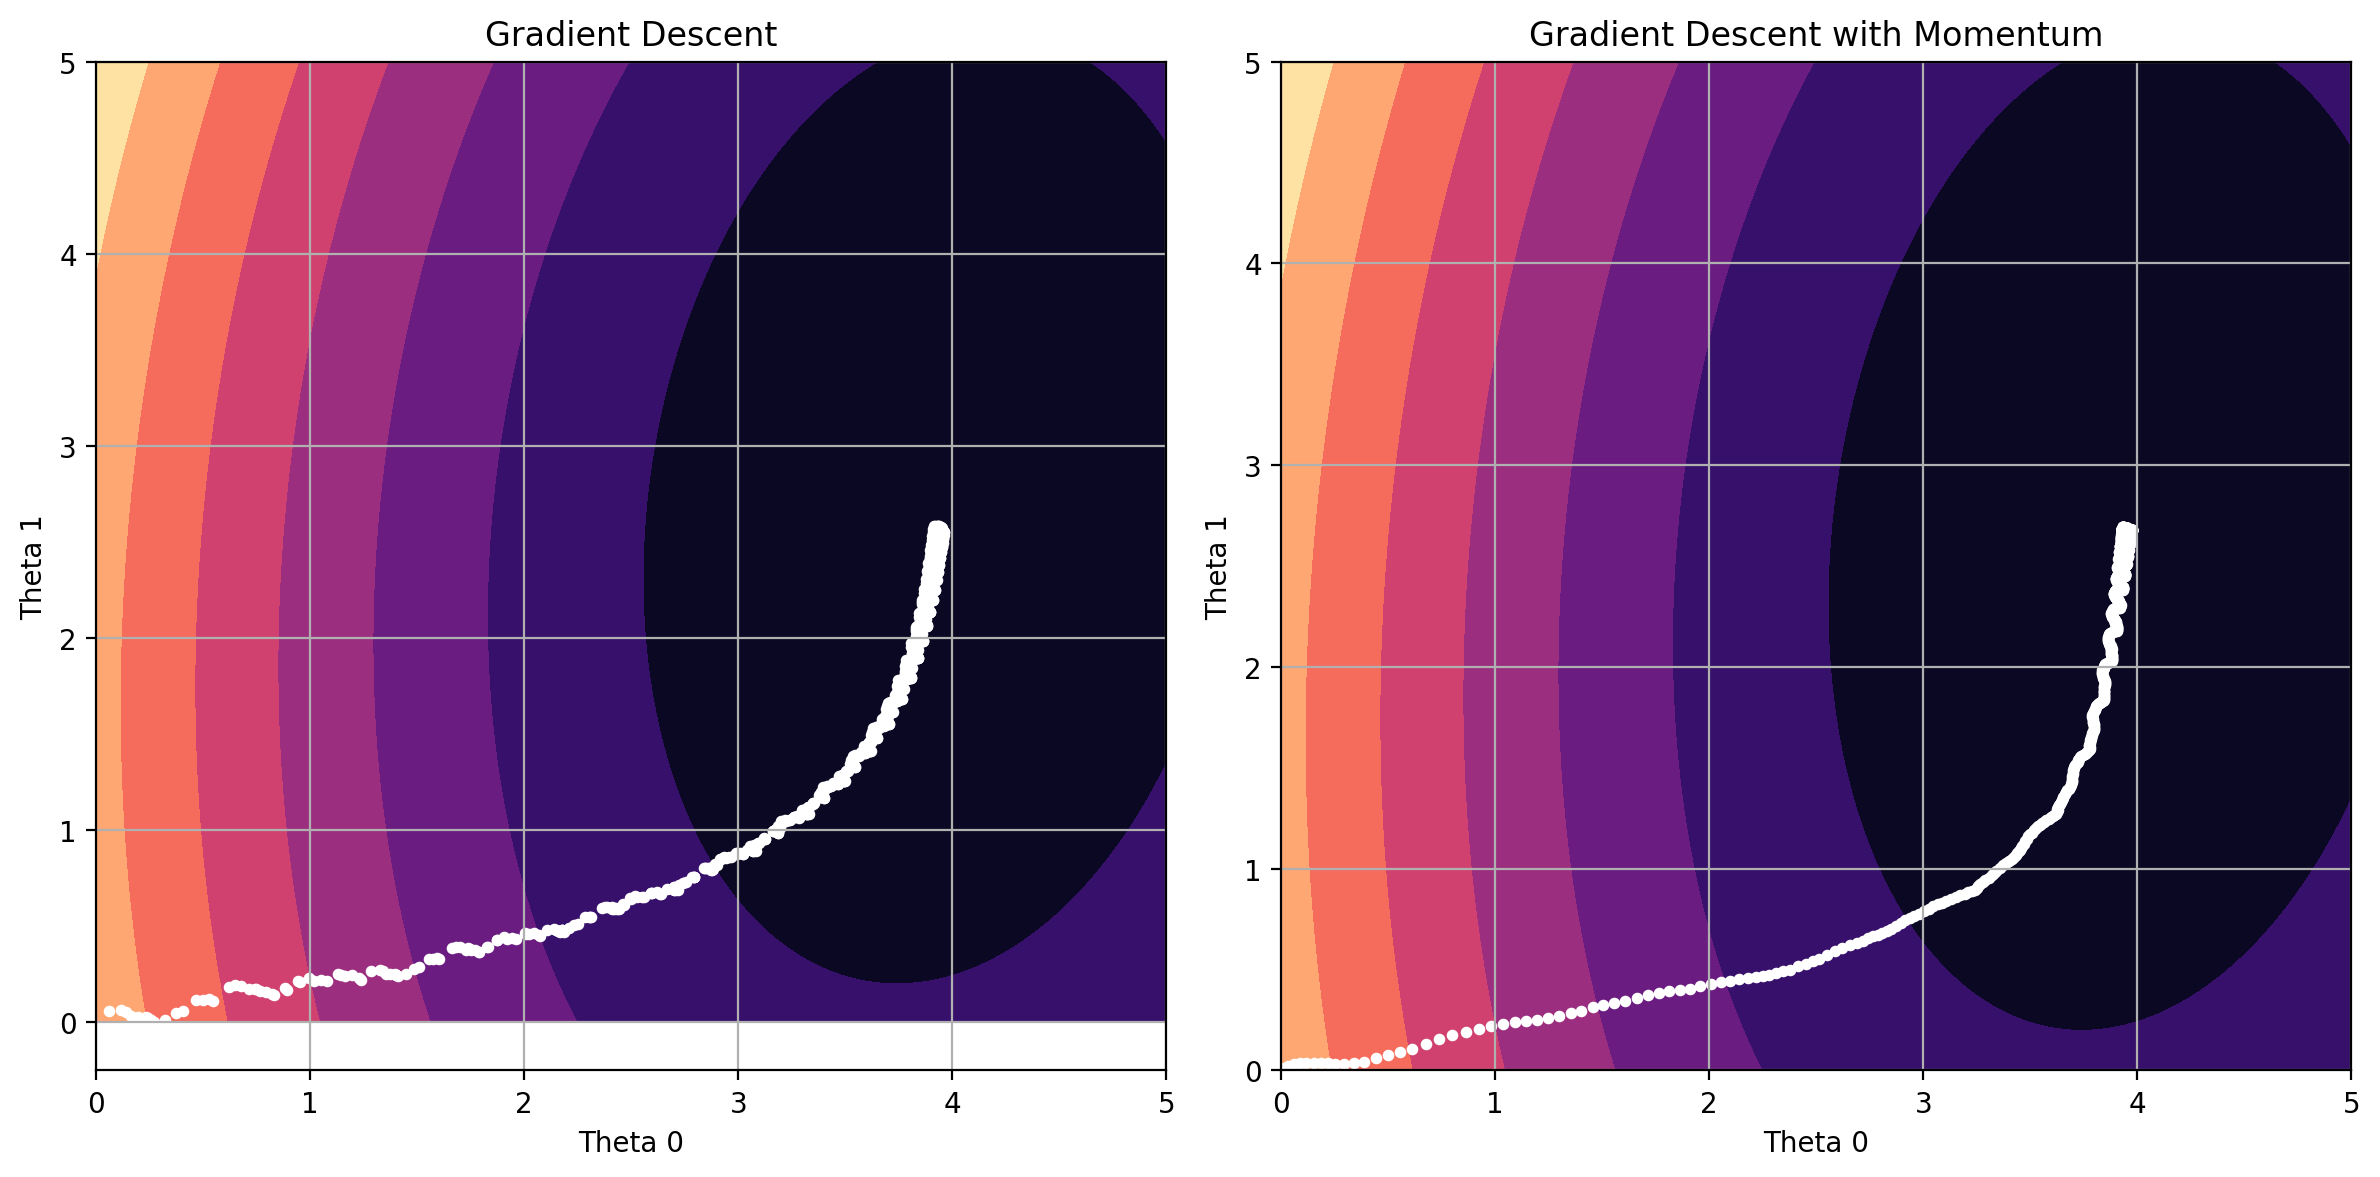

In [321]:
plt.plot(loss_epoch_sgd[:15], color='r', label="Gradient Descent with Momentum")
plt.plot(loss_epoch_sgd_mom[:15], color='b', label="Gradient Descent")
plt.legend()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

contour1 = axs[0].contourf(a, b, grid_loss.T, cmap='magma')
axs[0].scatter(theta_0_history_sgd, theta_1_history_sgd, color='white', s=10)

axs[0].set_title('Gradient Descent')
axs[0].set_xlabel('Theta 0')
axs[0].set_ylabel('Theta 1')
axs[0].grid(True)

contour2 = axs[1].contourf(a, b, grid_loss.T, cmap='magma')
axs[1].scatter(theta_0_history_sgd_mom, theta_1_history_sgd_mom, color='white', s=10)

axs[1].set_title('Gradient Descent with Momentum')
axs[1].set_xlabel('Theta 0')
axs[1].set_ylabel('Theta 1')
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [346]:
#for full-batch
for epoch in range(0,120,4):

    create_contour_plot(epoch, a, b,
                         grid_loss, theta0_history_full_mom[epoch],
                         theta1_history_full_mom[epoch],
                         theta0_history_full_mom[:epoch],
                         theta1_history_full_mom[:epoch],'full_mom')
    
#for sgd
for epoch in range(0,epochs_stochastic_i_mom*40,50):

    create_contour_plot(epoch, a, b,
                         grid_loss, theta_0_history_sgd_mom[epoch],
                         theta_1_history_sgd_mom[epoch],
                         theta_0_history_sgd_mom[:epoch],
                         theta_1_history_sgd_mom[:epoch],'sgd_mom')


#for mini
for epoch in range(0,epochs_mini_i_mom*8,10):

    create_contour_plot(epoch, a, b,
                         grid_loss, theta_0_history_mini_mom[epoch],
                         theta_1_history_mini_mom[epoch],
                         theta_0_history_mini_mom[:epoch],
                         theta_1_history_mini_mom[:epoch],
                         'mini_mom')
    

def create_gif(epochs,steps,mode):
    images = []
    for epoch in range(0, epochs, steps):
        filename = f' Aepoch_{epoch}_{mode}.png'
        images.append(imageio.v2.imread(filename))
    imageio.mimsave(f'contour_plot_{mode}.gif', images, duration=0.5)

create_gif(epochs_stochastic_i_mom*40,50,'sgd_mom')
create_gif(120,4,'full_mom')
create_gif(epochs_mini_i_mom*8,10,'mini_mom')

the value of theta0 for epoch 0 and full_mom :  1.0561643838882446
the value of theta1 for epoch 0 and full_mom :  1.0056300163269043
the value of theta0 for epoch 24 and full_mom :  4.651576995849609
the value of theta1 for epoch 24 and full_mom :  2.1190176010131836
the value of theta0 for epoch 48 and full_mom :  3.7529213428497314
the value of theta1 for epoch 48 and full_mom :  2.836810827255249
the value of theta0 for epoch 72 and full_mom :  4.015420913696289
the value of theta1 for epoch 72 and full_mom :  2.721337080001831
the value of theta0 for epoch 96 and full_mom :  3.9337451457977295
the value of theta1 for epoch 96 and full_mom :  2.6772496700286865
the value of theta0 for epoch 0 and sgd_mom :  1.0080500841140747
the value of theta1 for epoch 0 and sgd_mom :  1.0078731775283813
the value of theta0 for epoch 500 and sgd_mom :  3.94423770904541
the value of theta1 for epoch 500 and sgd_mom :  2.5954203605651855
the value of theta0 for epoch 1000 and sgd_mom :  3.94486284

C:\Users\Sky\AppData\Local\Temp\ipykernel_28820\585494507.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


the value of theta0 for epoch 7500 and sgd_mom :  3.953402519226074
the value of theta1 for epoch 7500 and sgd_mom :  2.673577308654785
the value of theta0 for epoch 8000 and sgd_mom :  3.945211887359619
the value of theta1 for epoch 8000 and sgd_mom :  2.6882646083831787
the value of theta0 for epoch 8500 and sgd_mom :  3.953402519226074
the value of theta1 for epoch 8500 and sgd_mom :  2.673577308654785
the value of theta0 for epoch 9000 and sgd_mom :  3.945211887359619
the value of theta1 for epoch 9000 and sgd_mom :  2.6882646083831787
the value of theta0 for epoch 9500 and sgd_mom :  3.953402519226074
the value of theta1 for epoch 9500 and sgd_mom :  2.673577308654785
the value of theta0 for epoch 10000 and sgd_mom :  3.945211887359619
the value of theta1 for epoch 10000 and sgd_mom :  2.6882646083831787
the value of theta0 for epoch 10500 and sgd_mom :  3.953402519226074
the value of theta1 for epoch 10500 and sgd_mom :  2.673577308654785
the value of theta0 for epoch 11000 and s

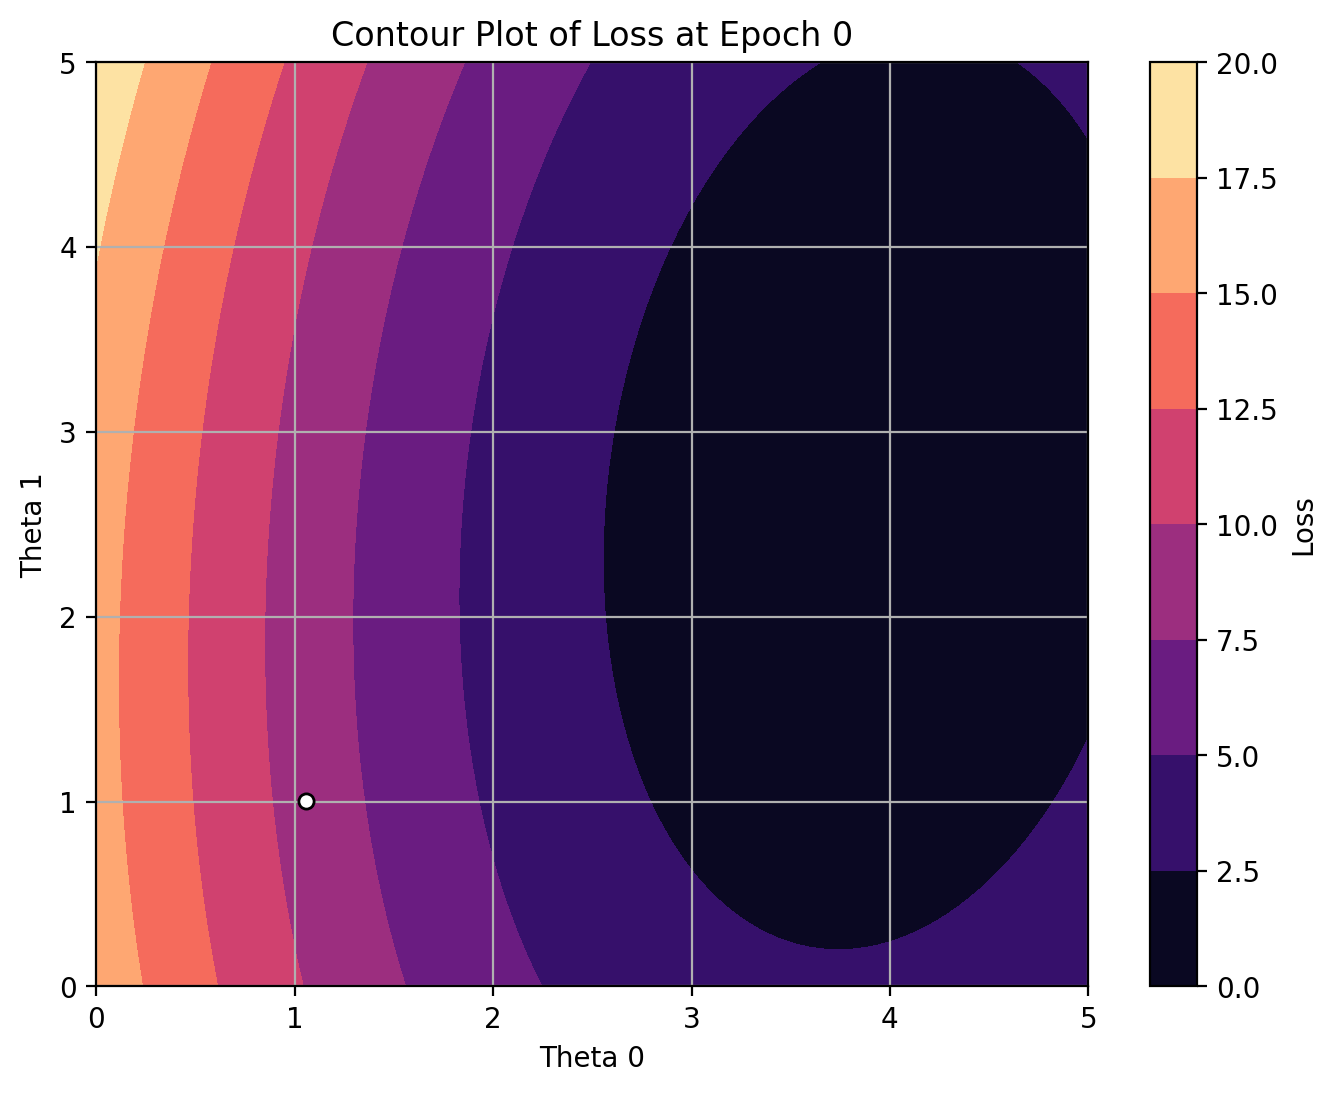

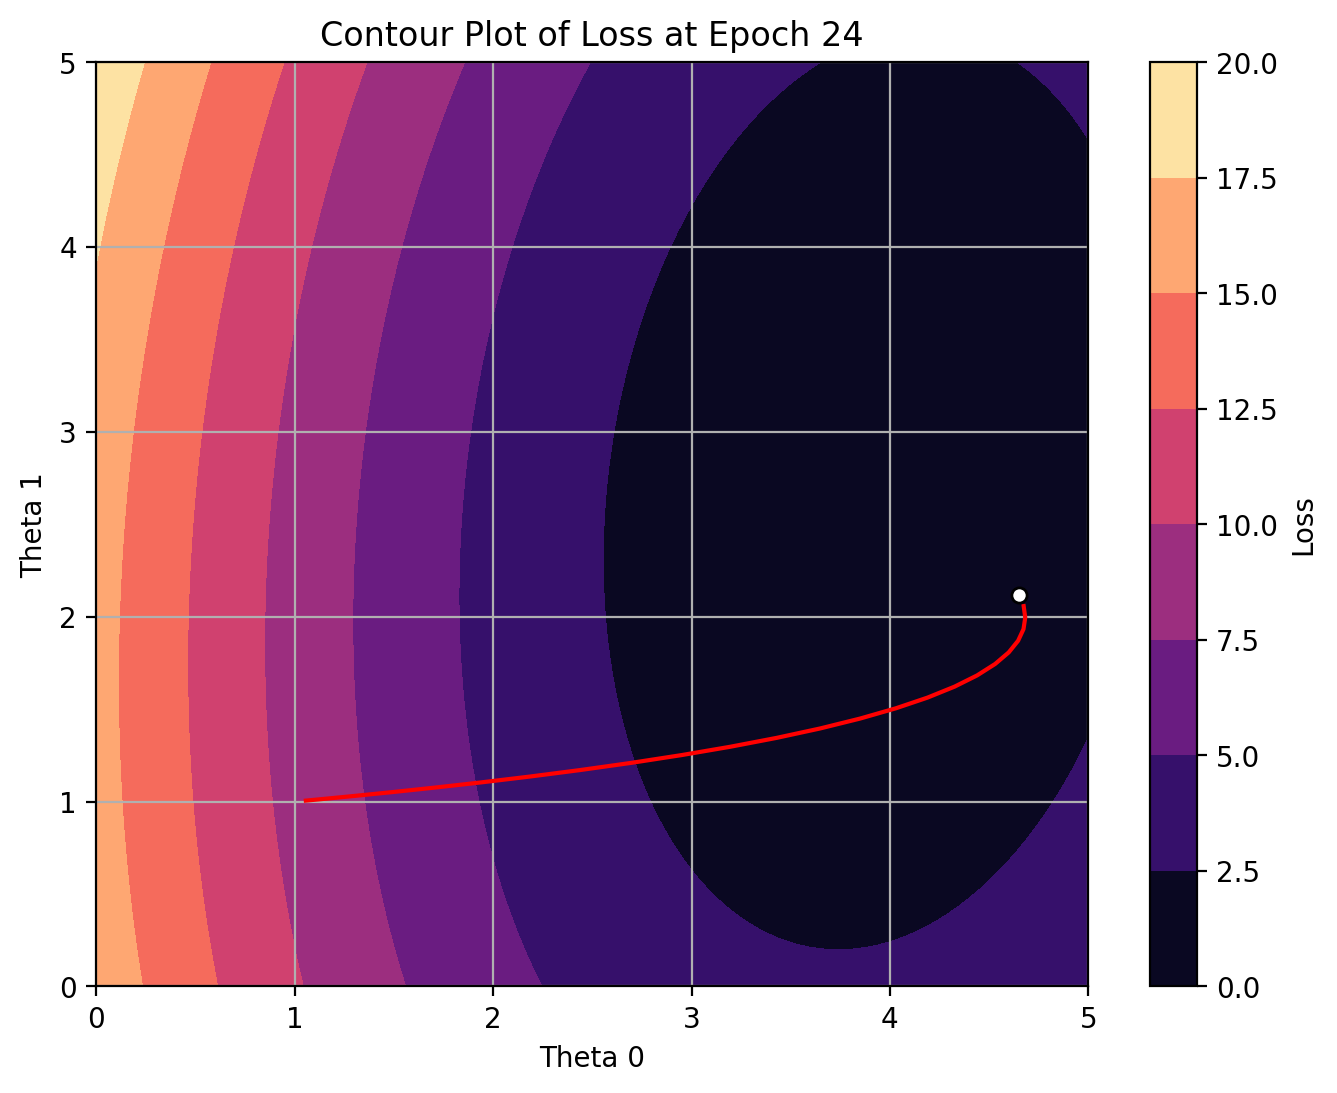

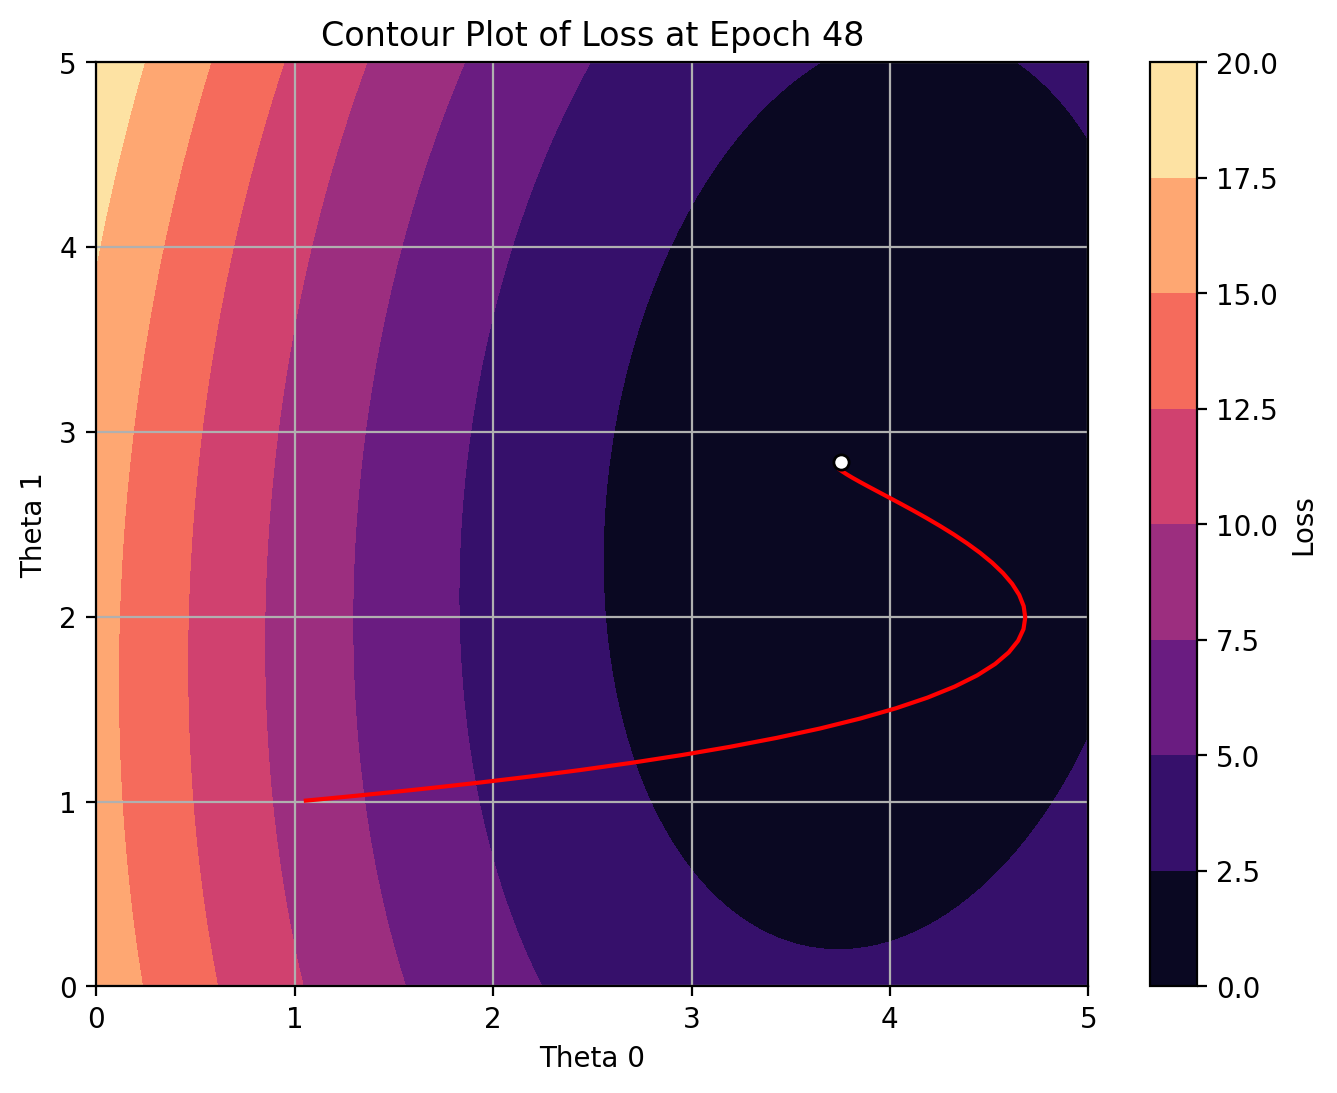

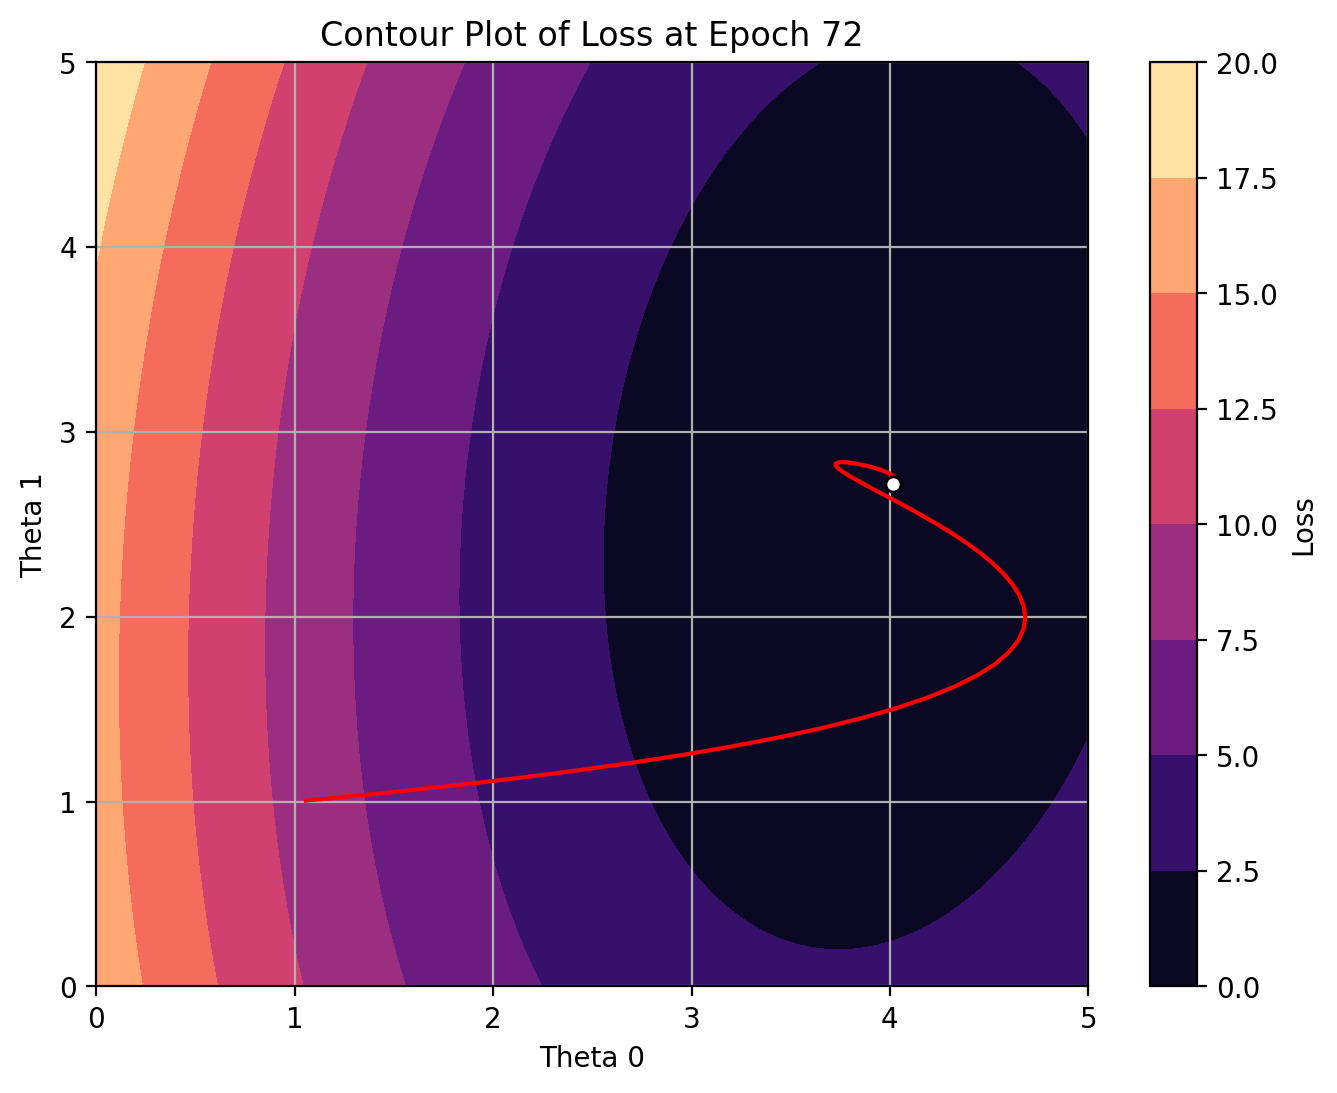

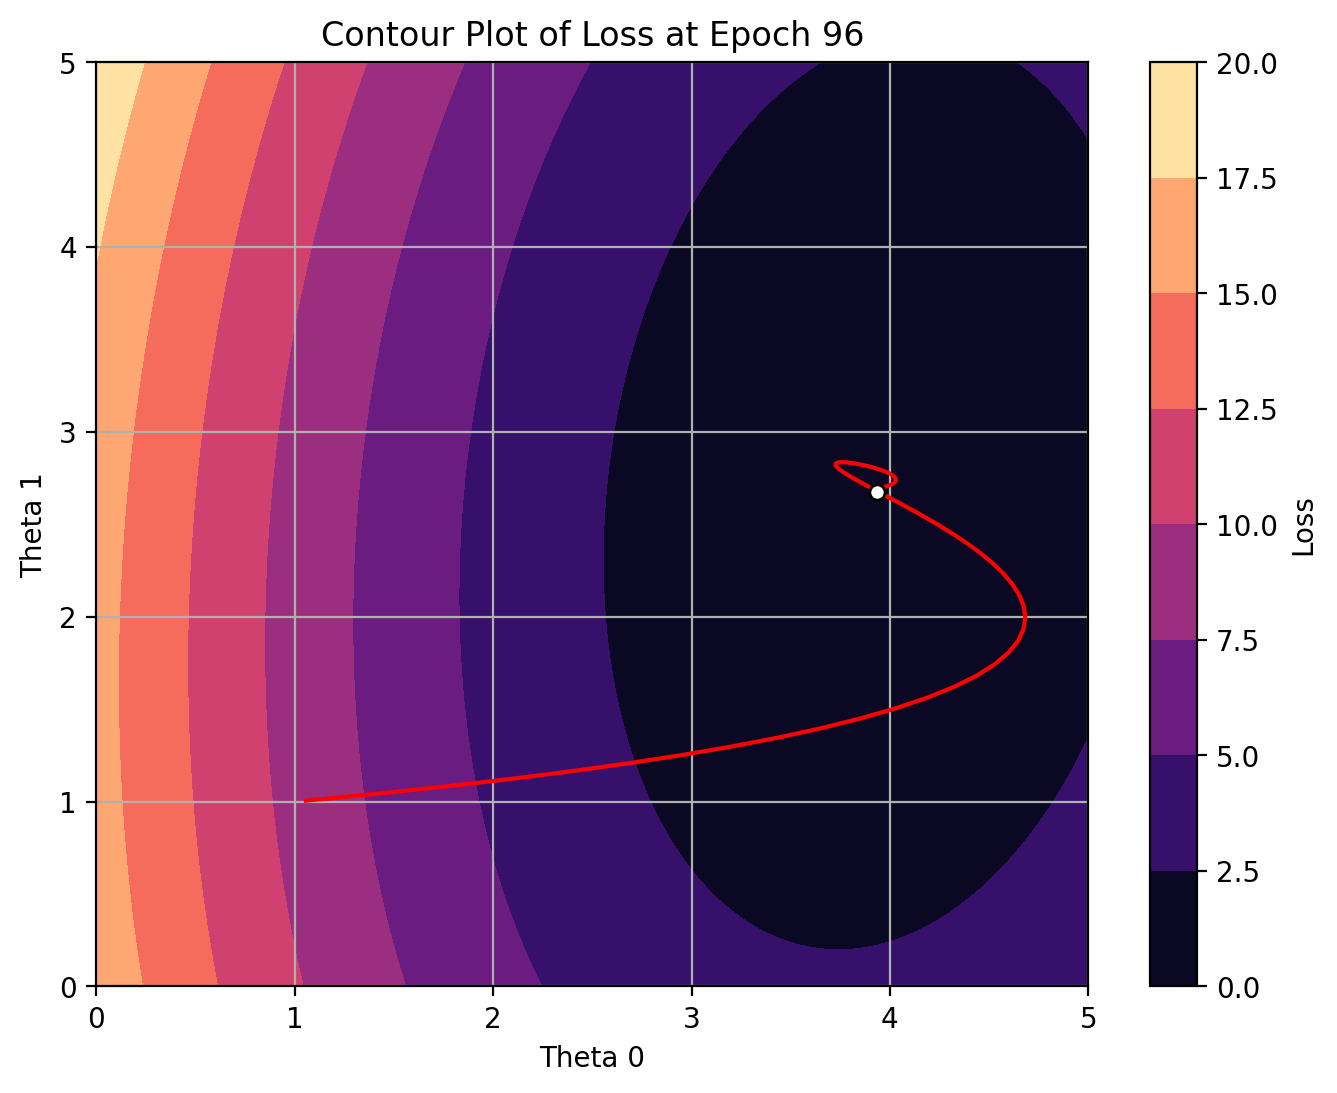

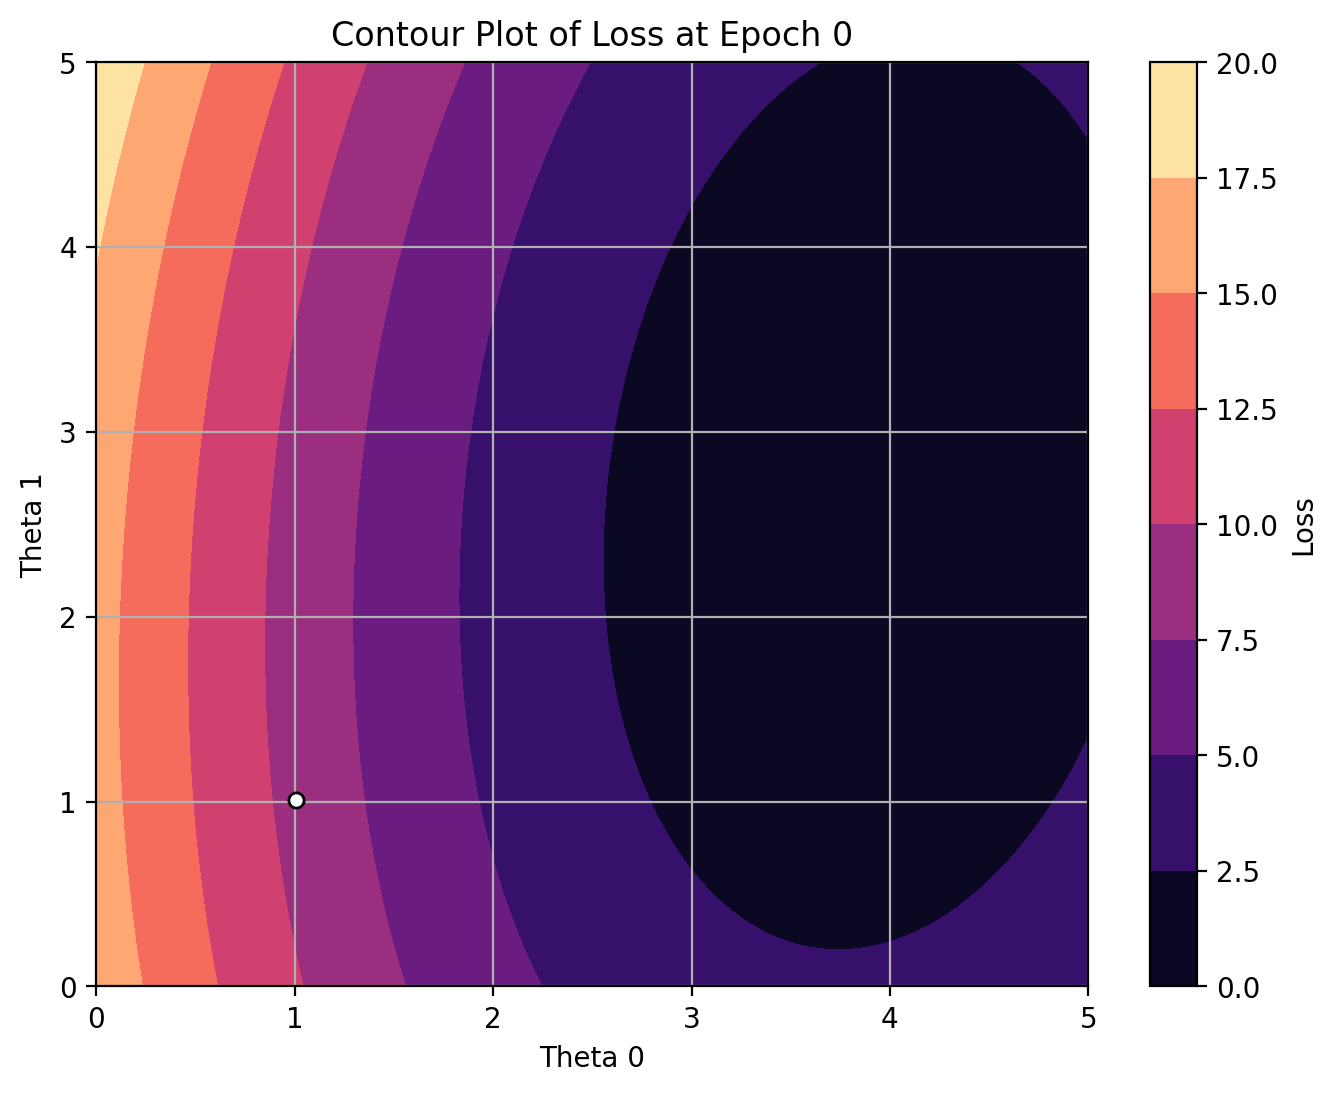

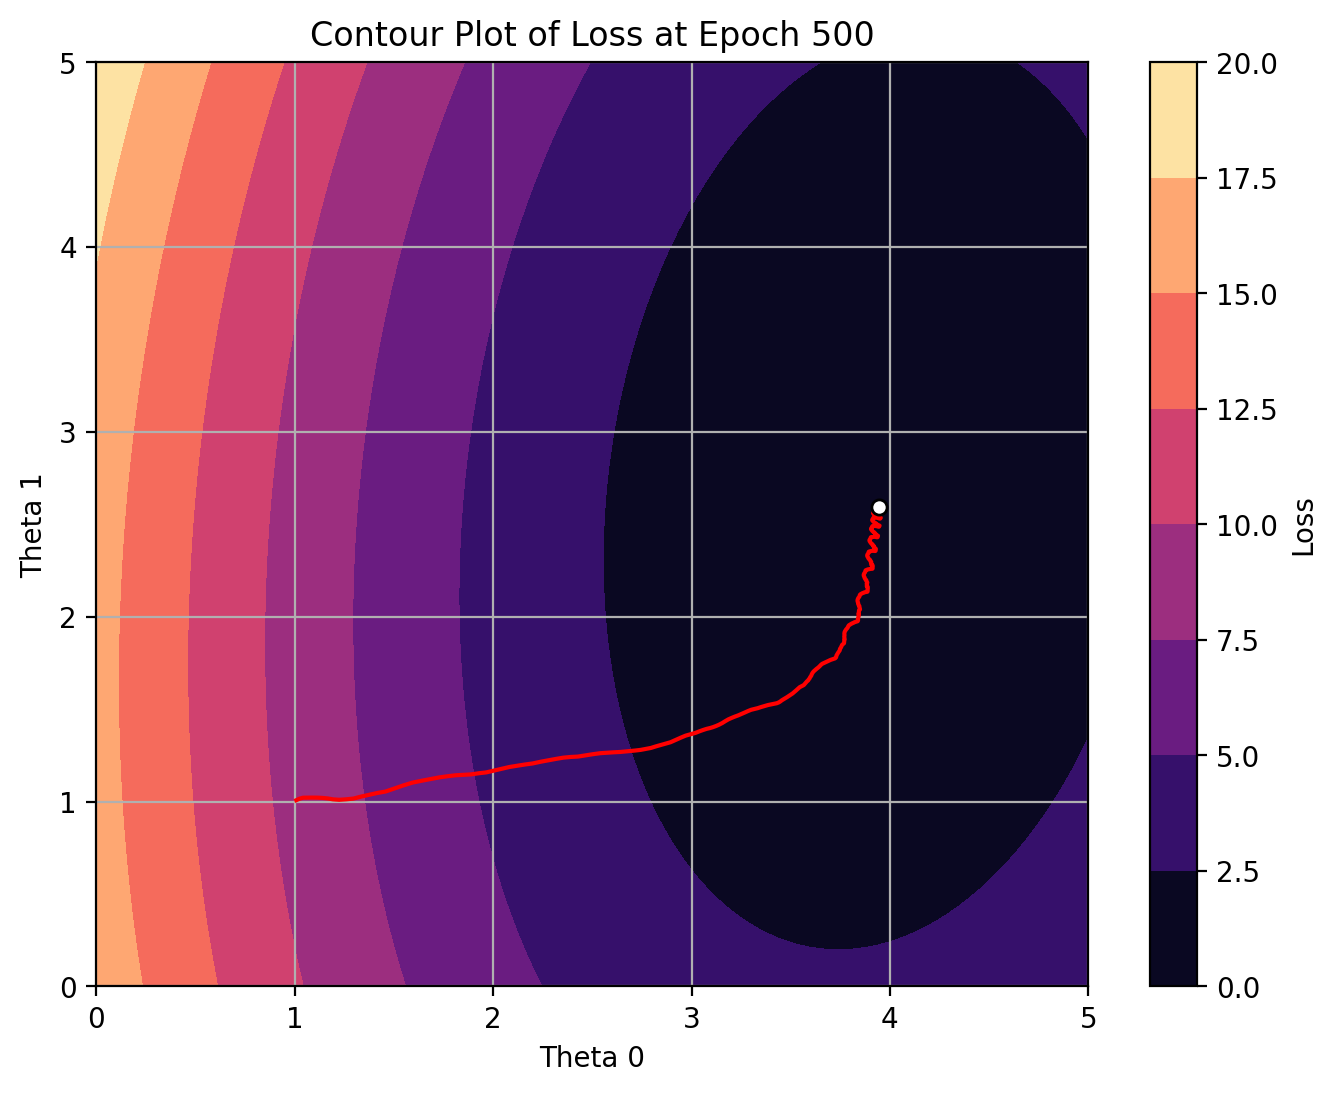

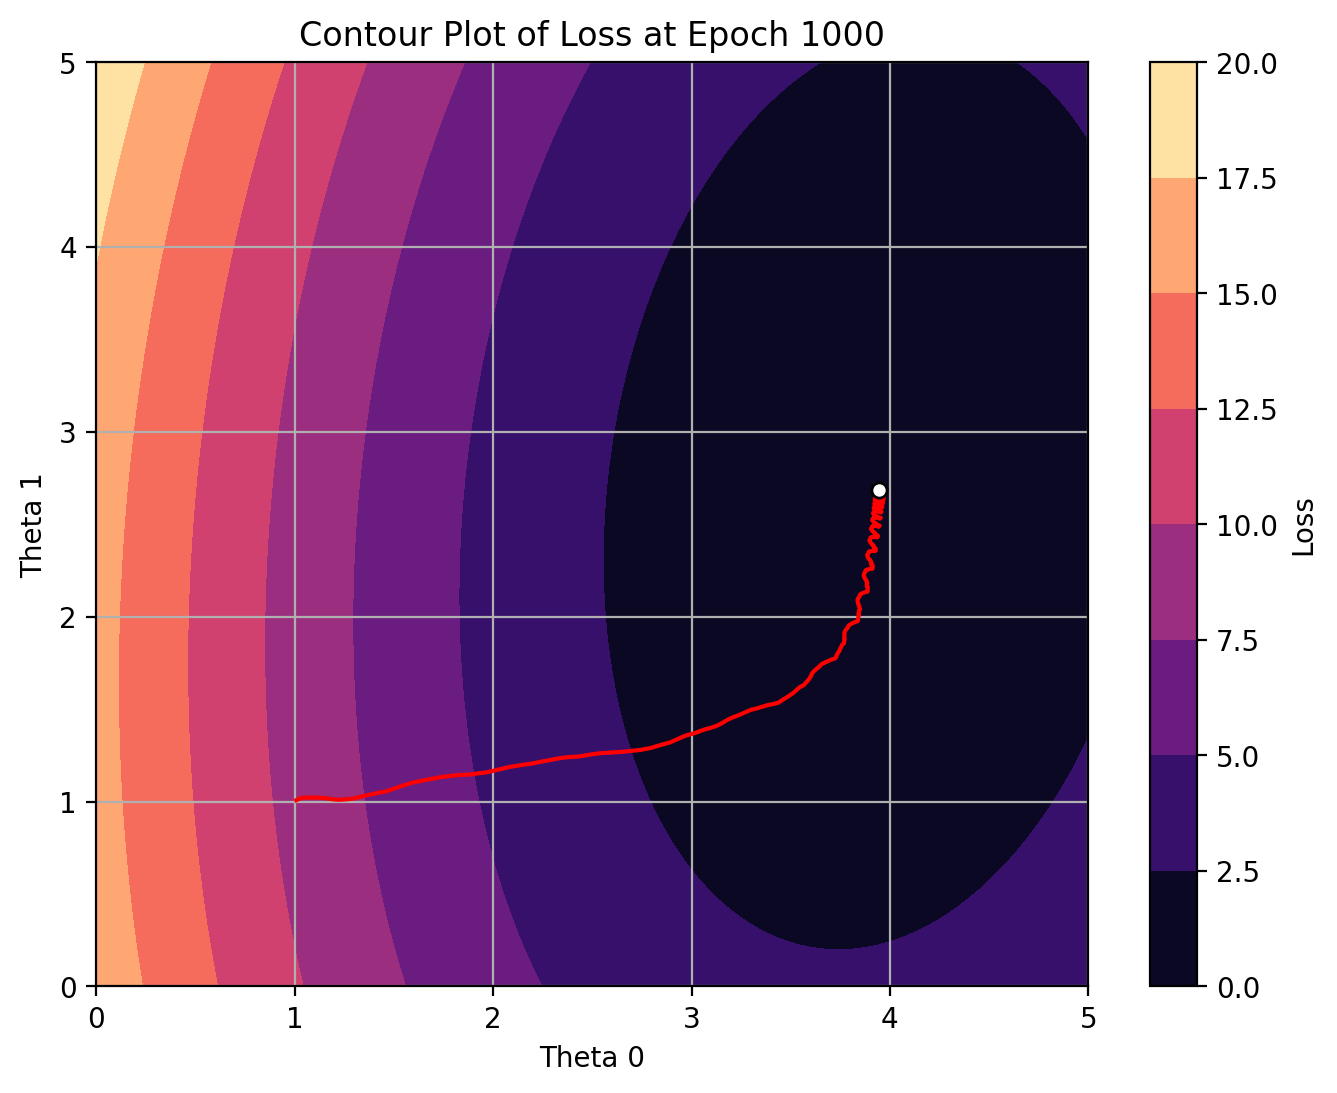

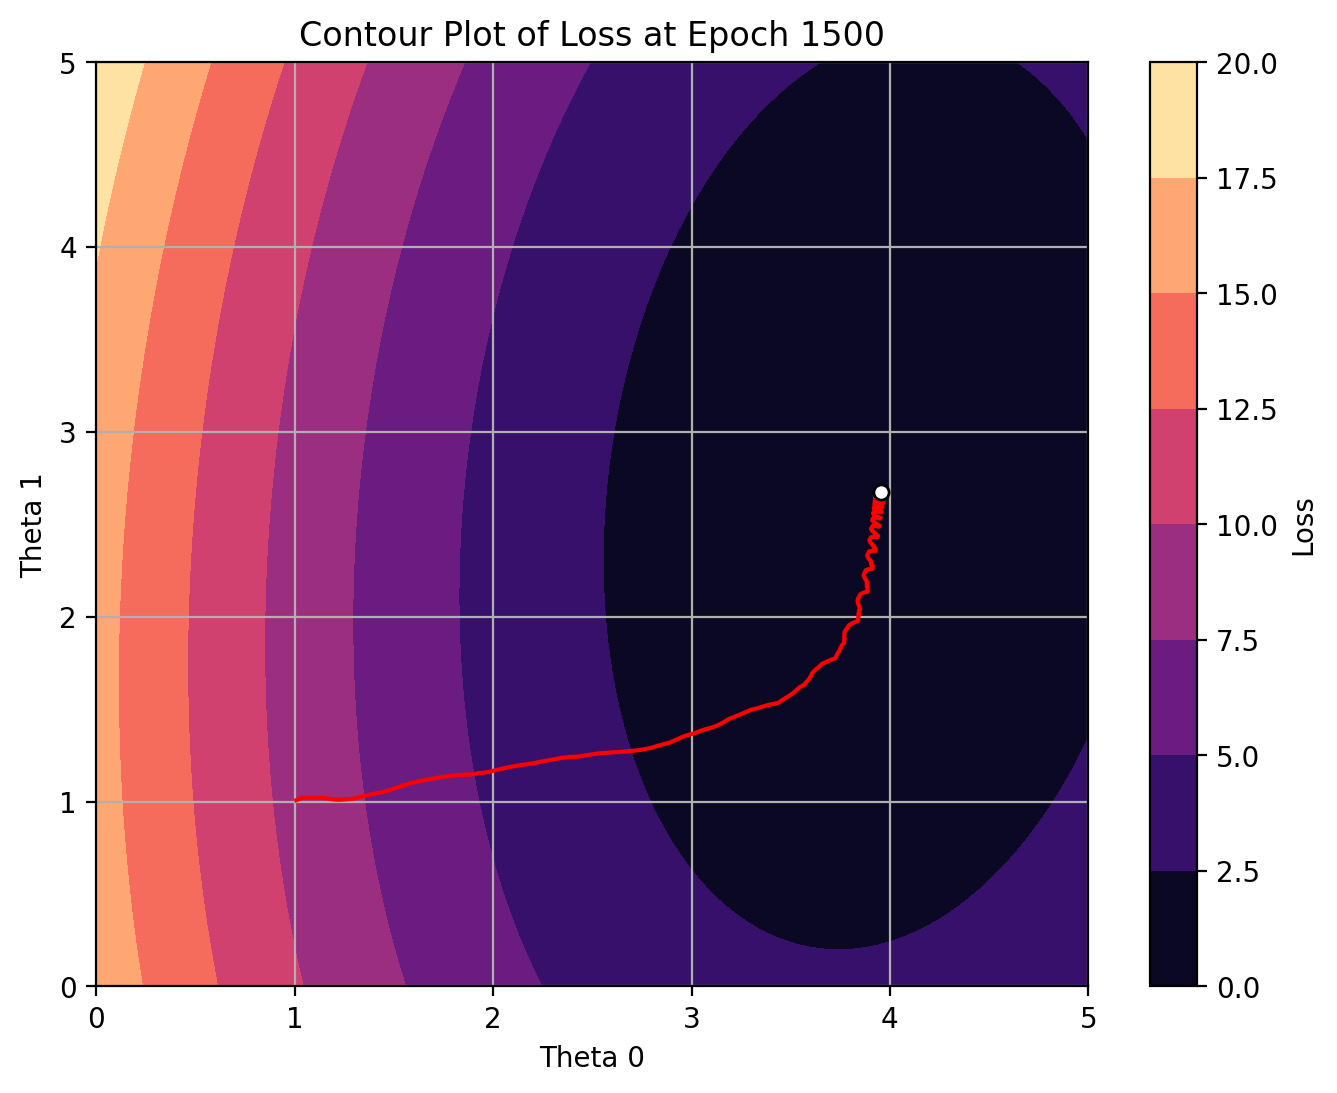

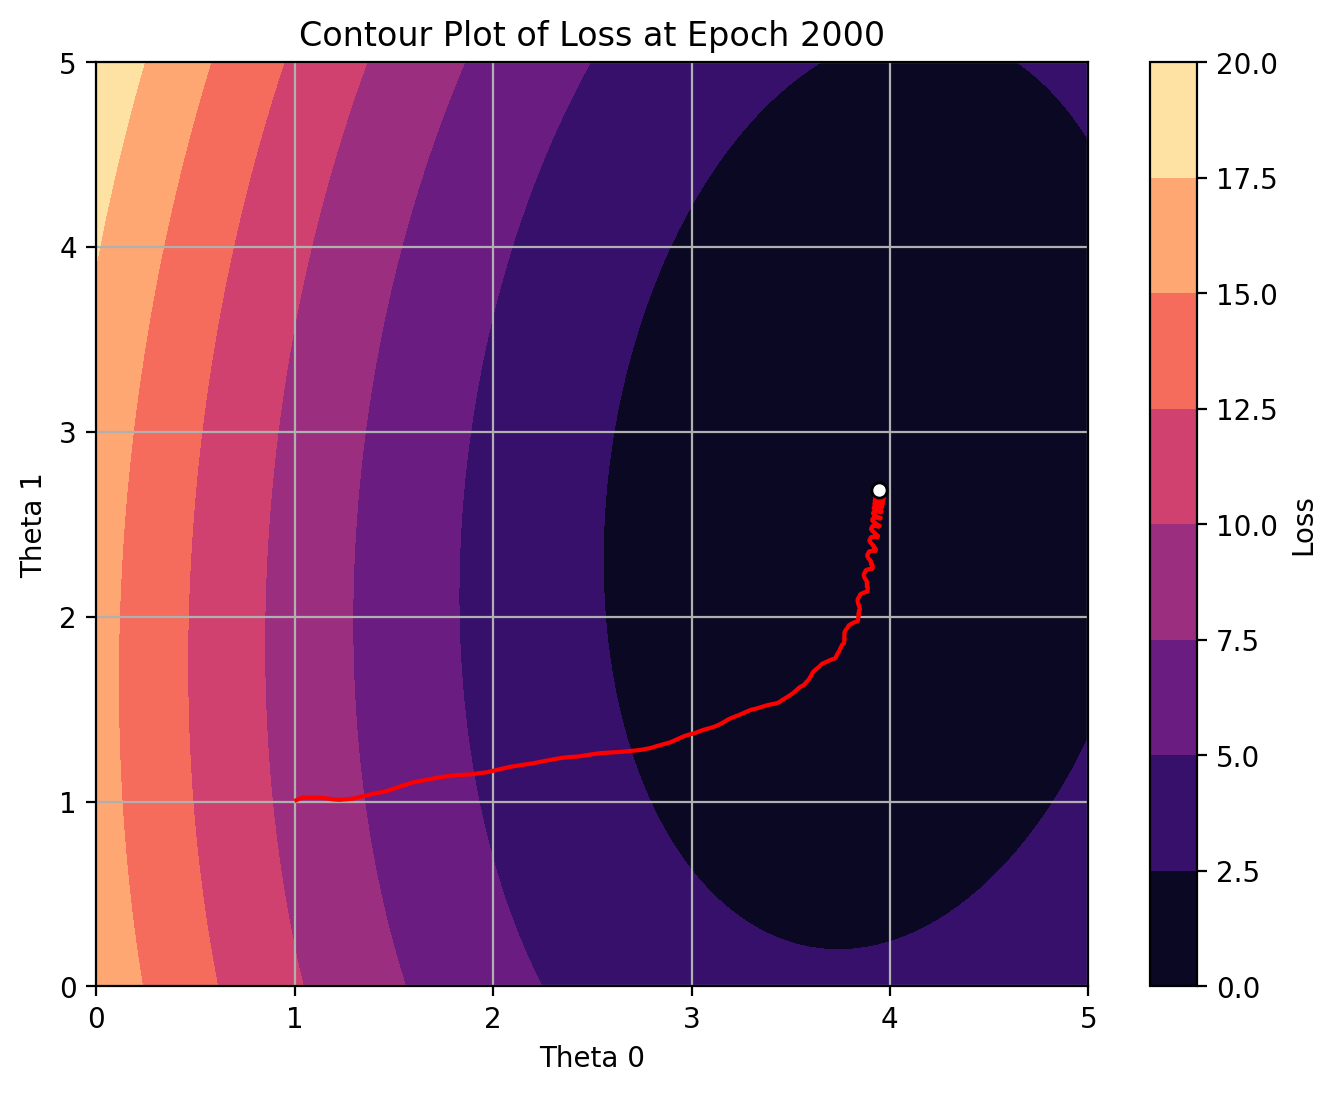

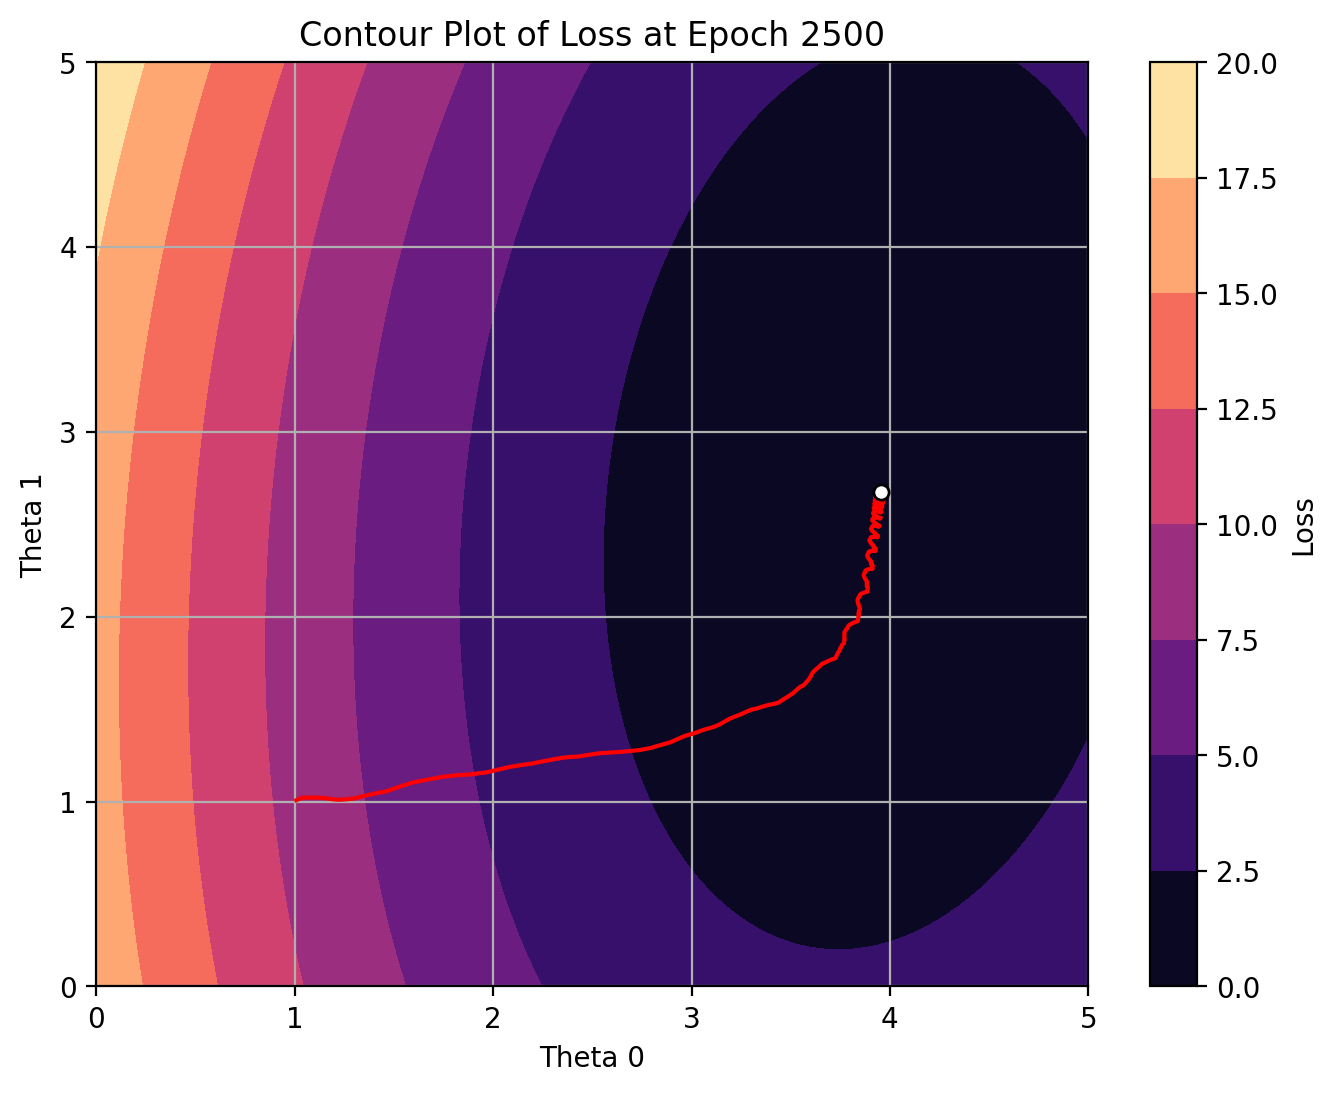

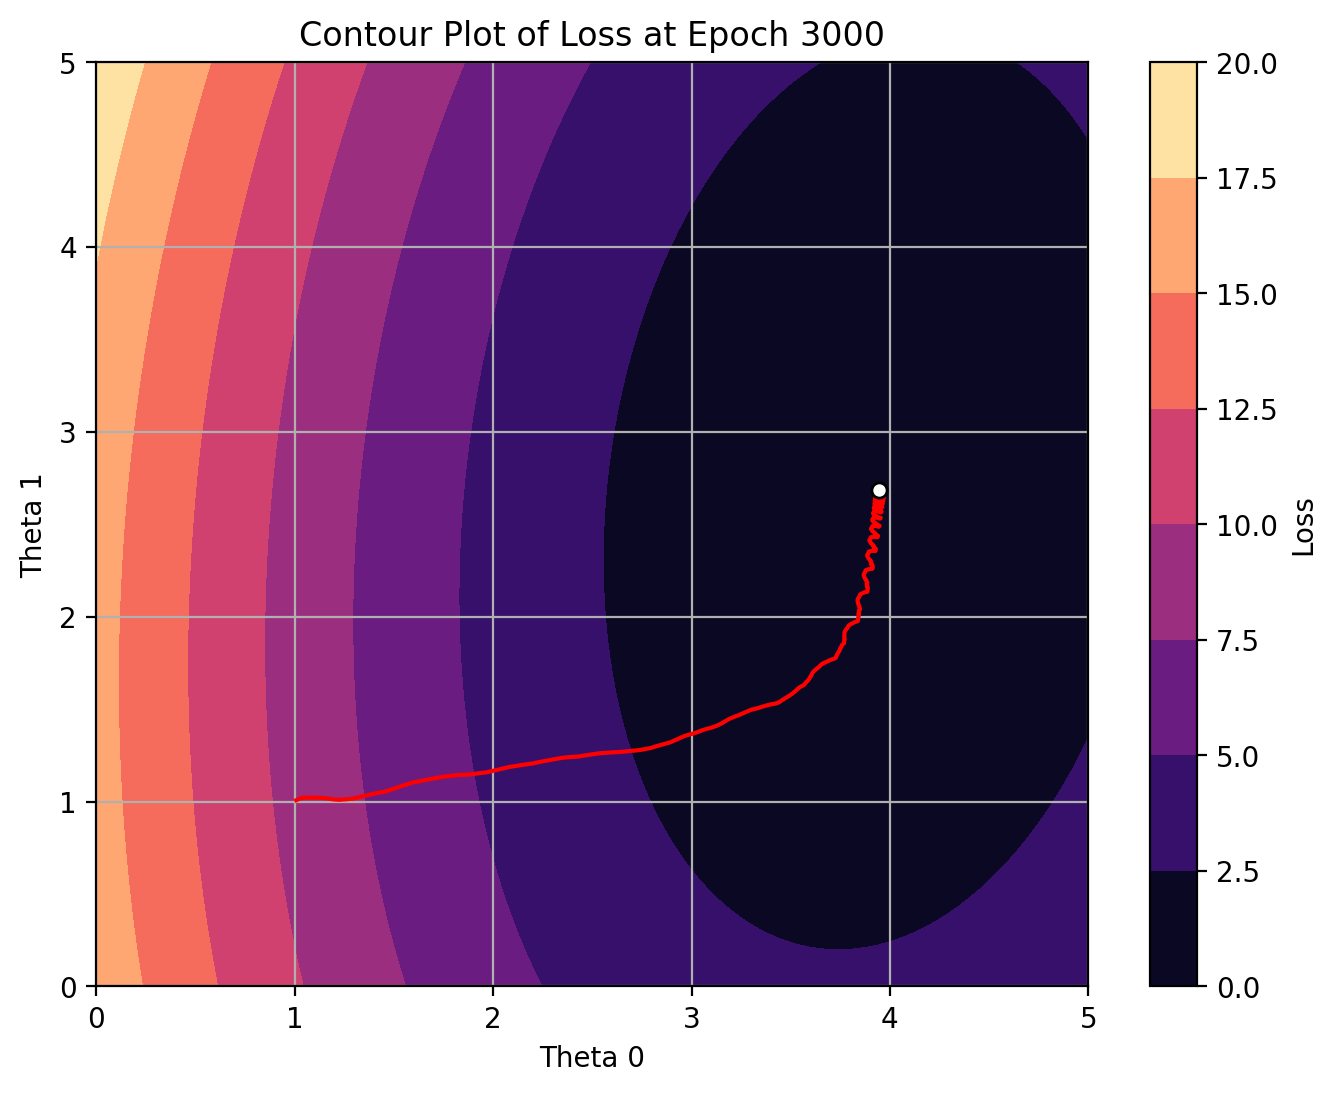

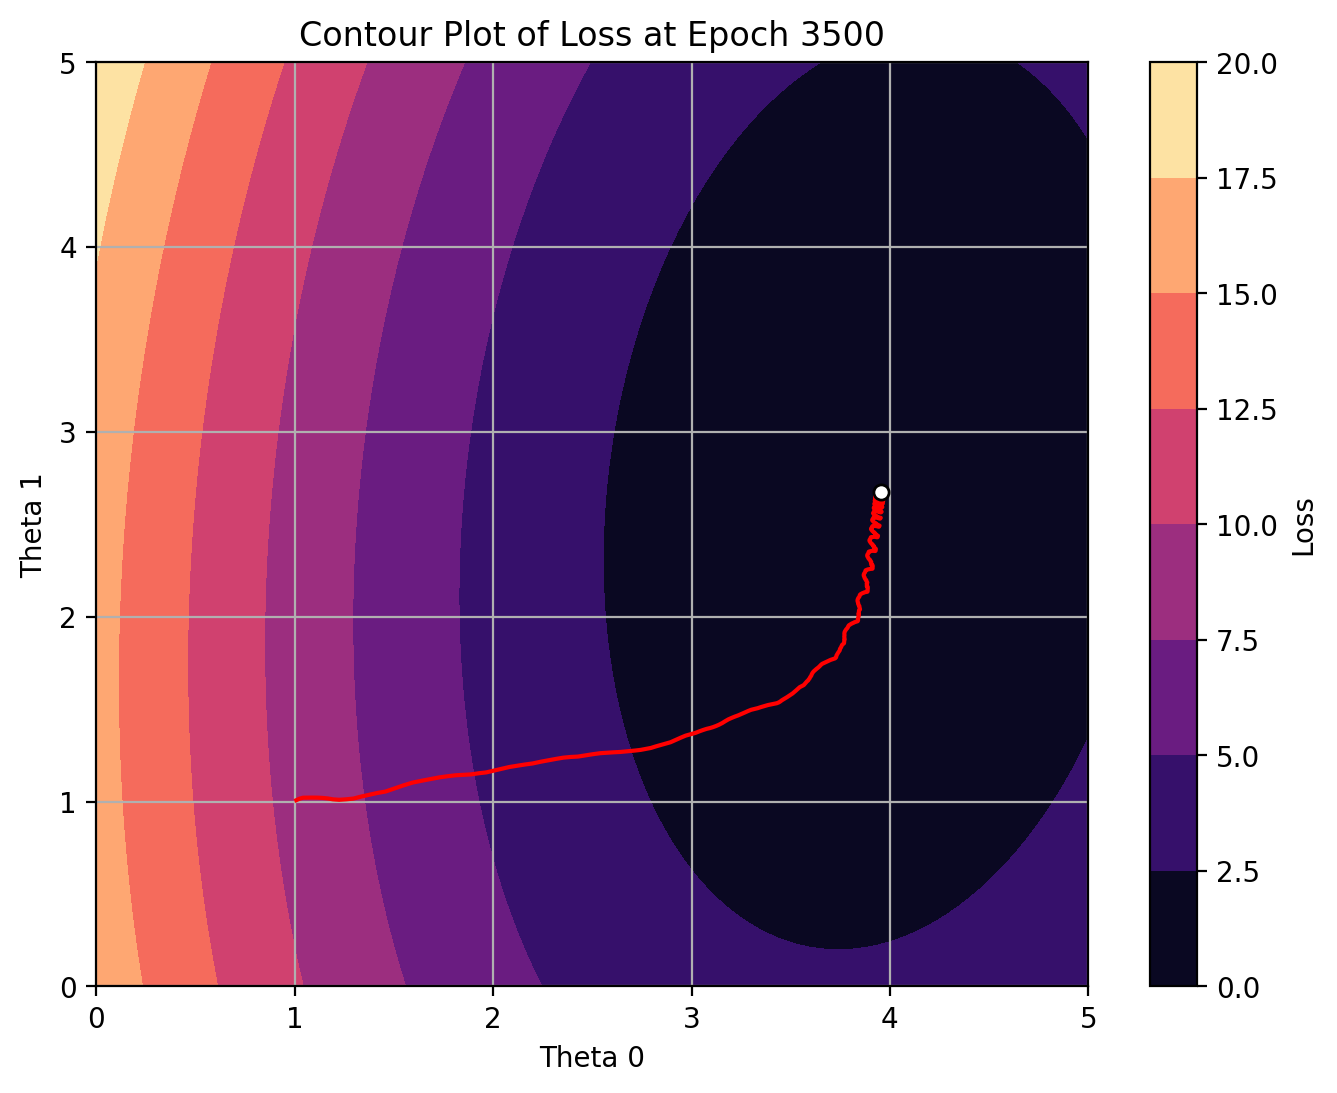

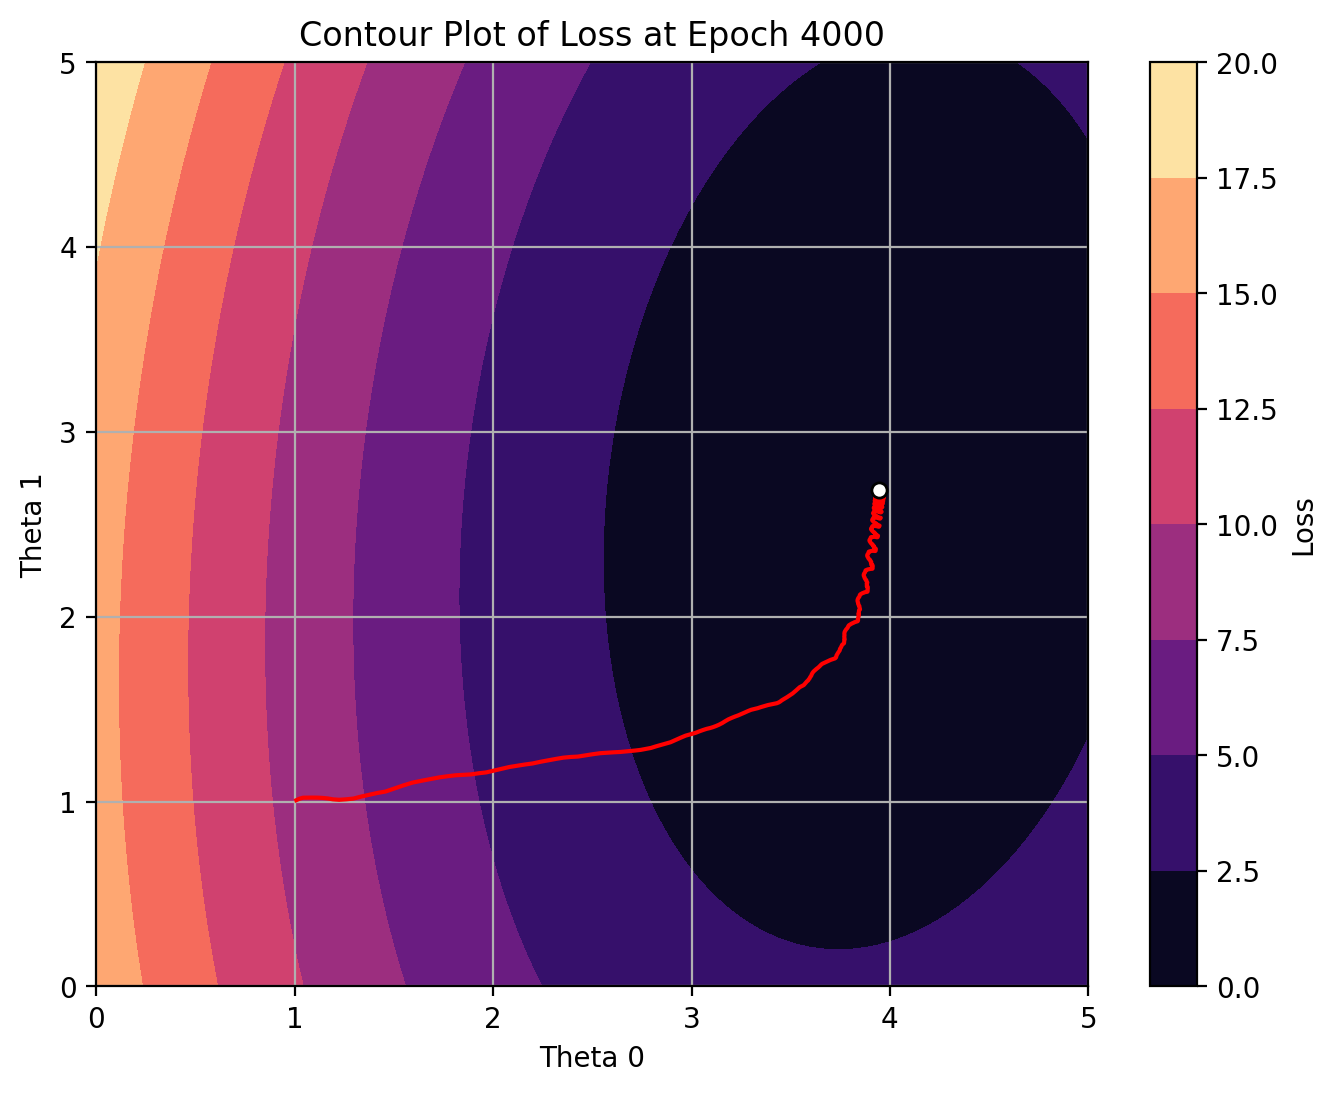

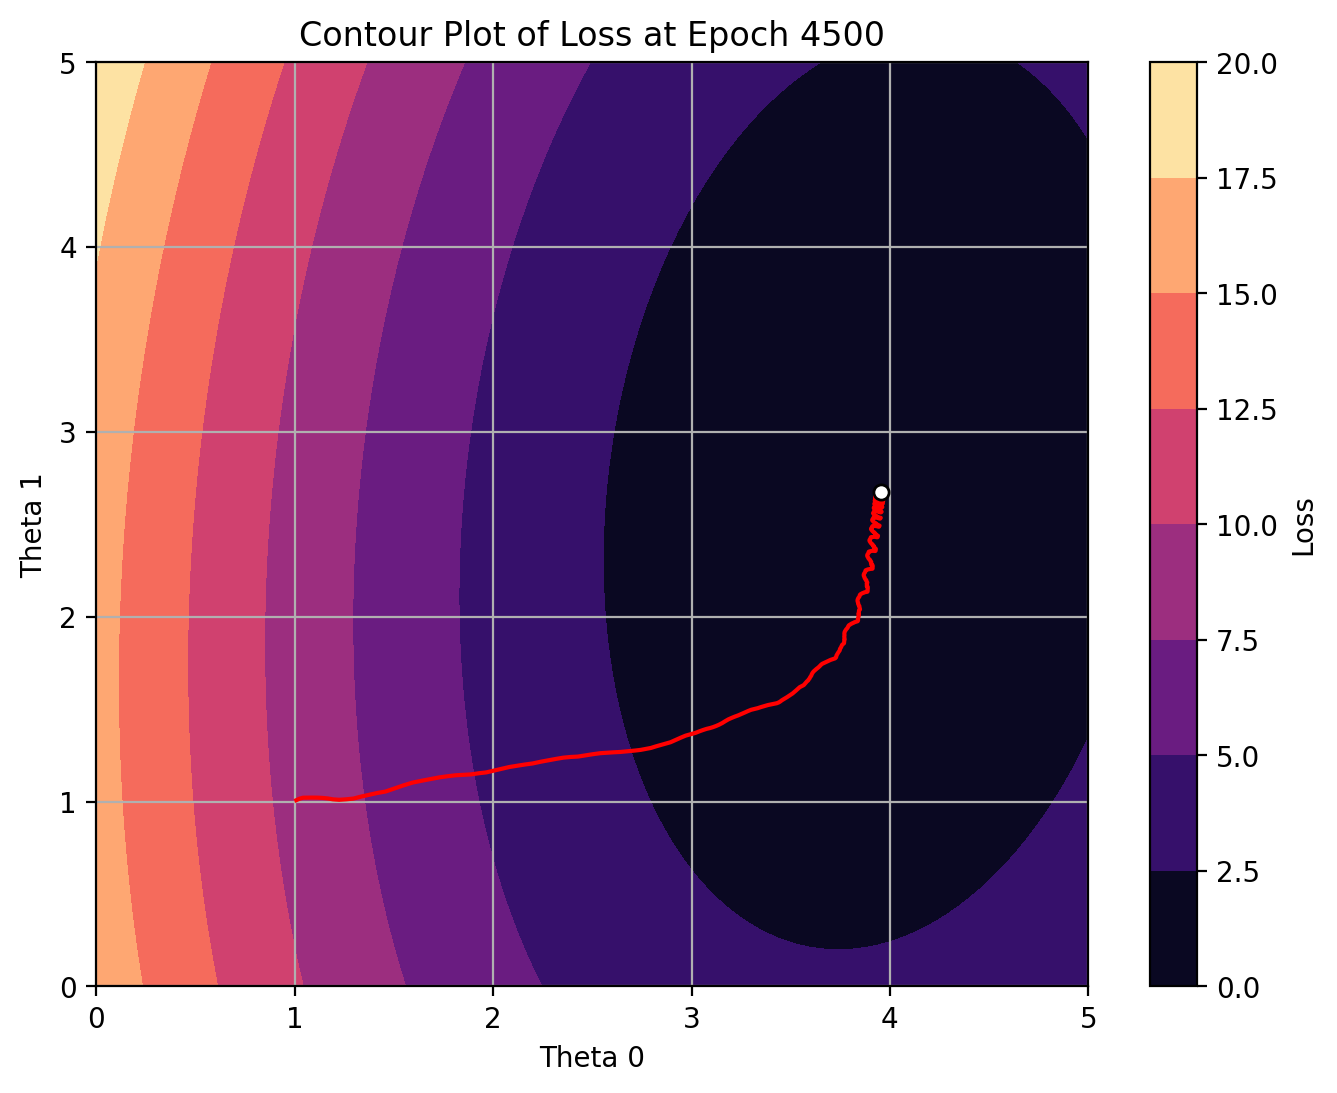

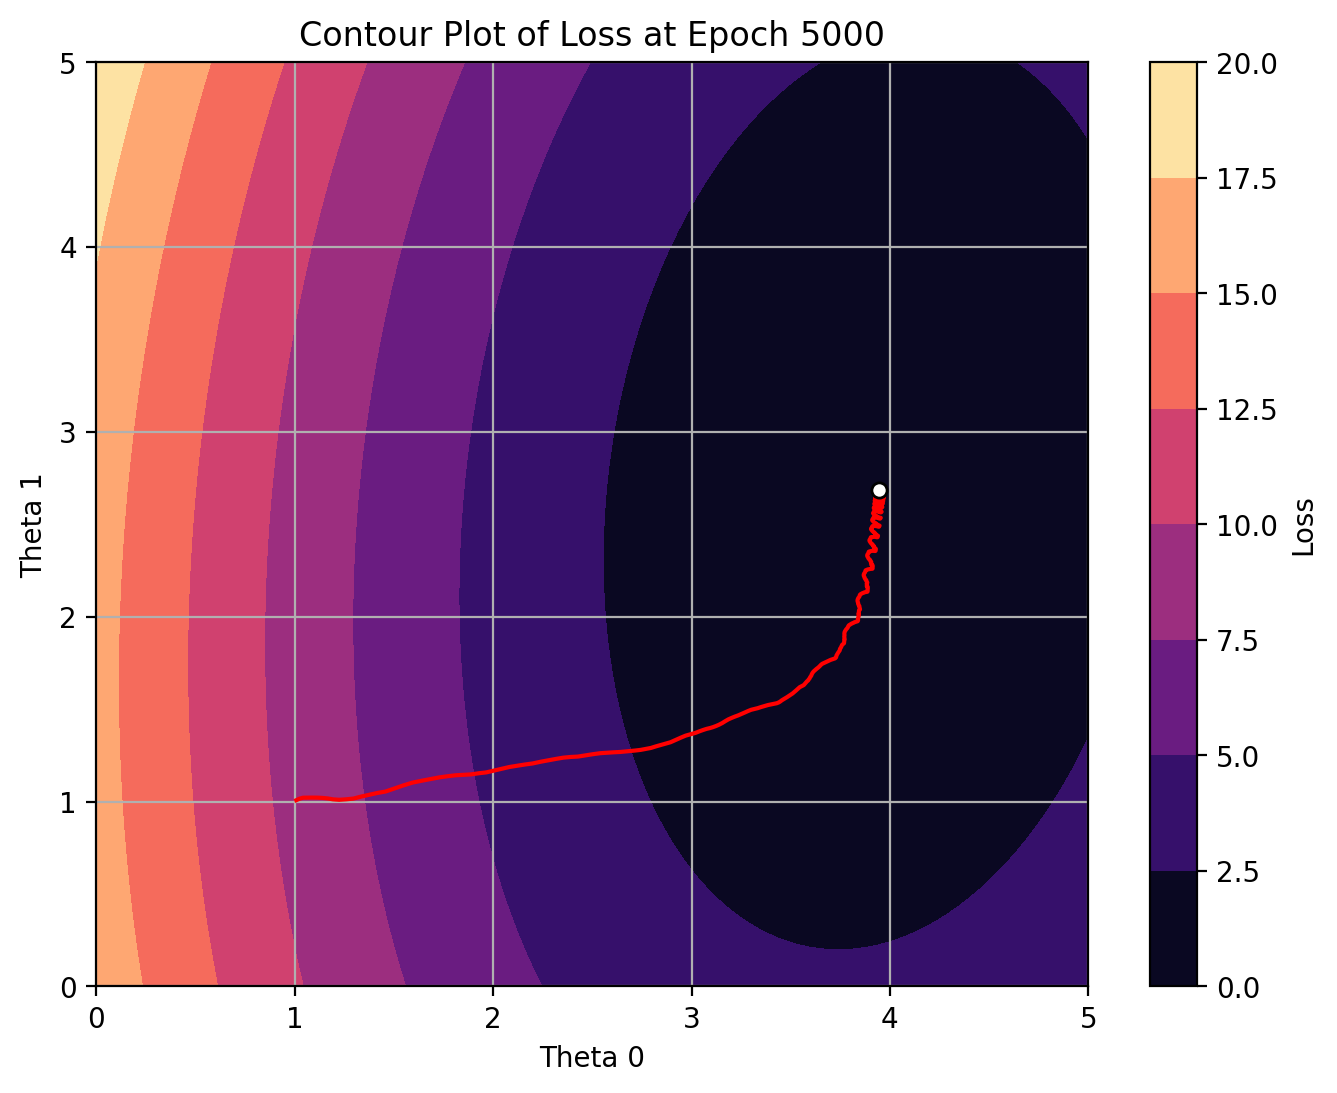

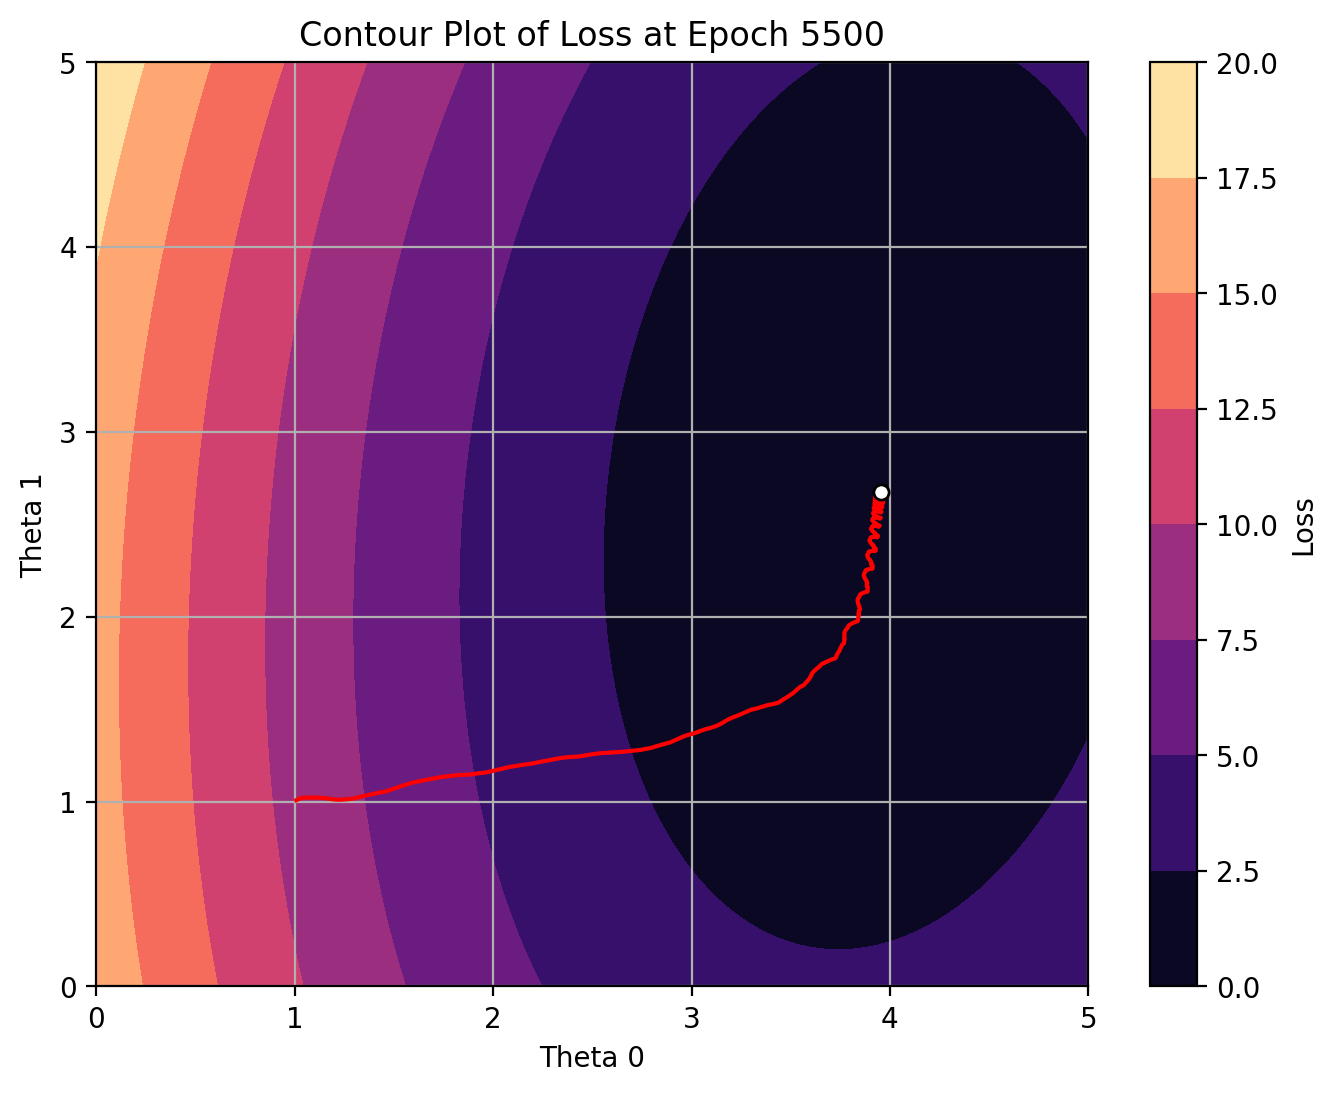

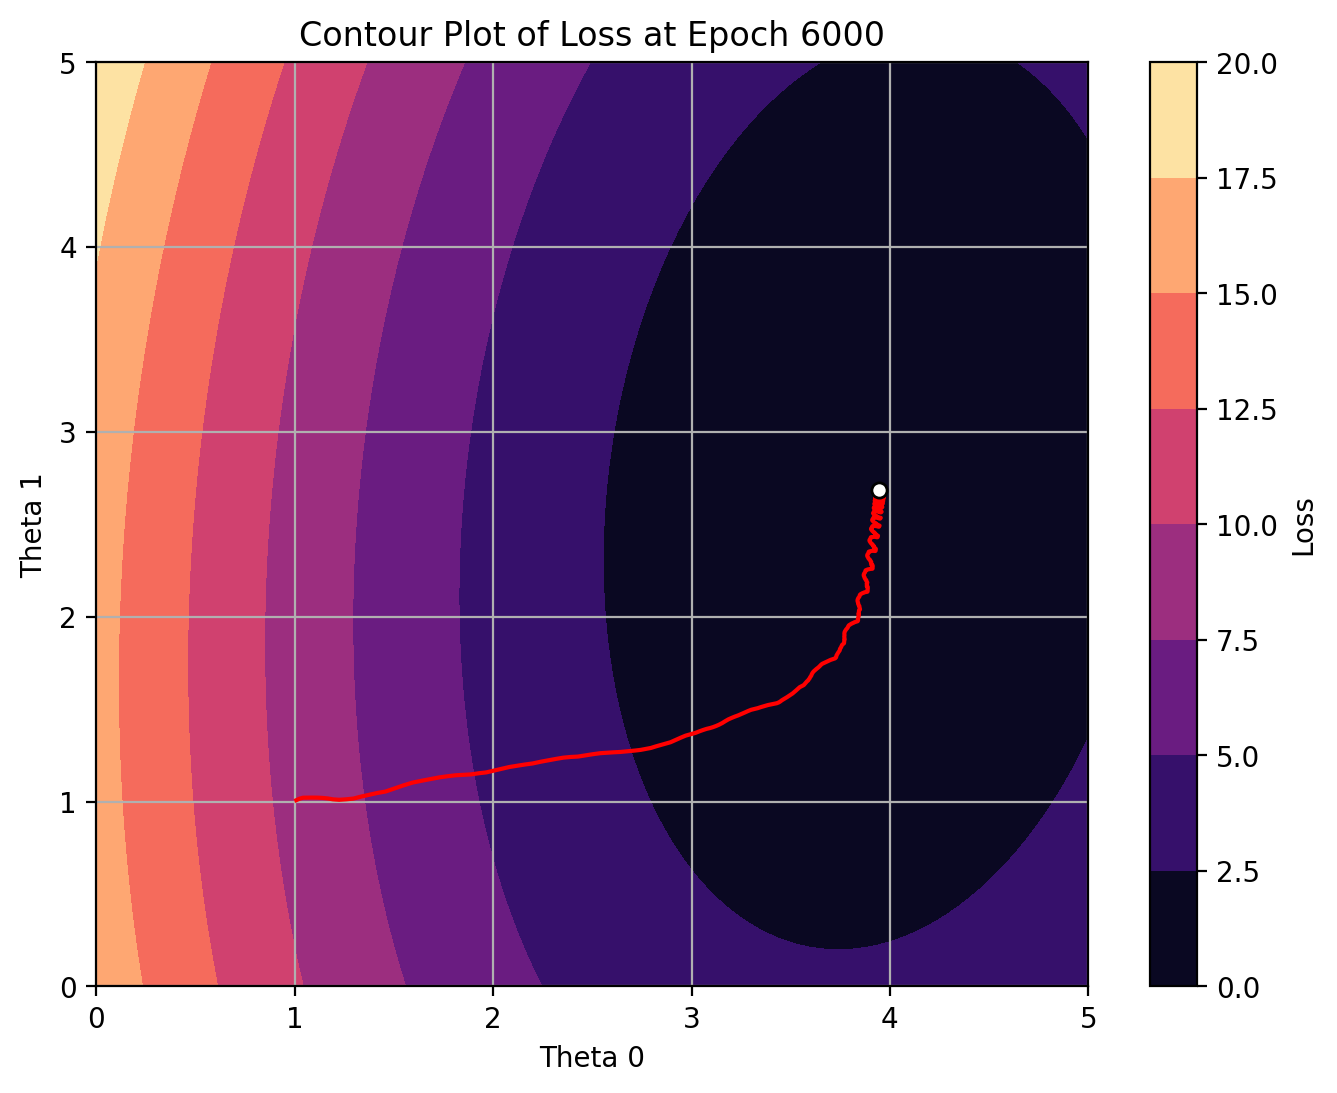

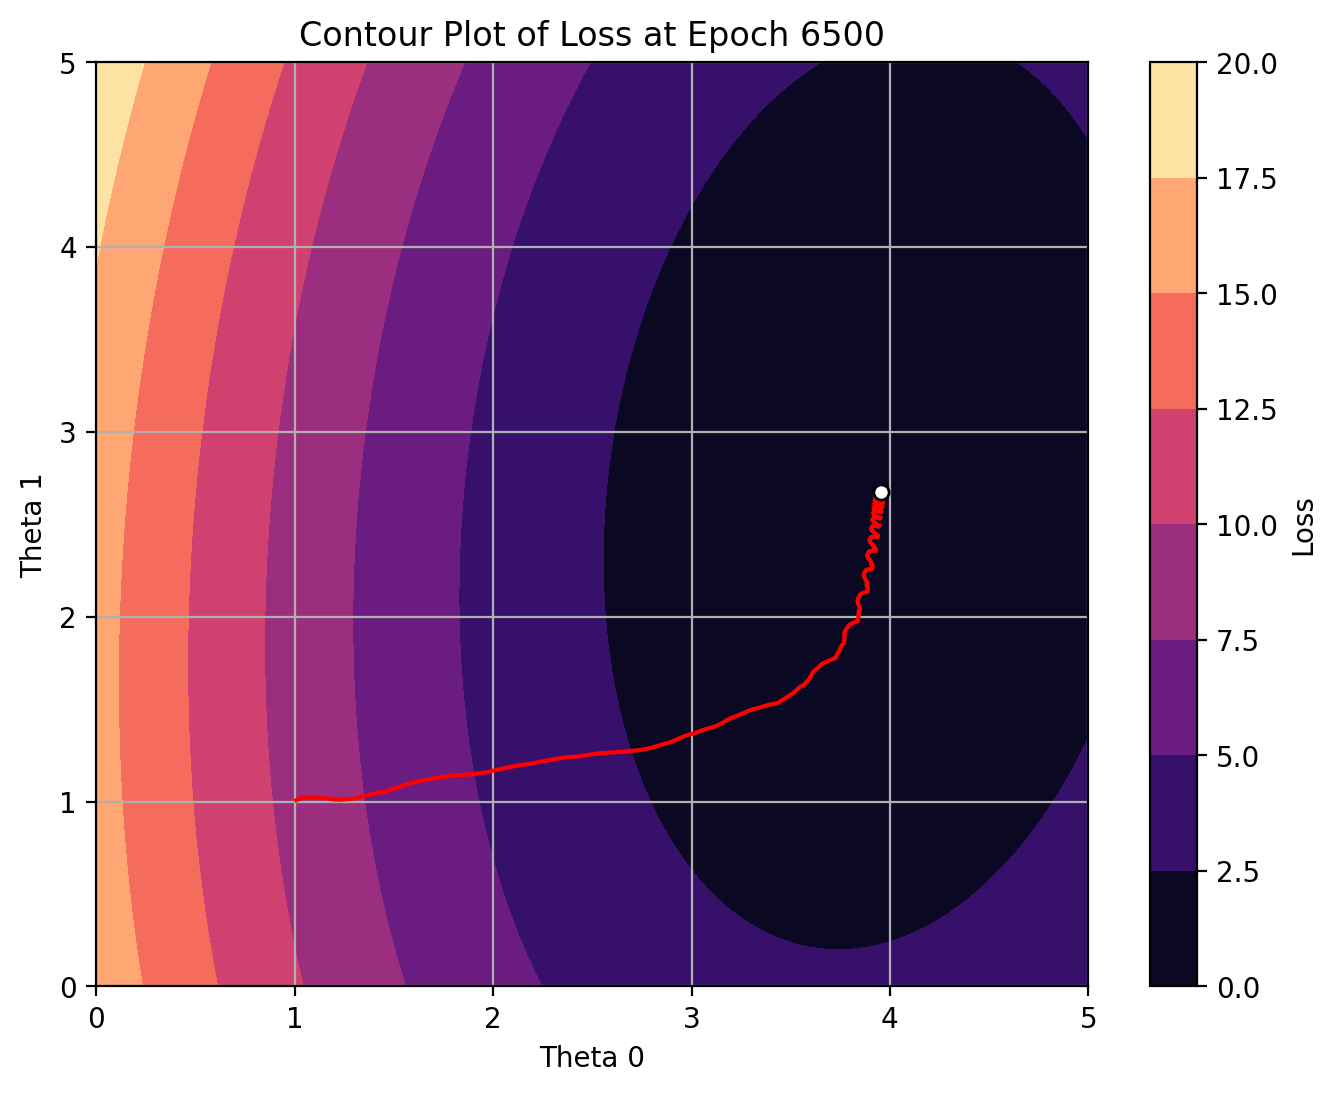

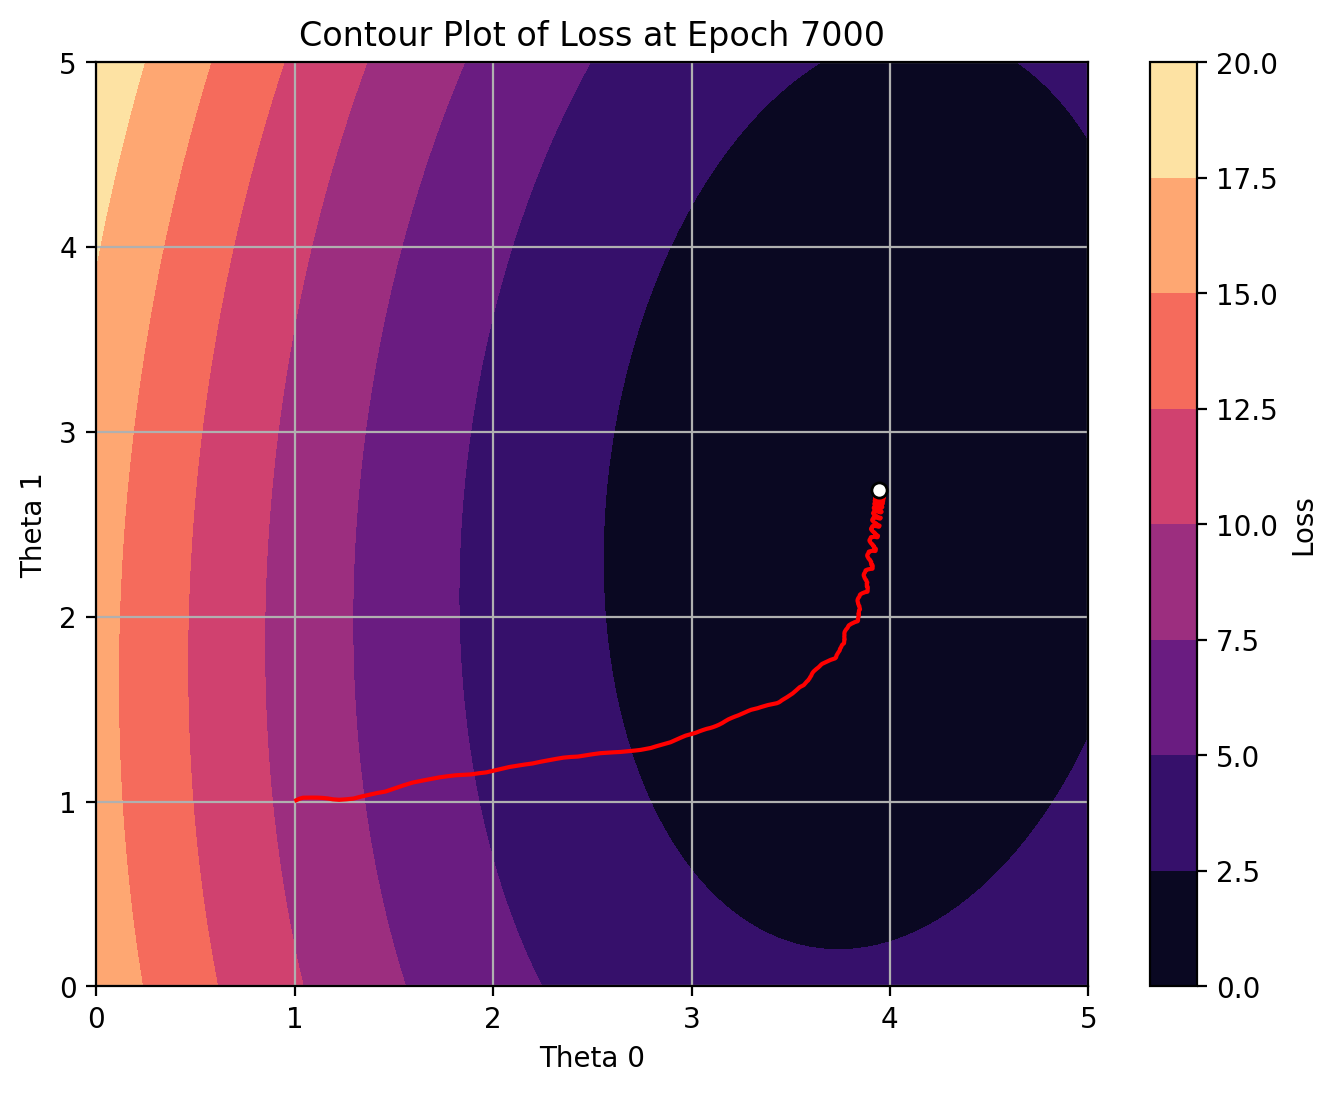

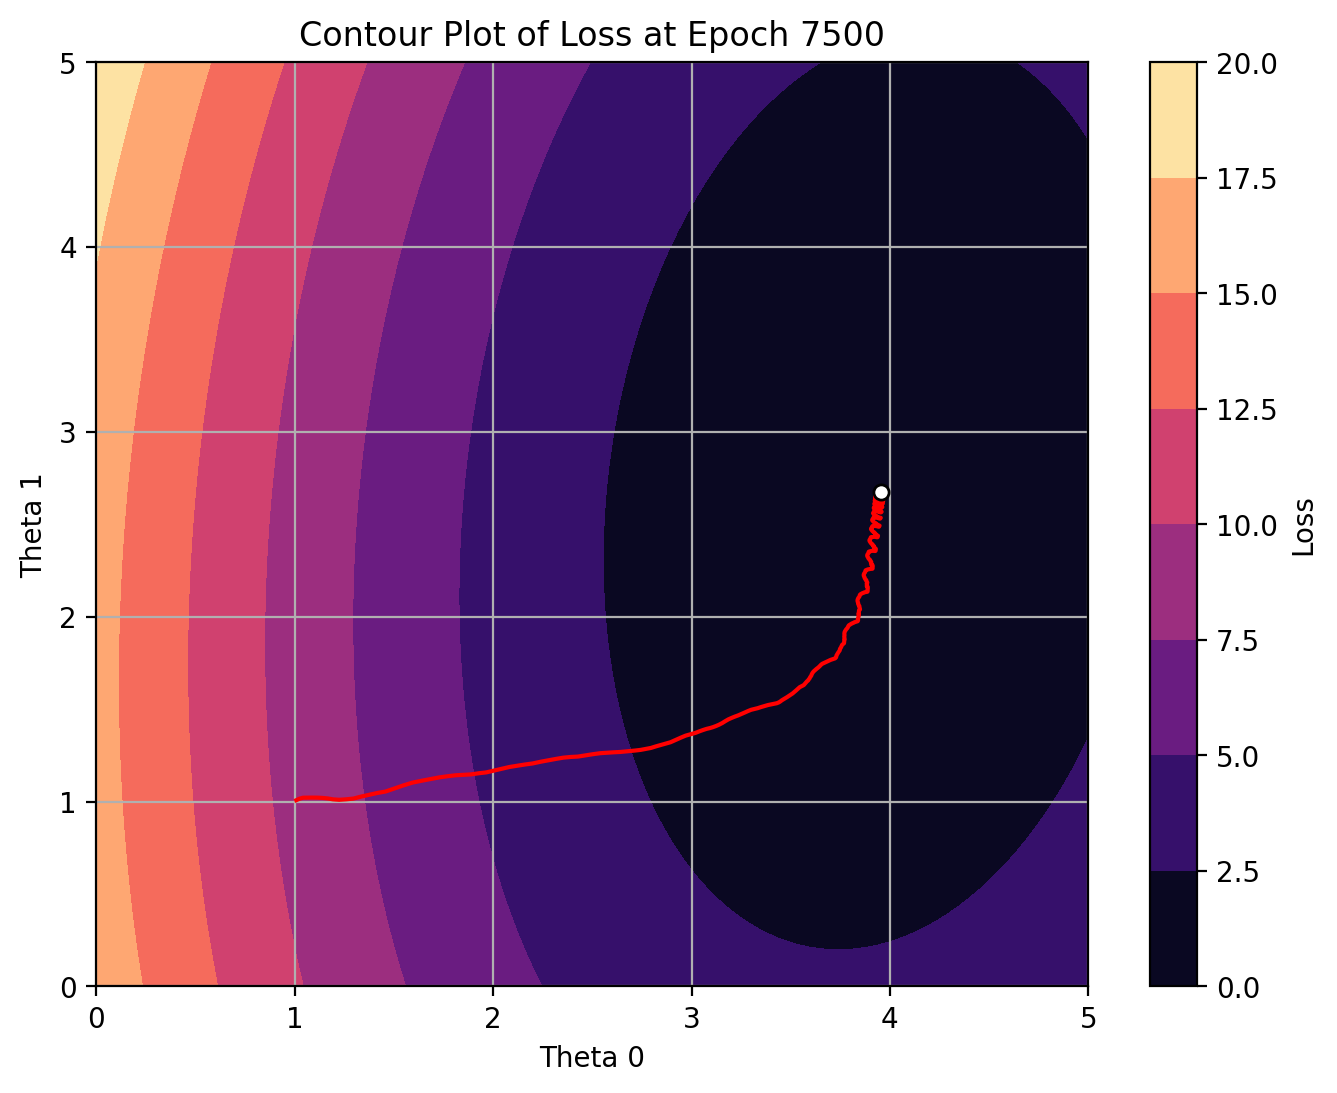

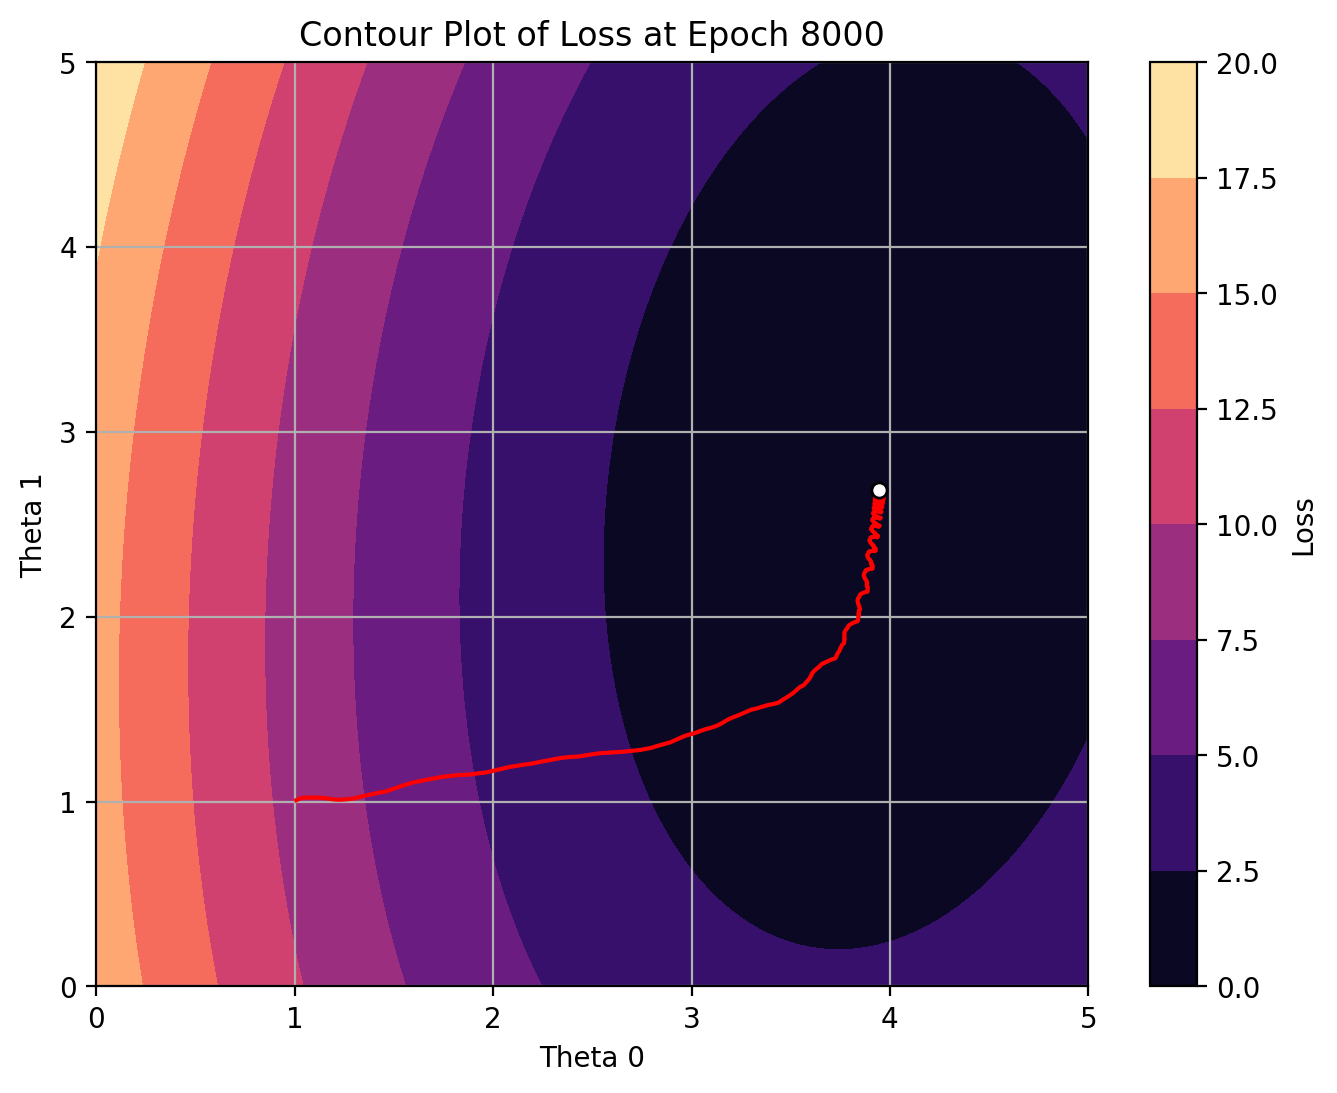

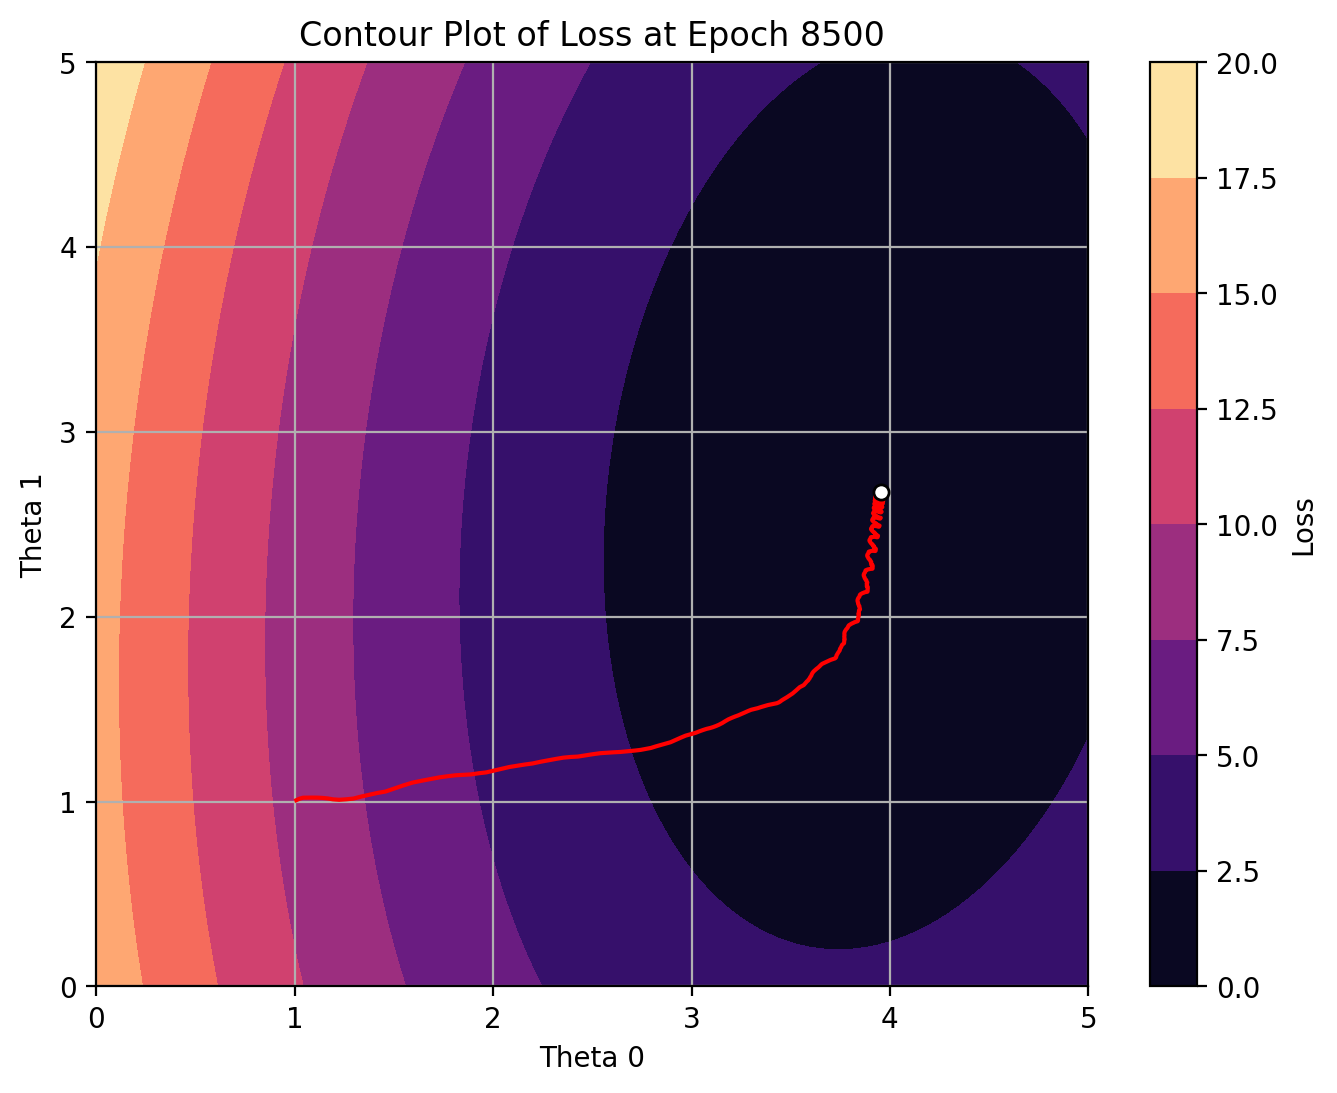

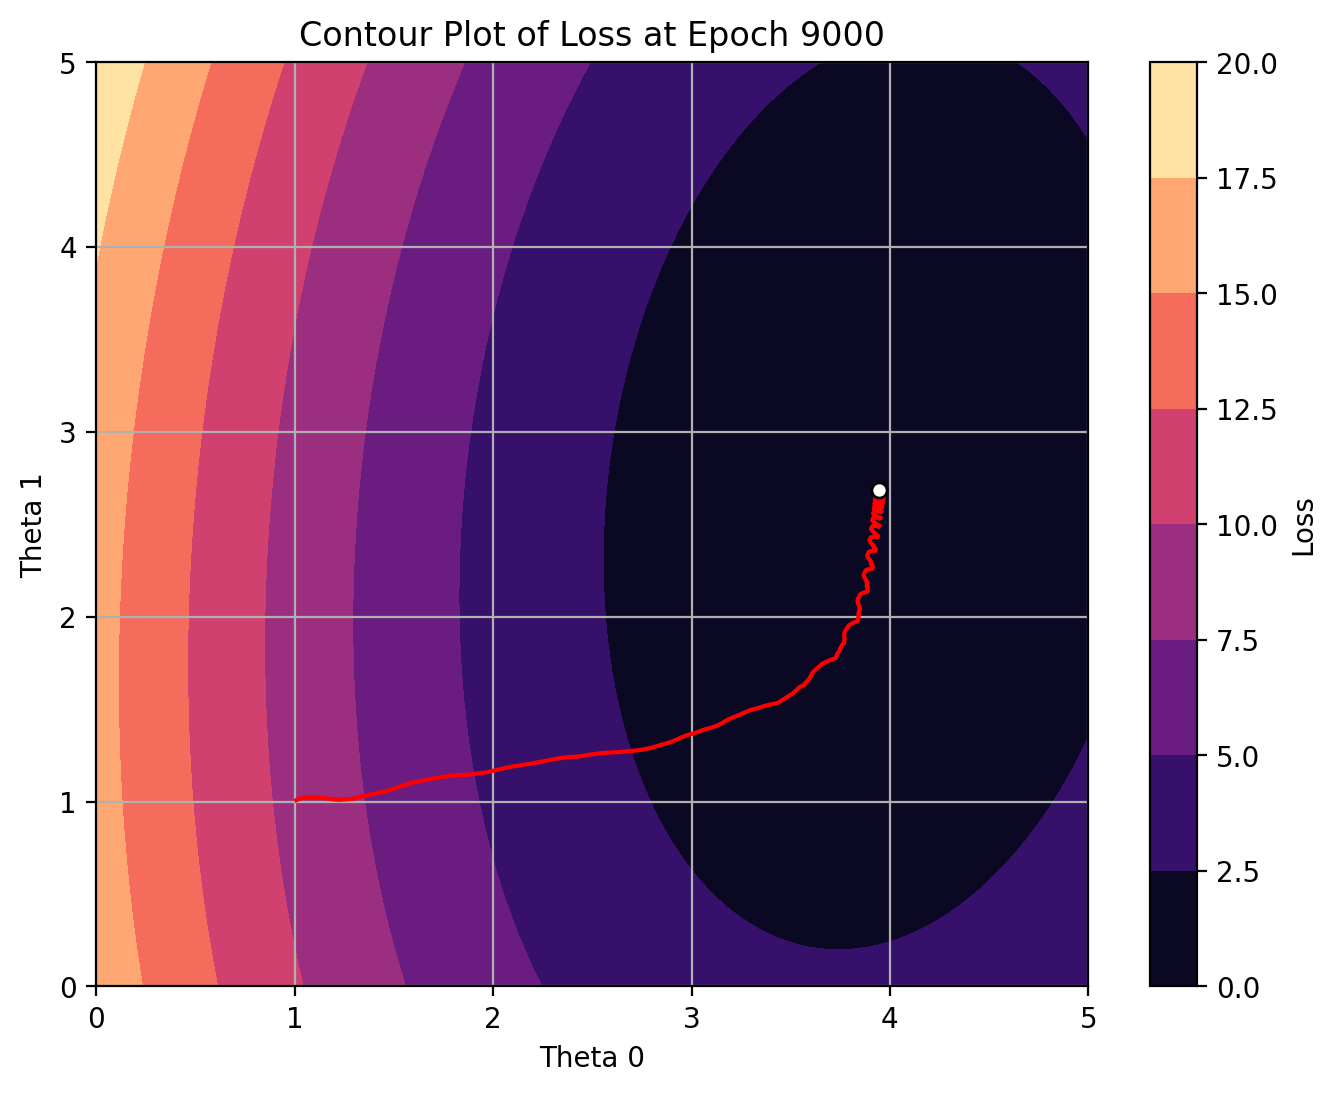

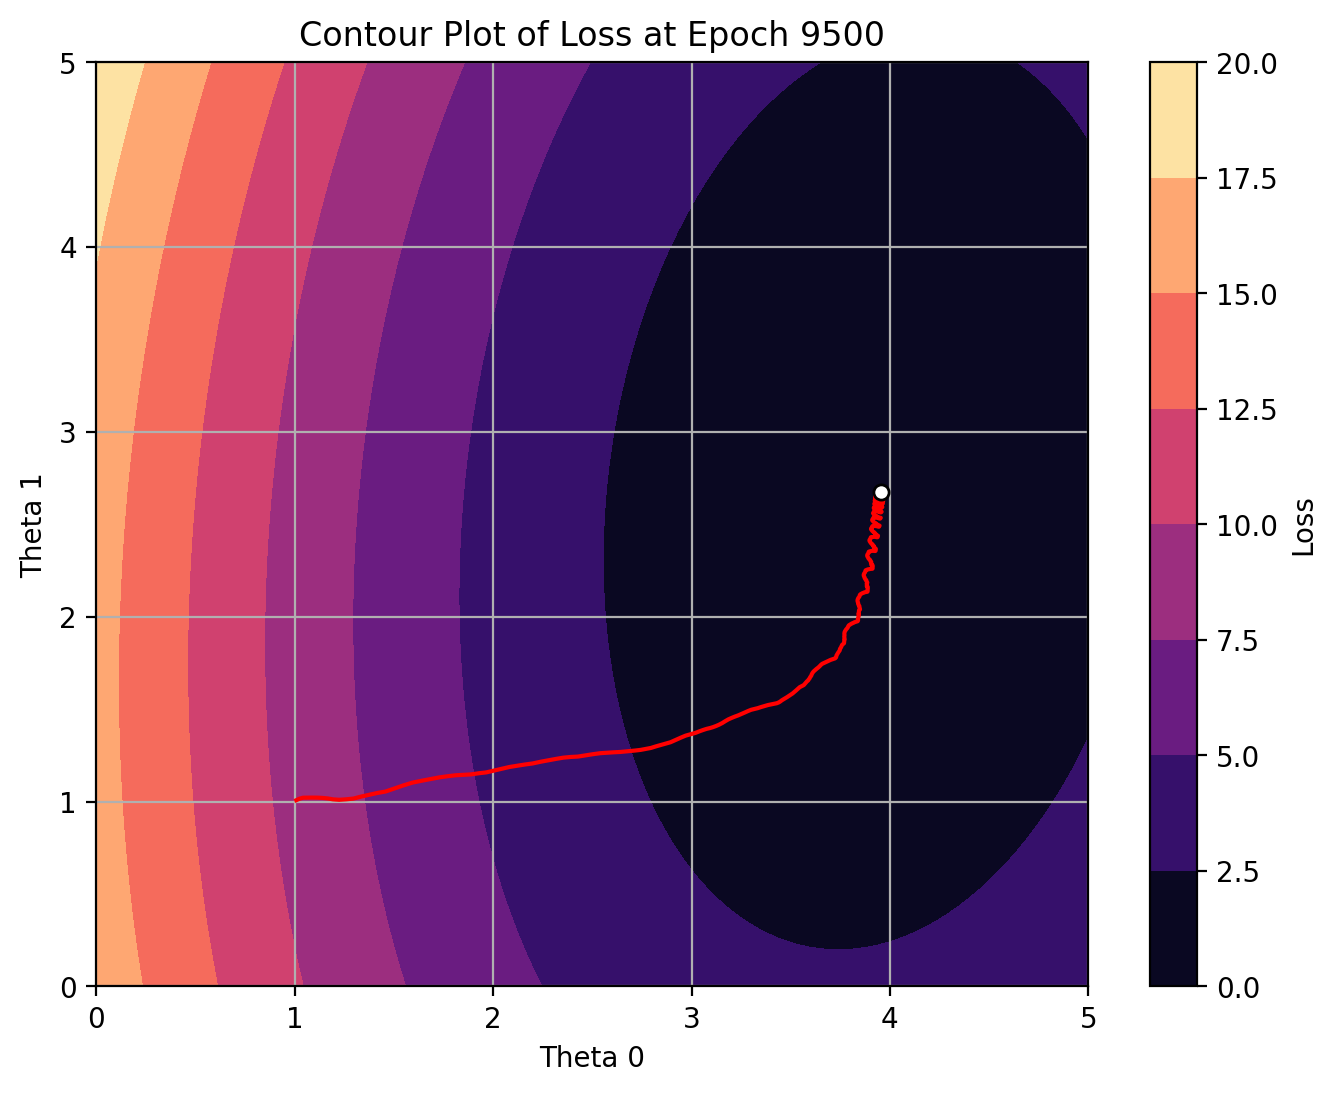

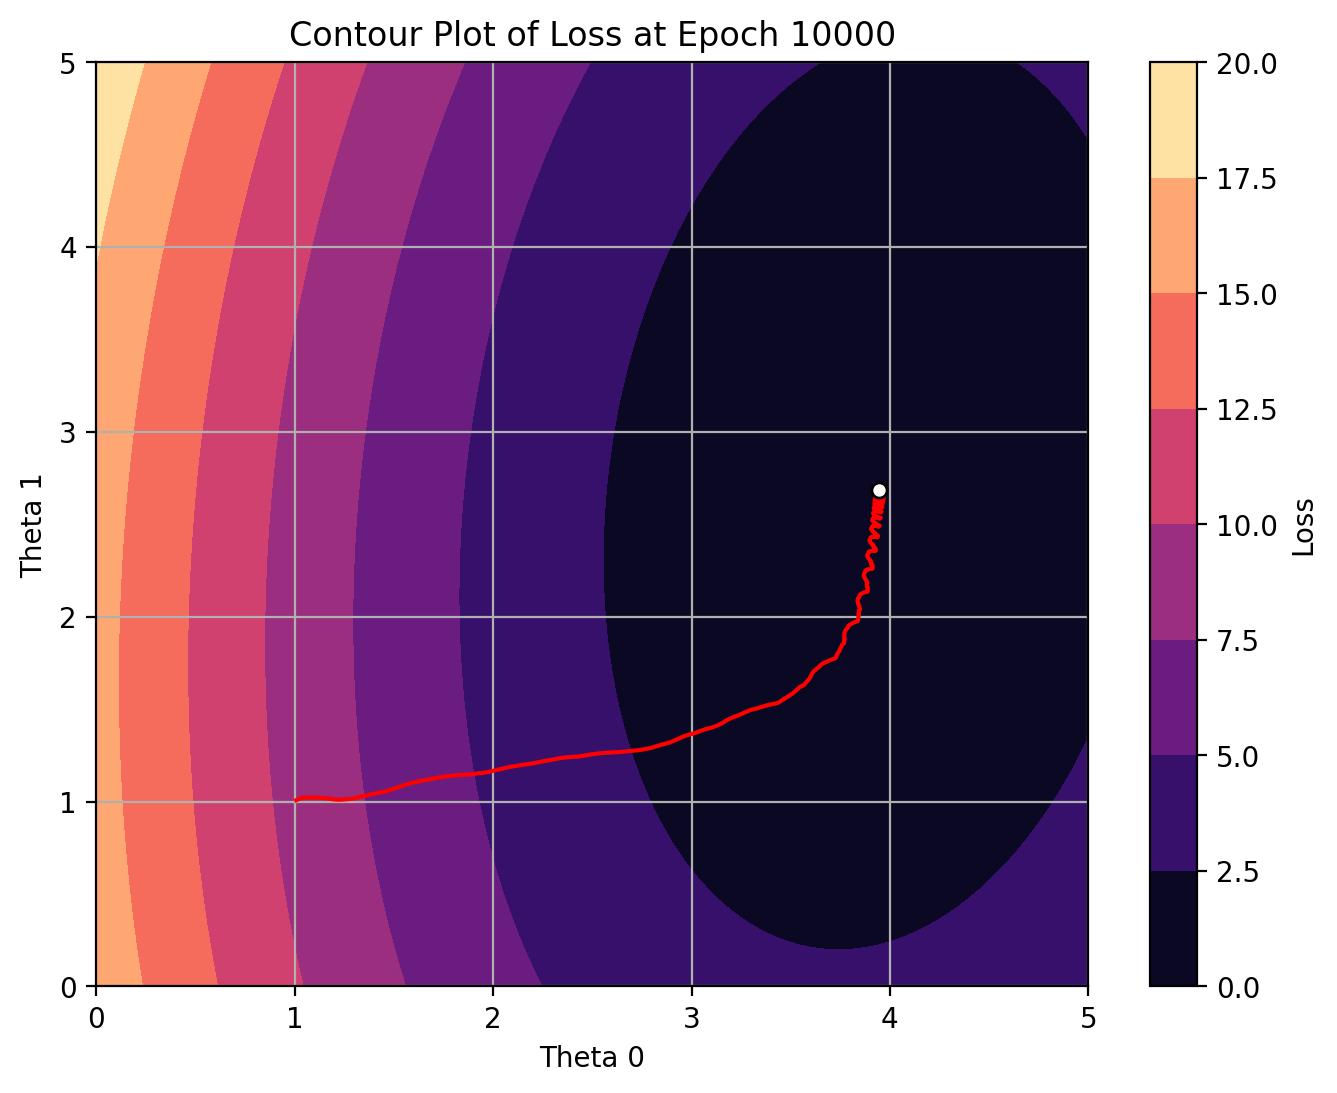

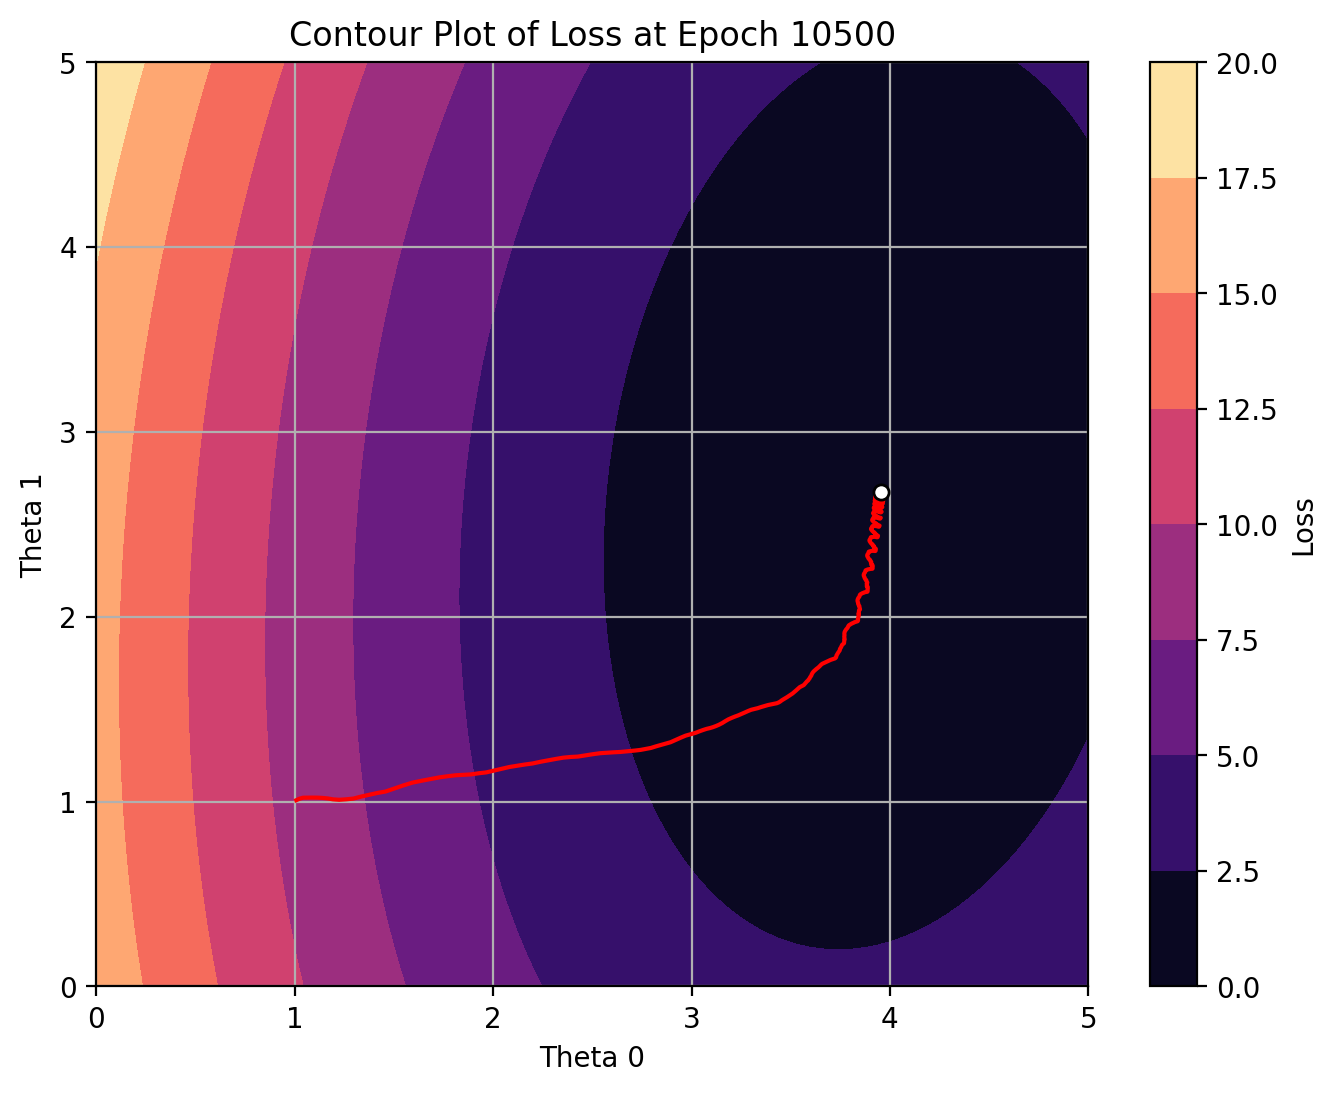

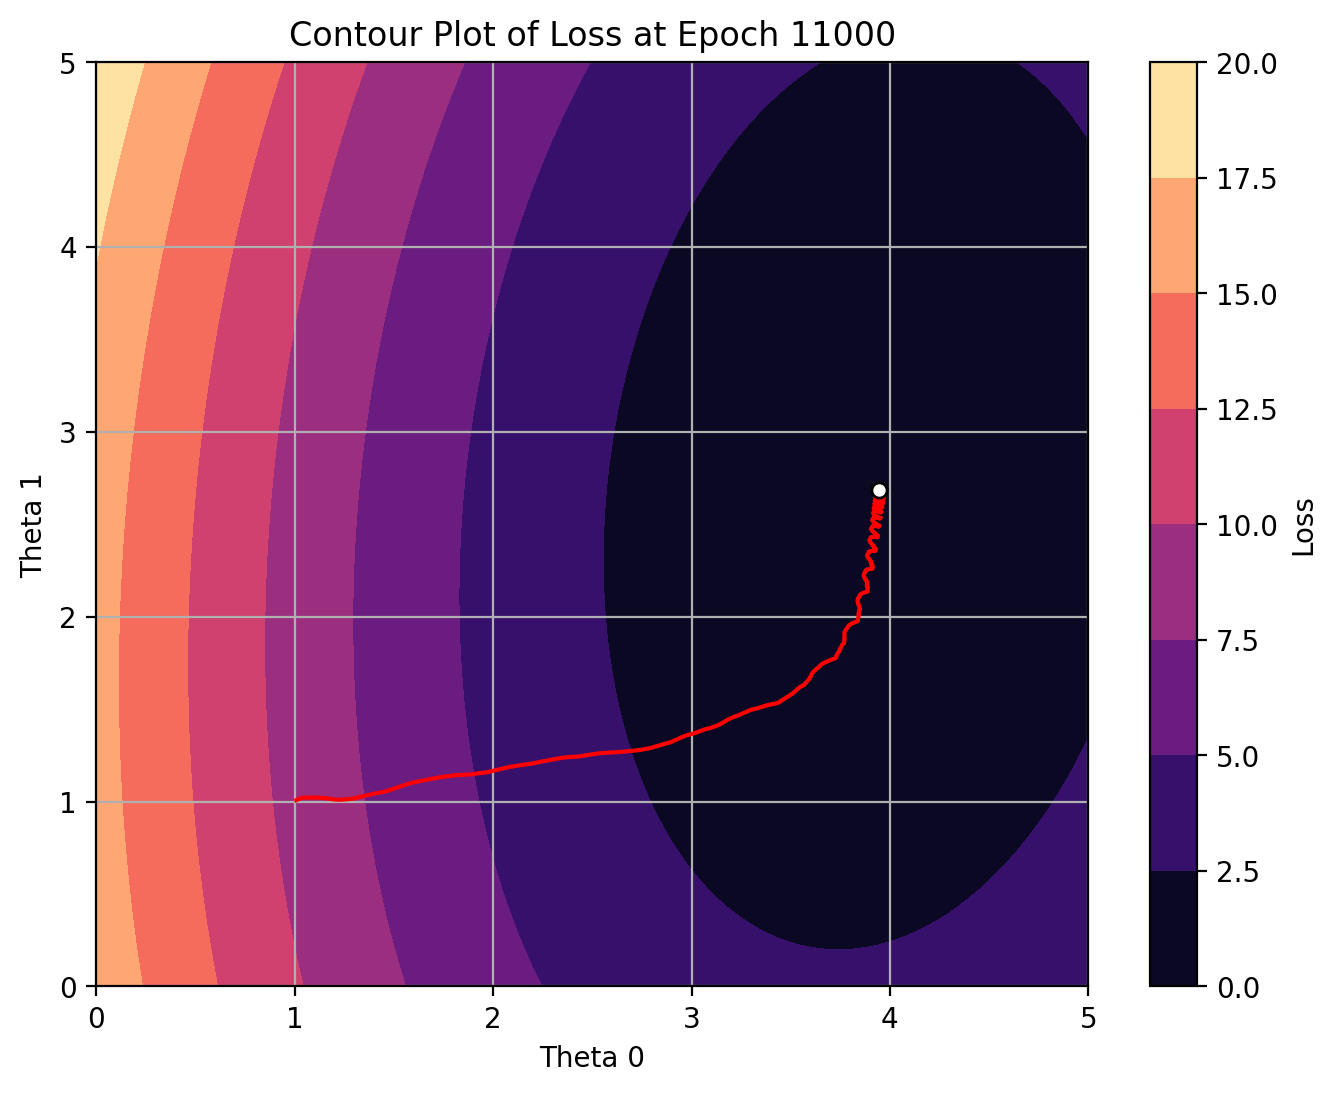

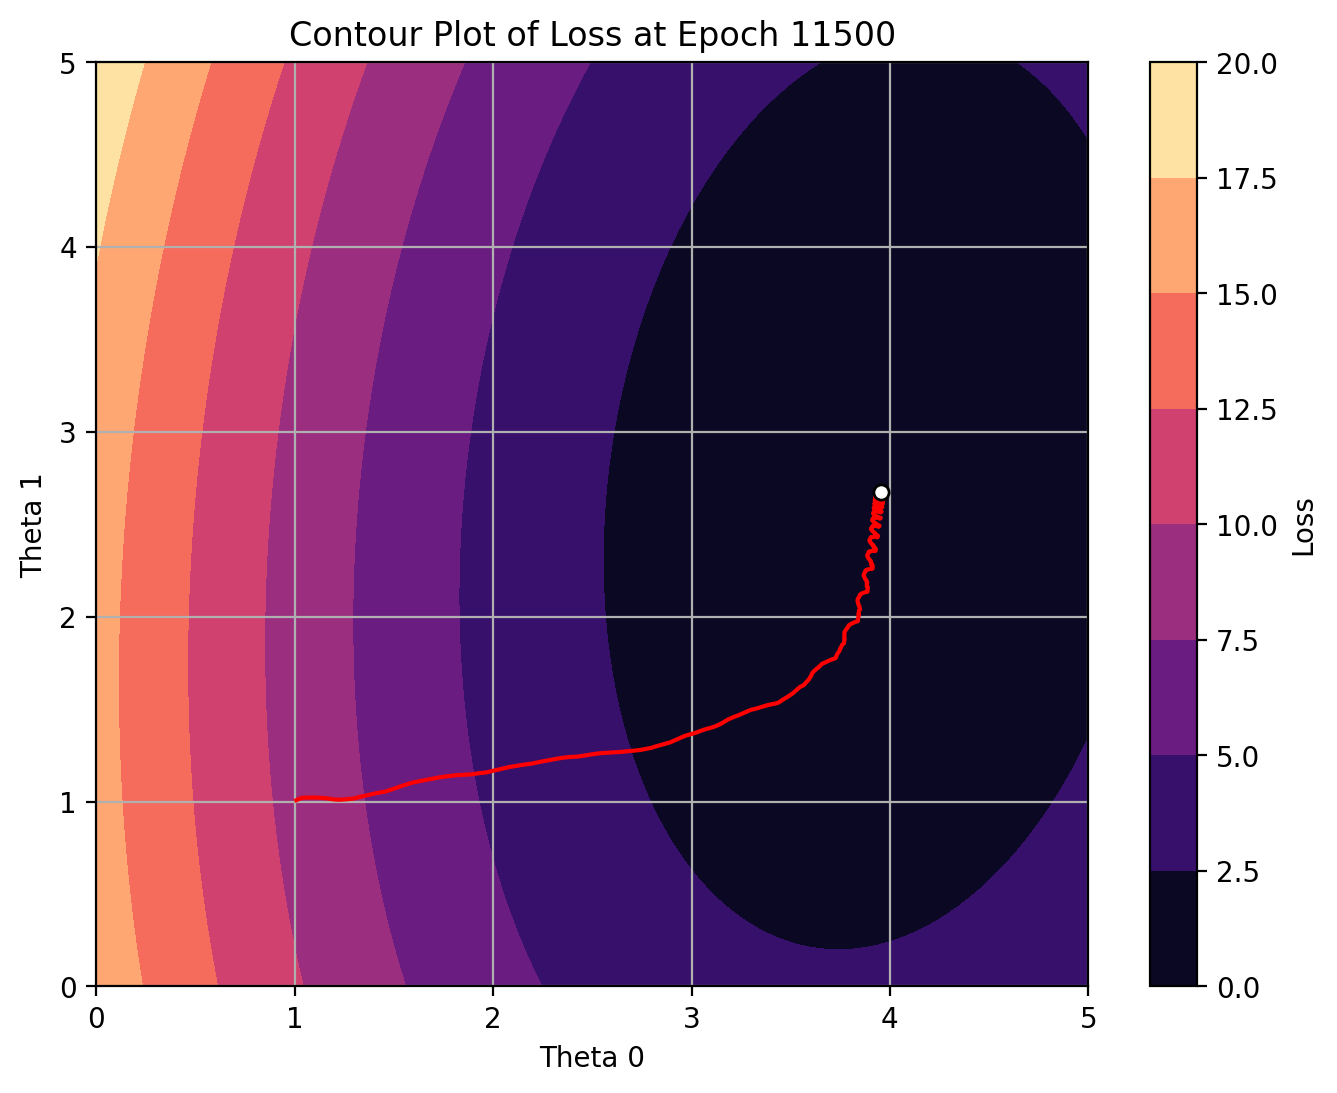

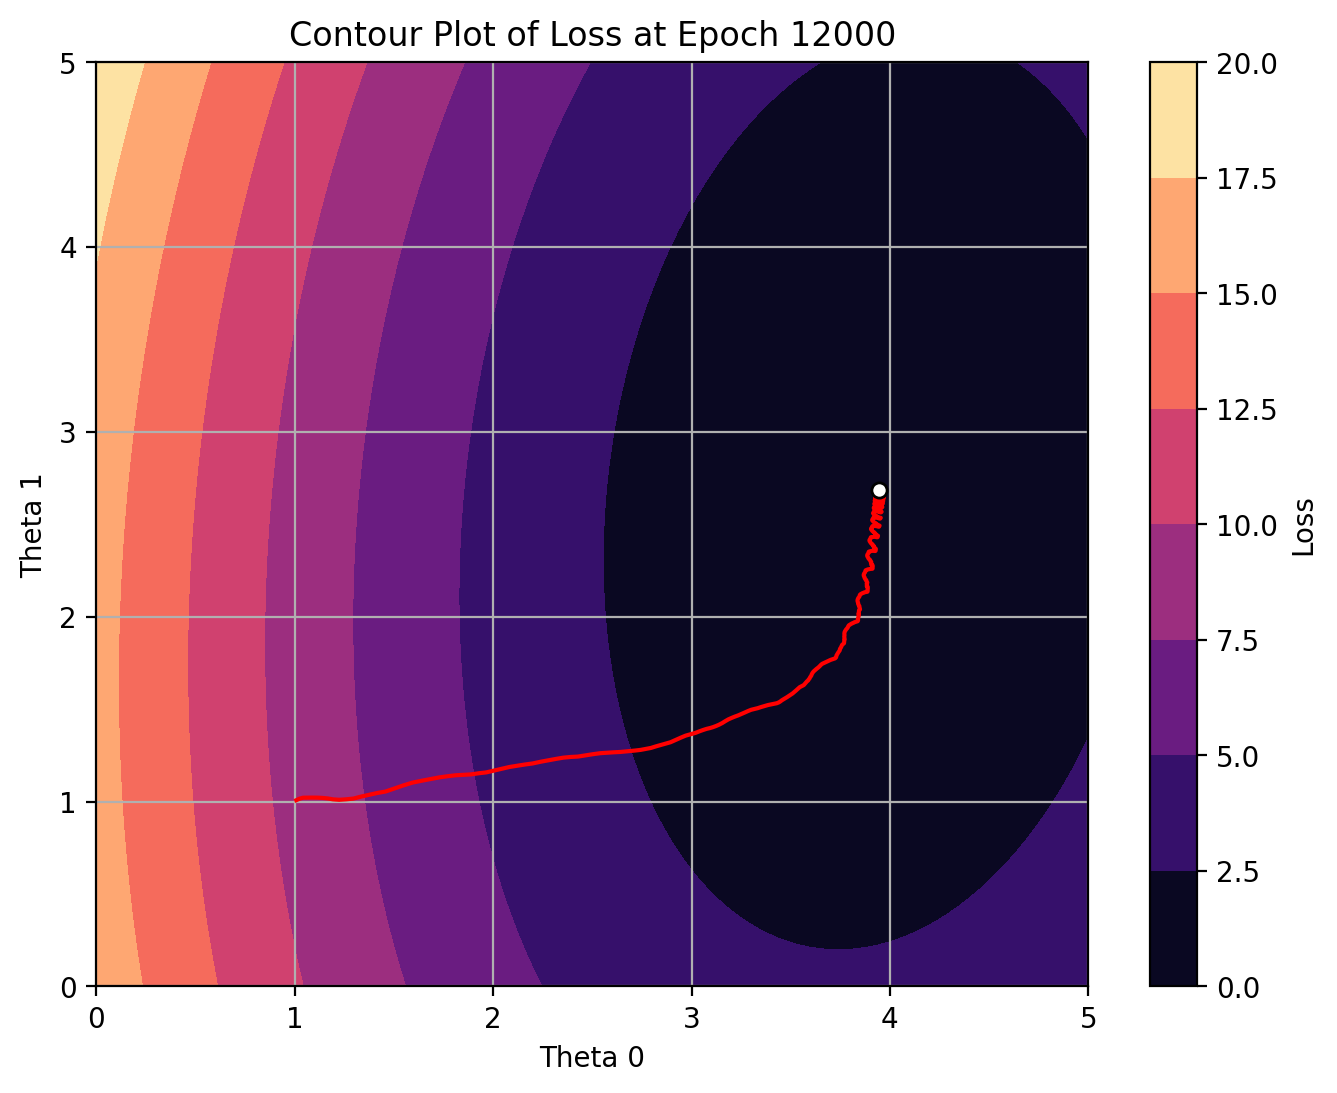

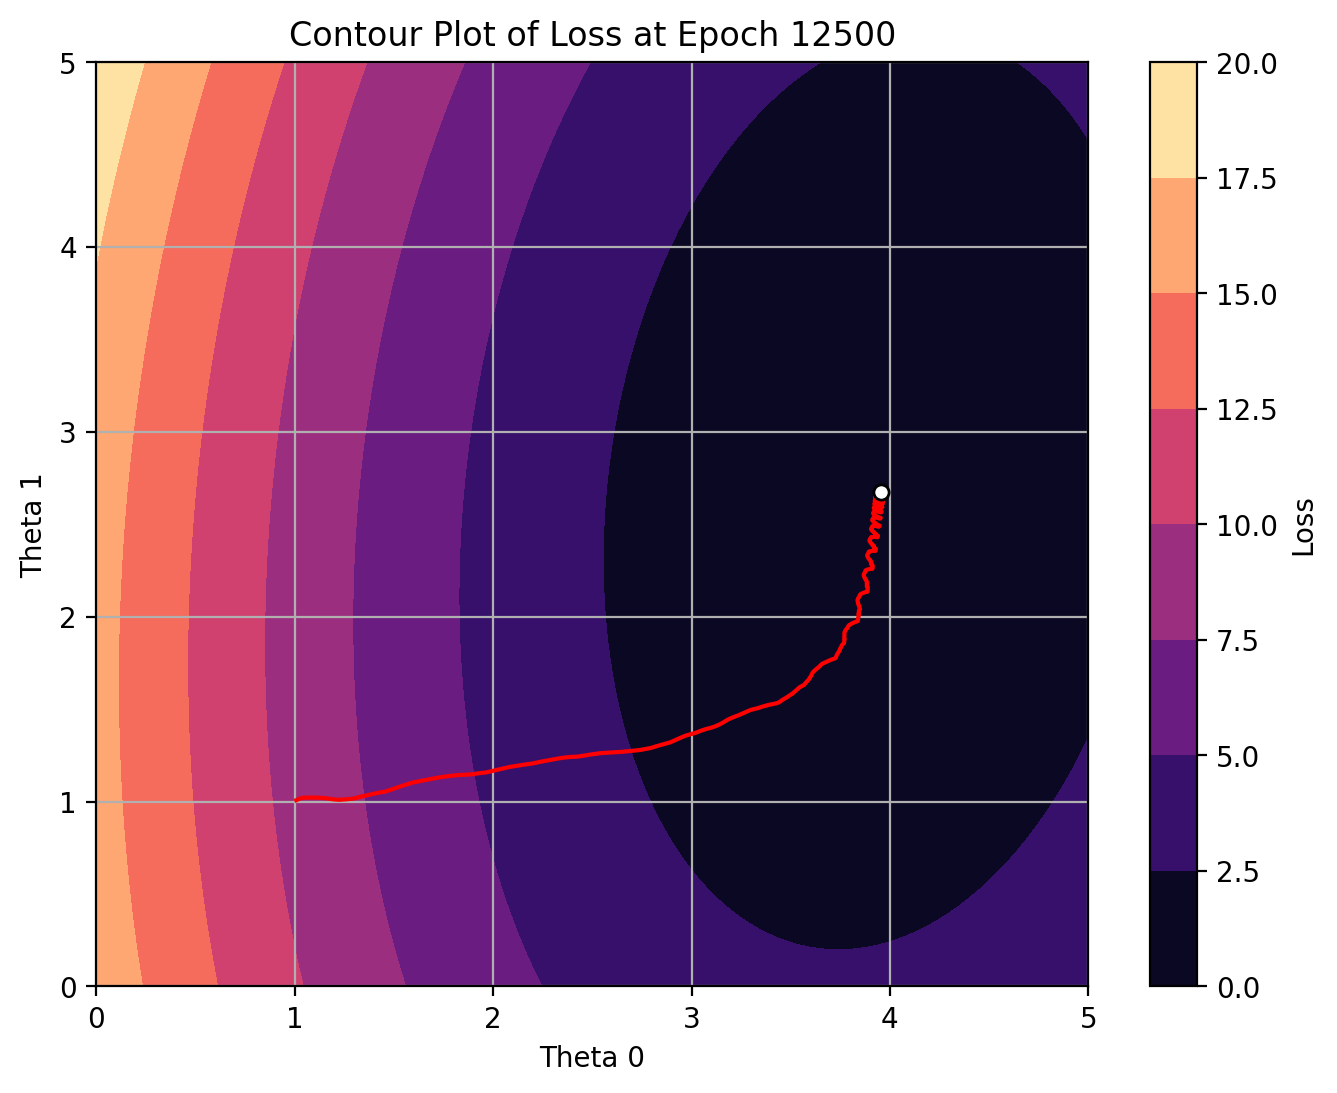

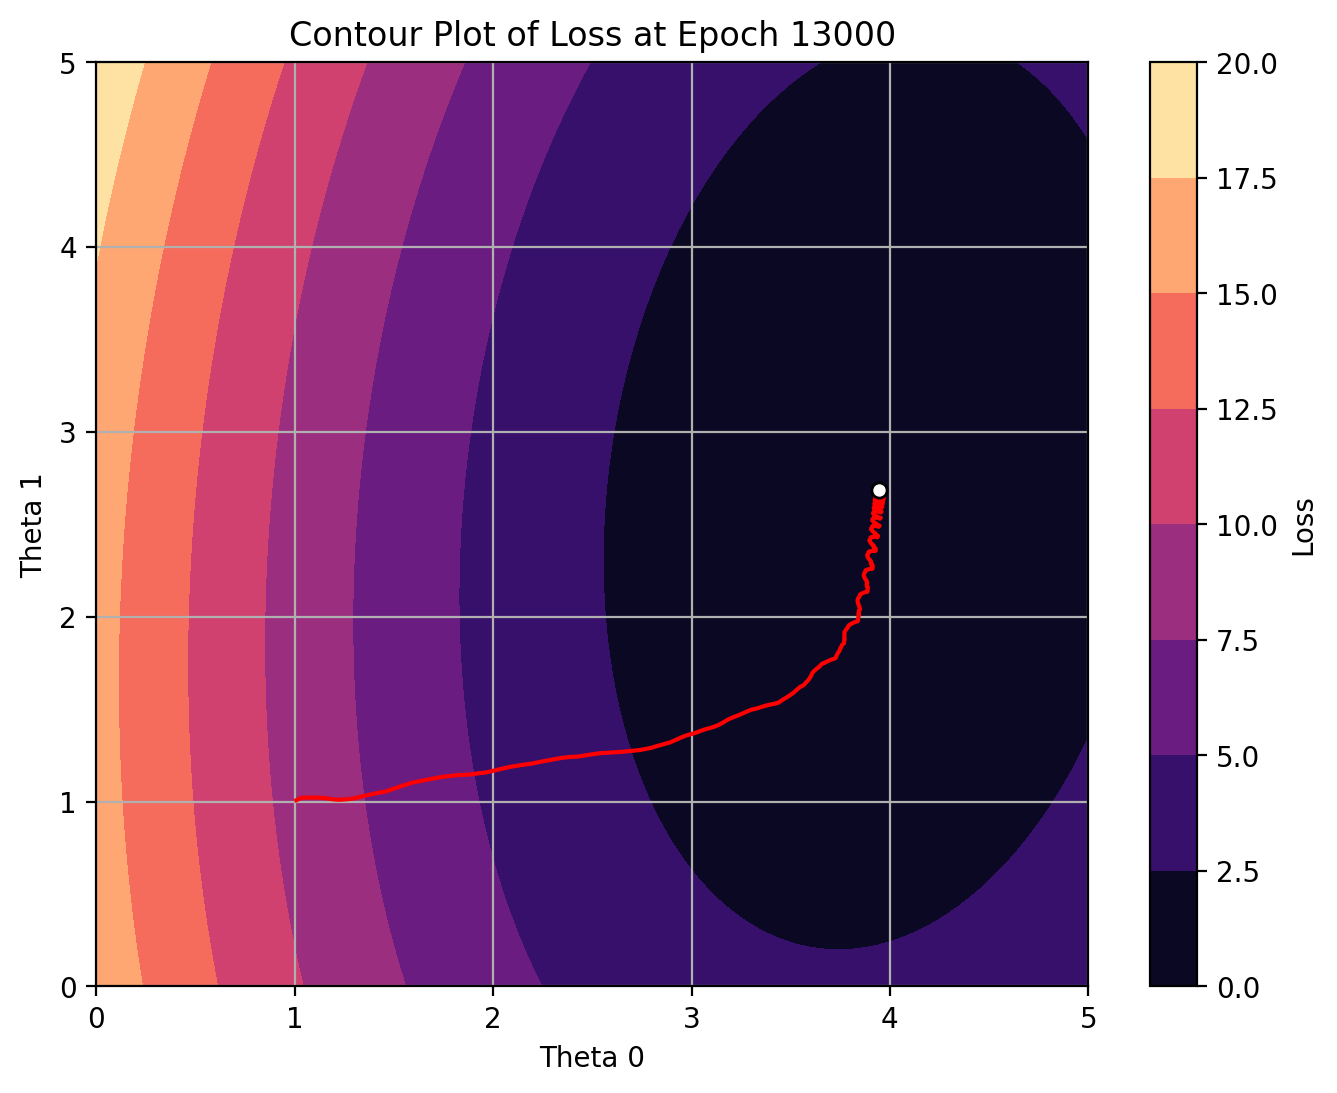

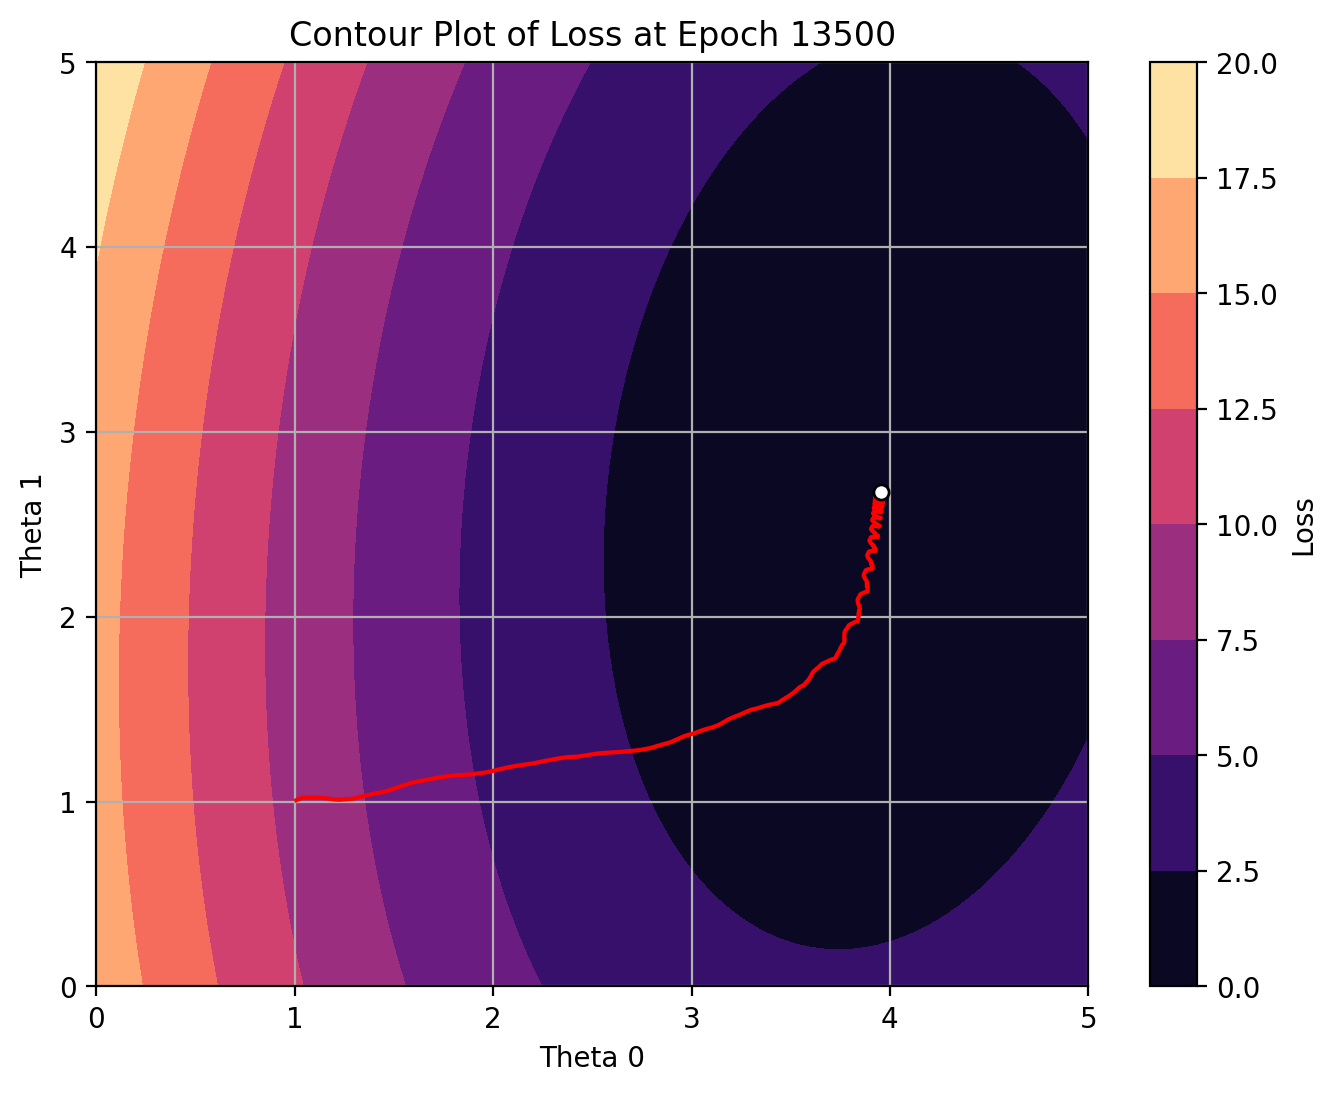

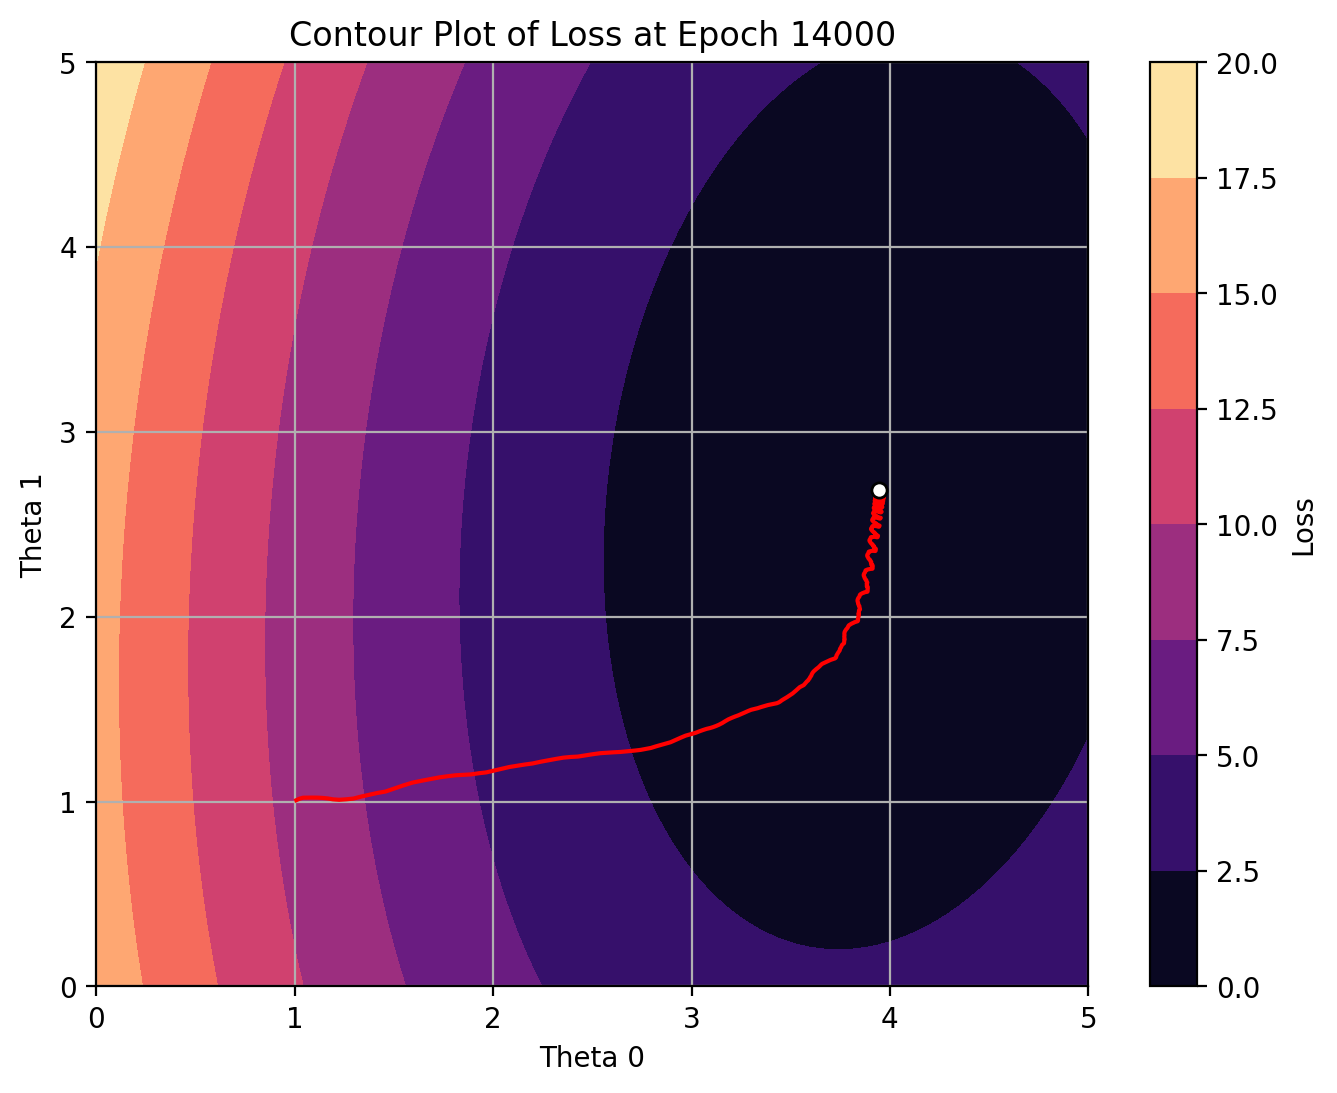

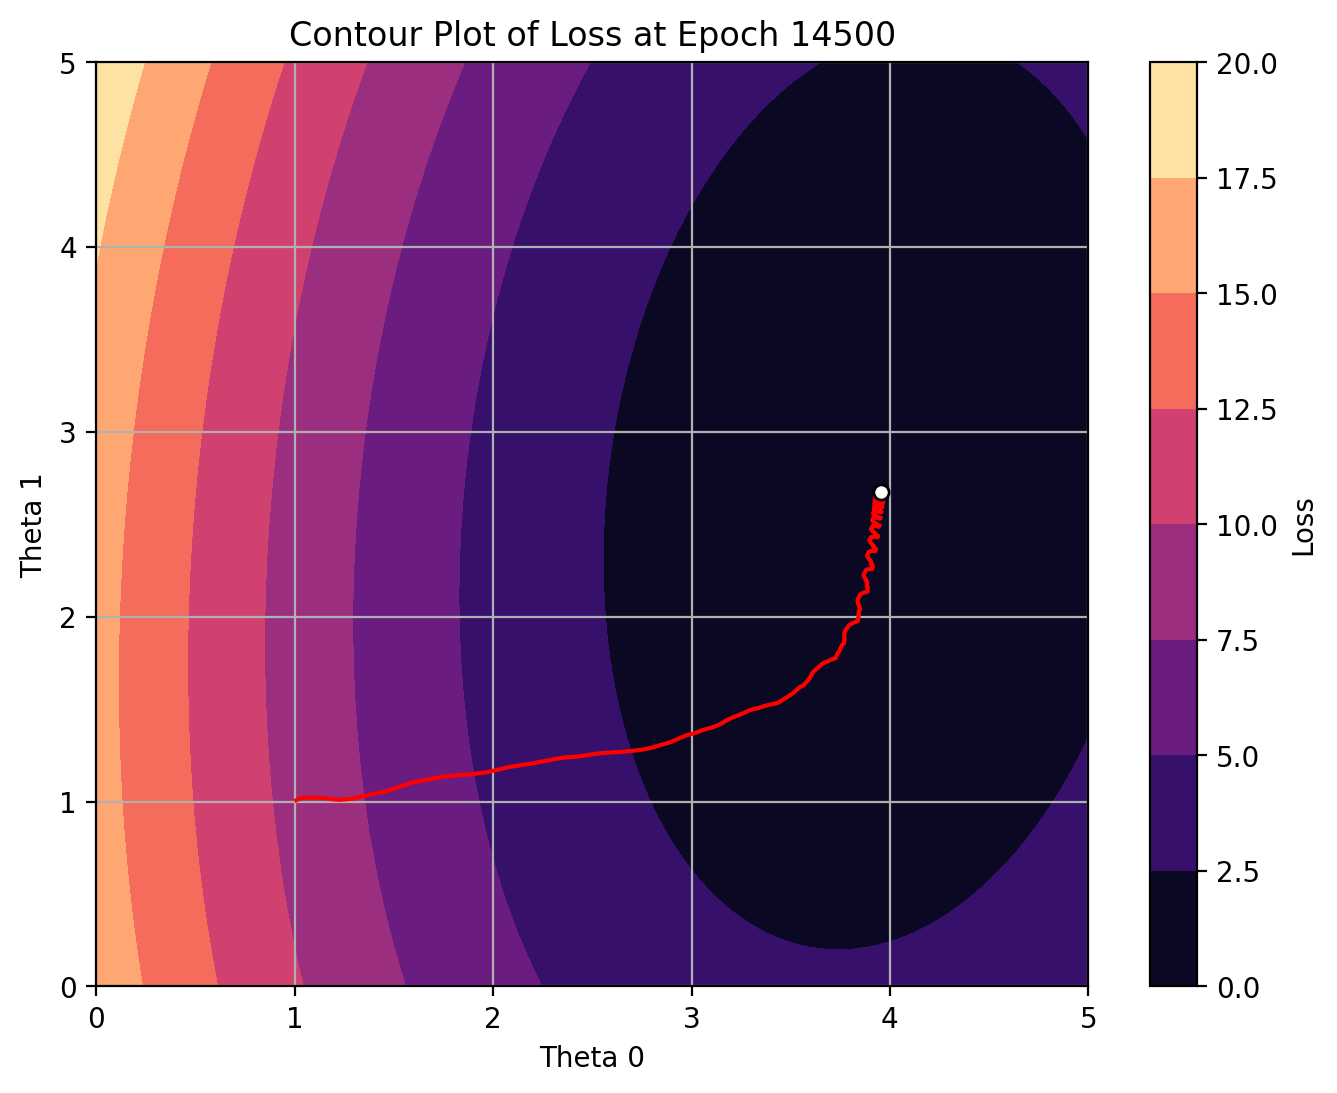

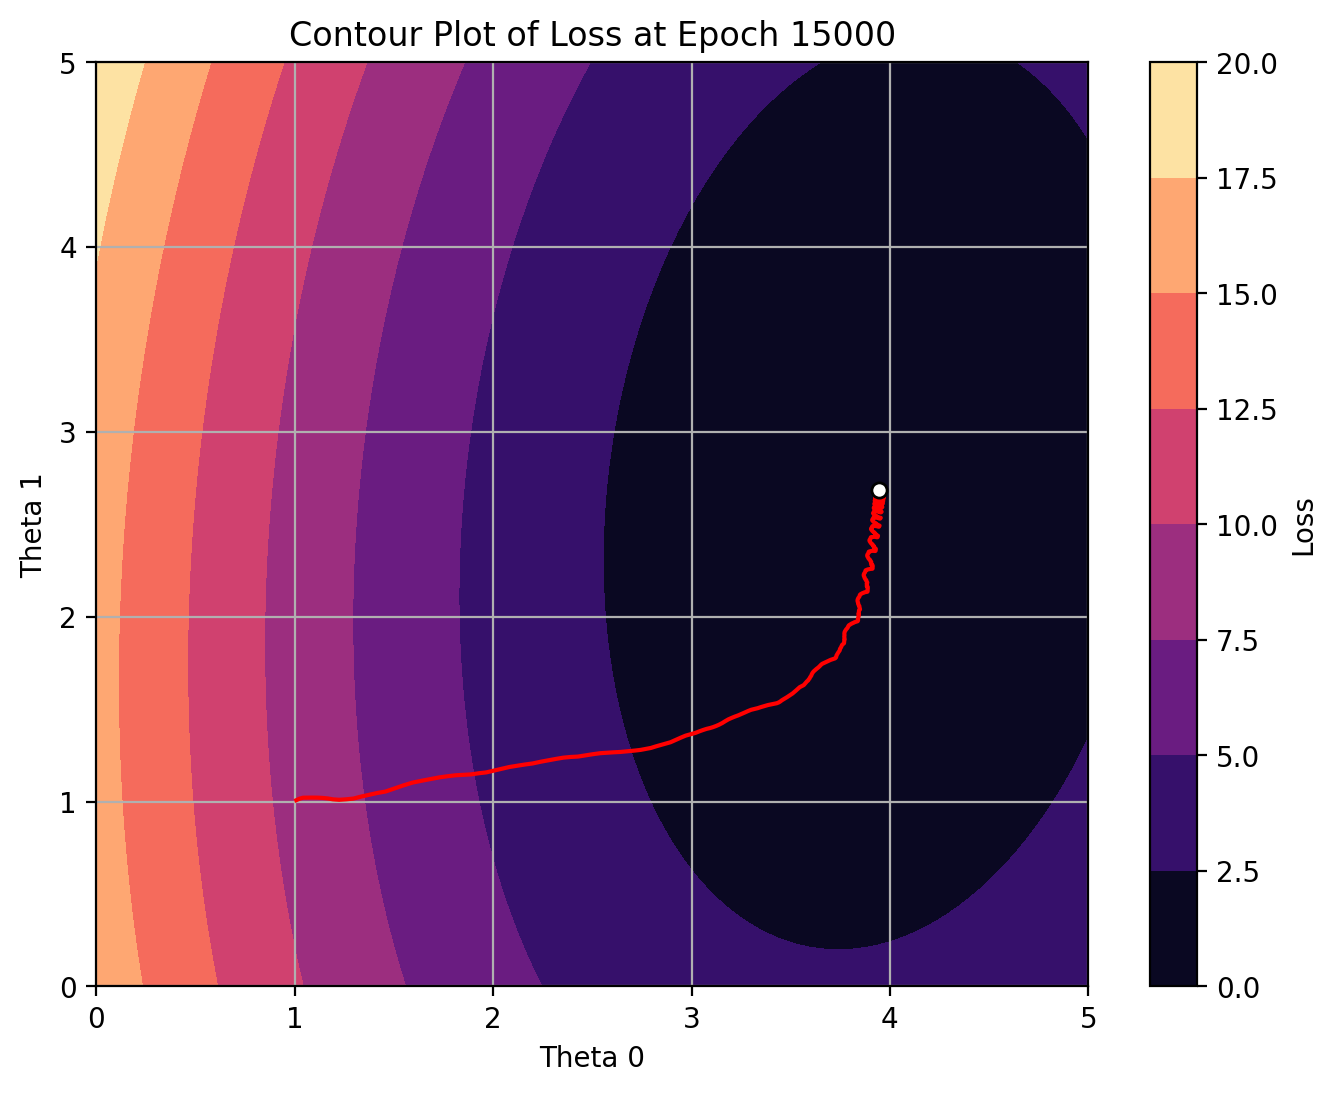

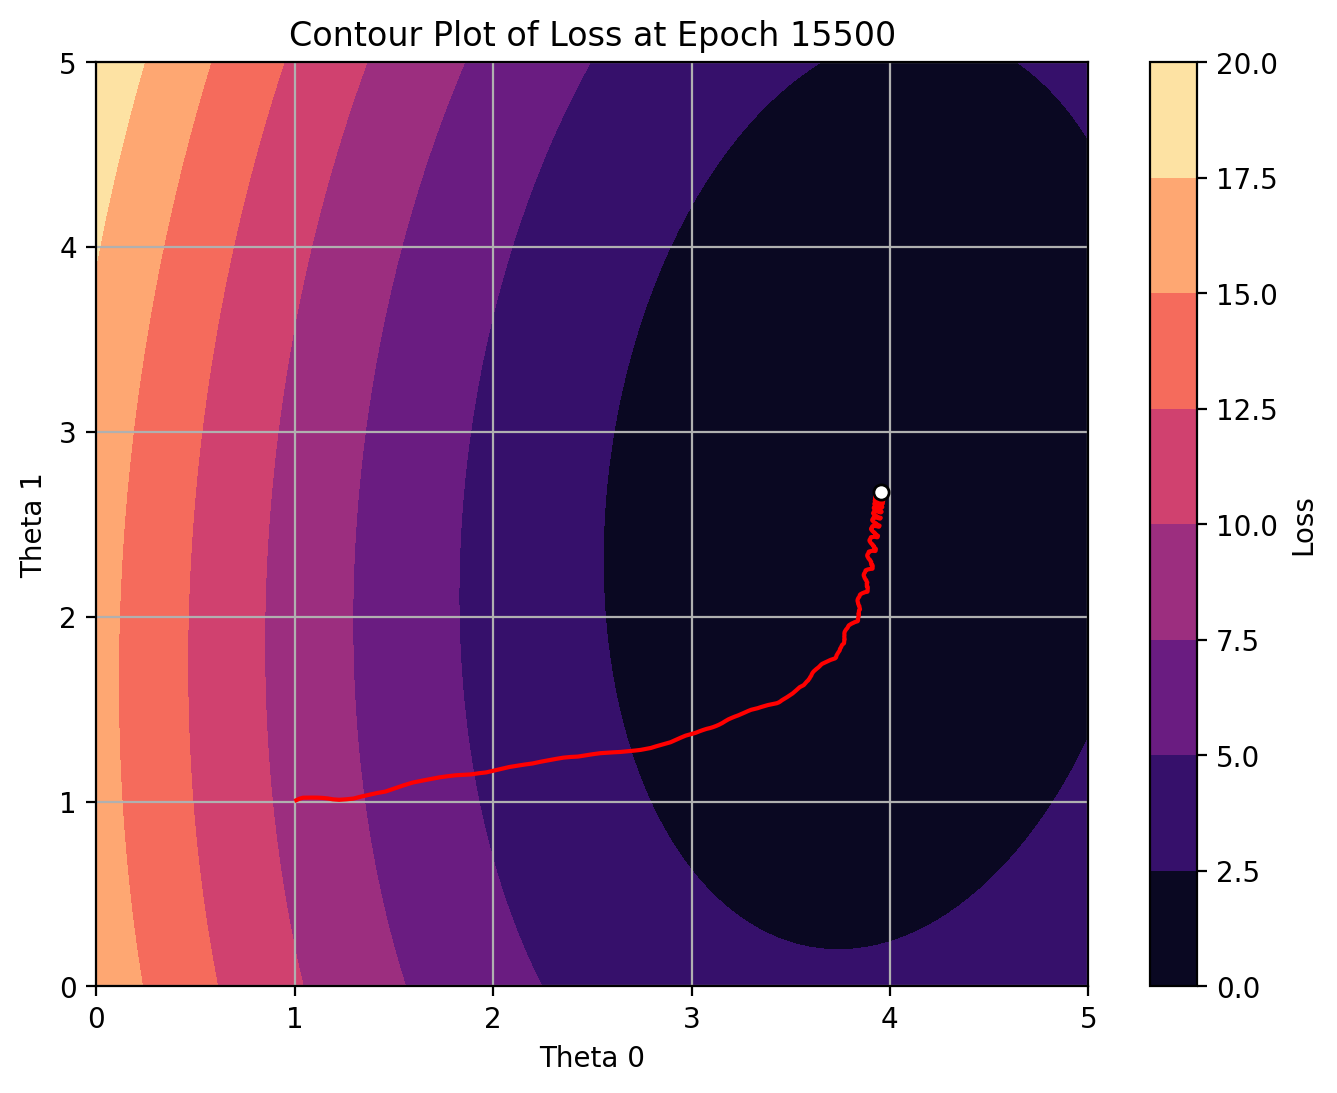

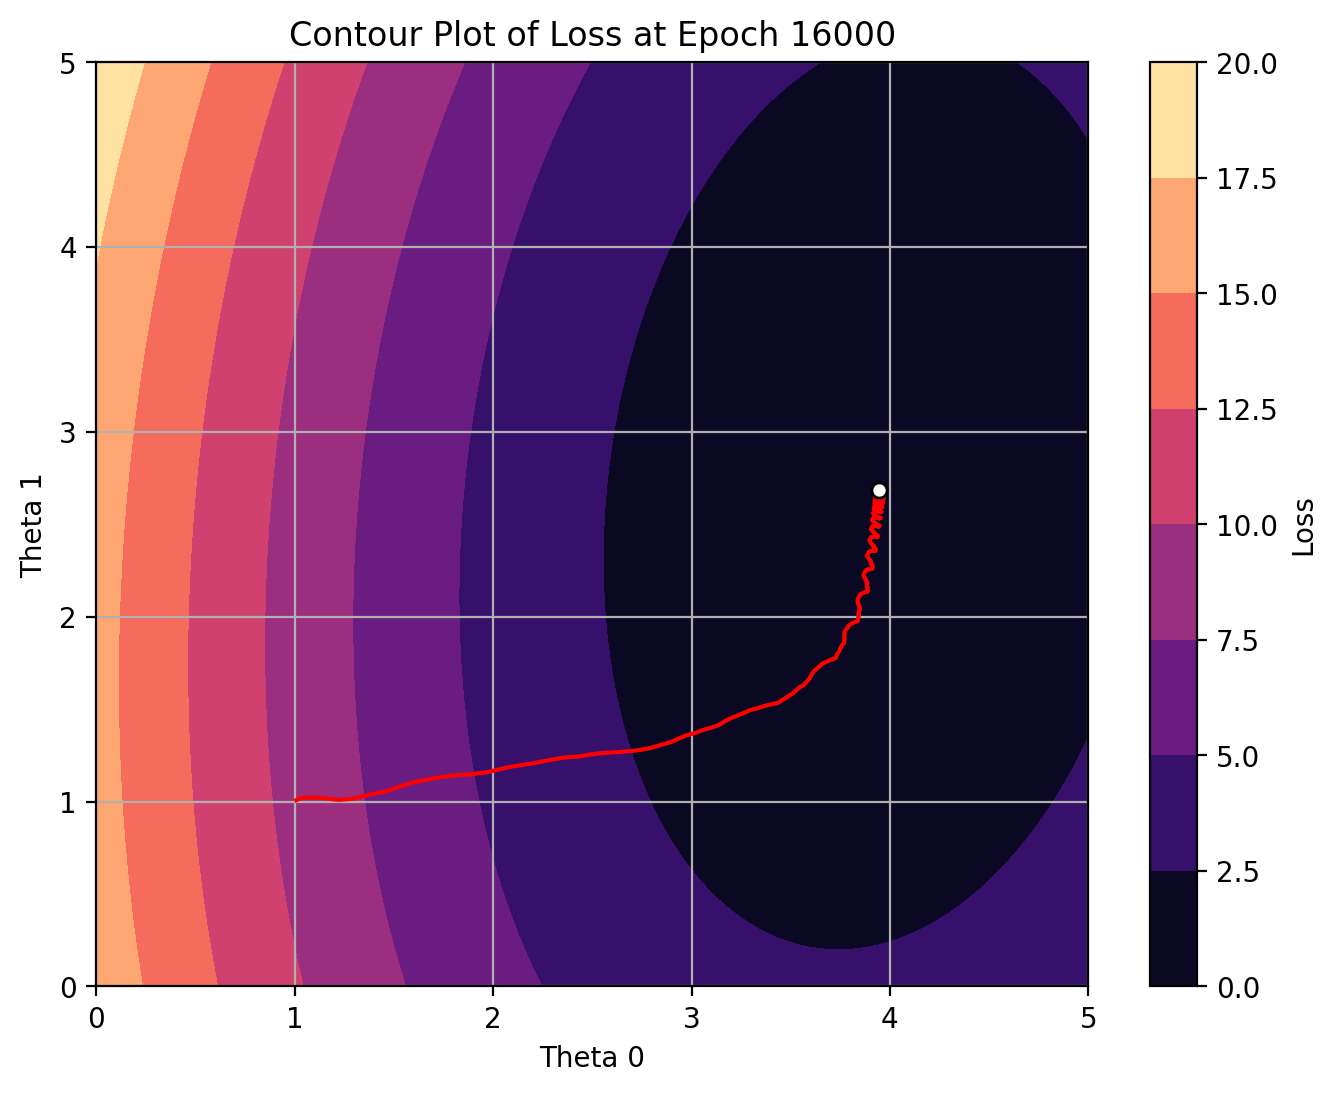

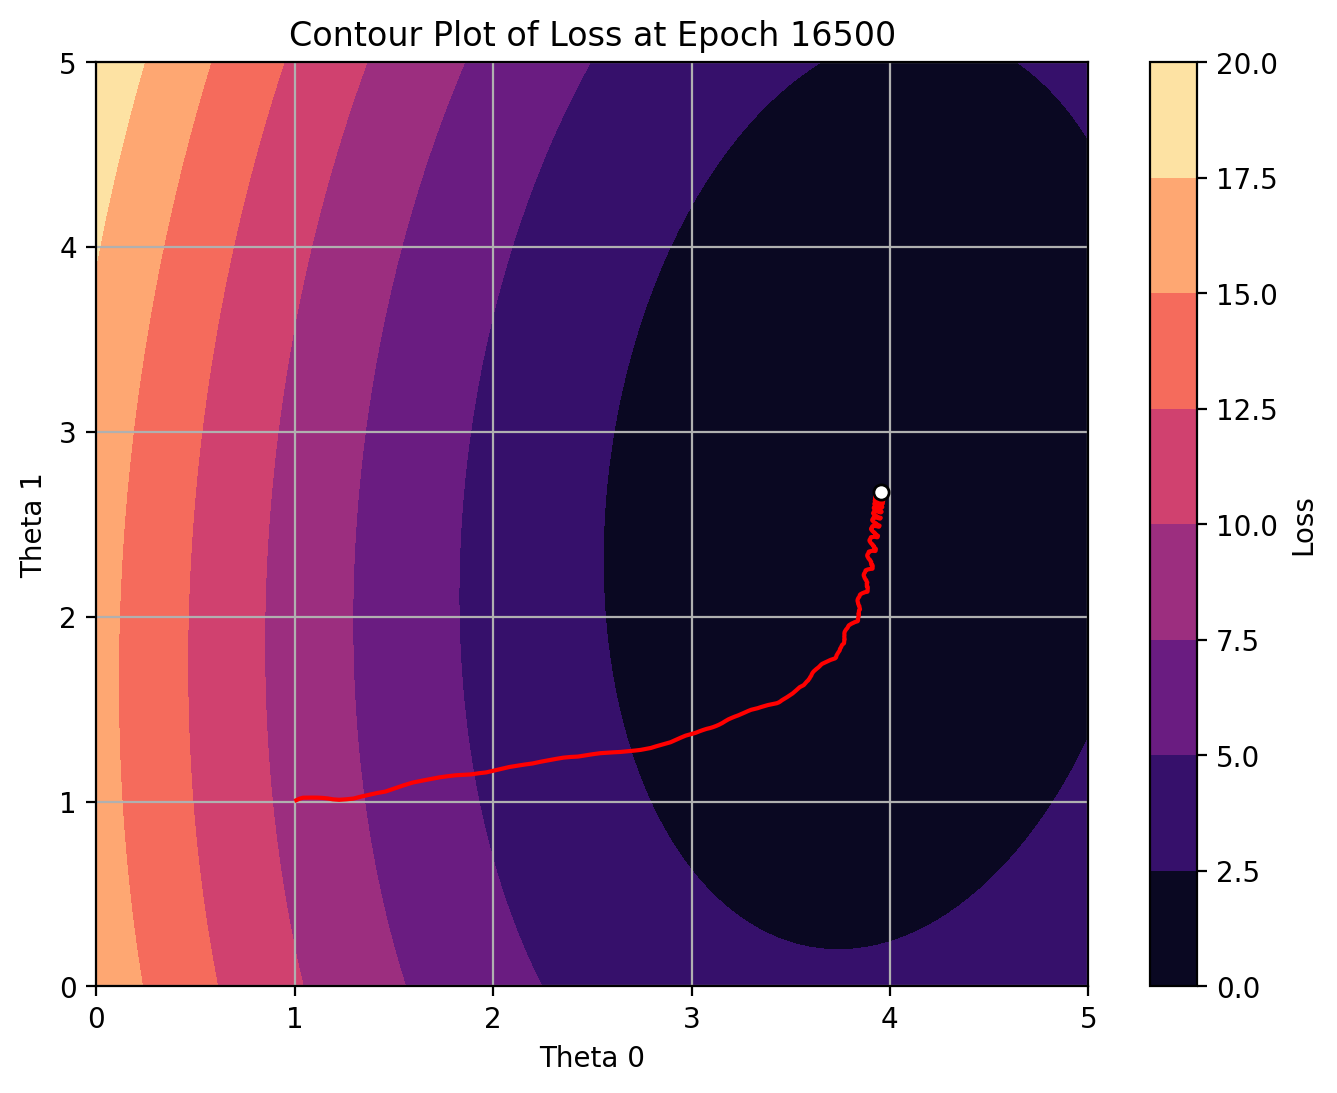

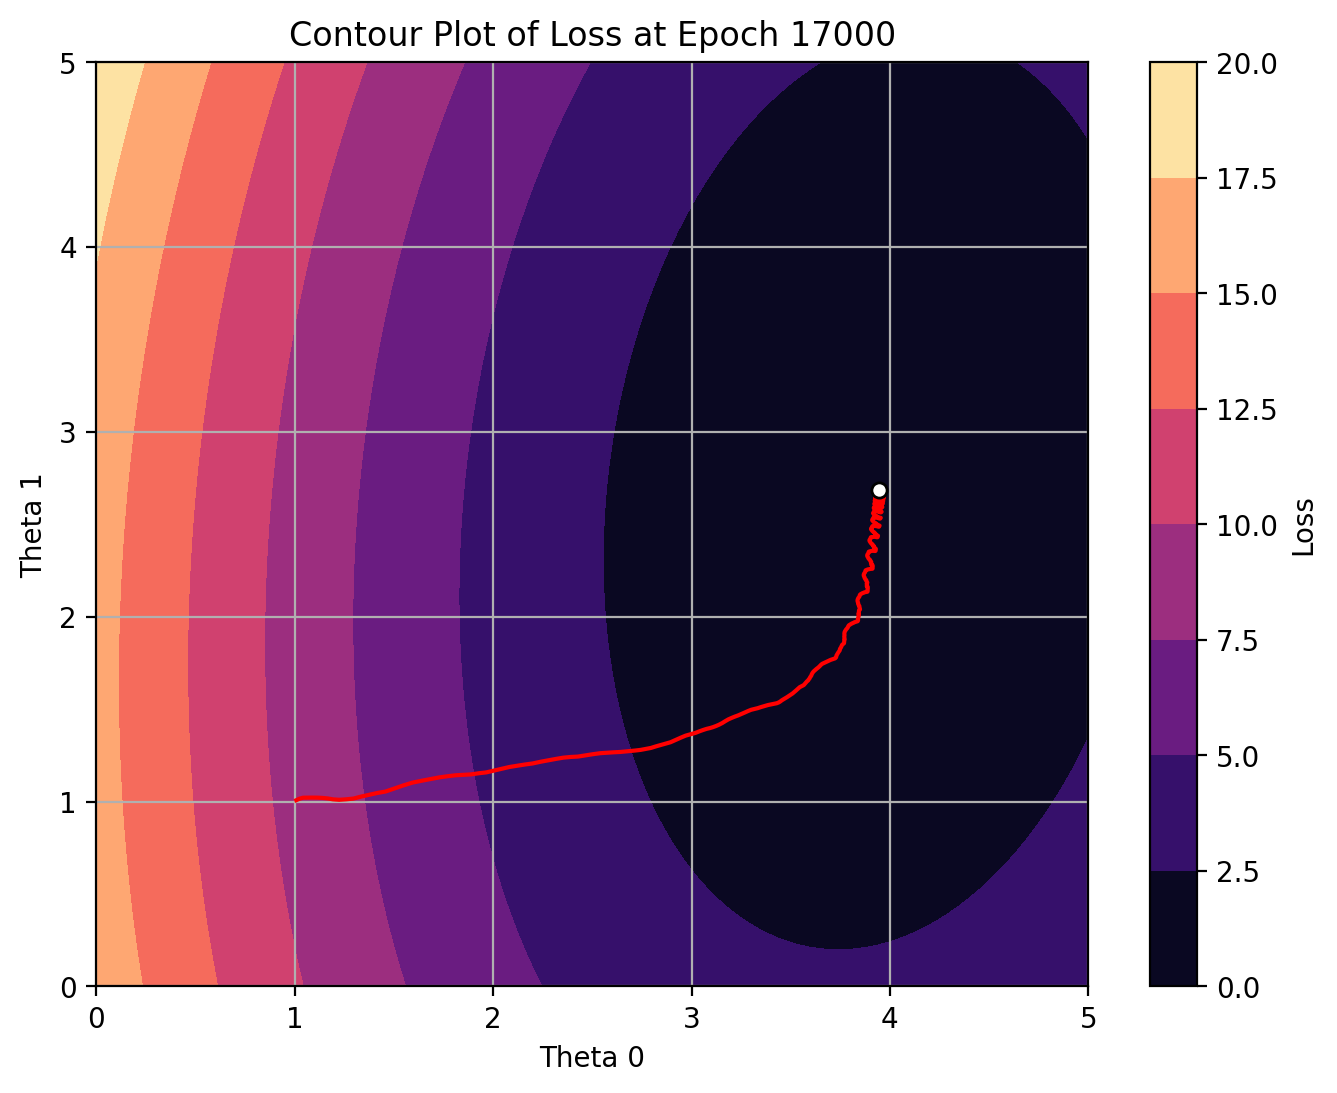

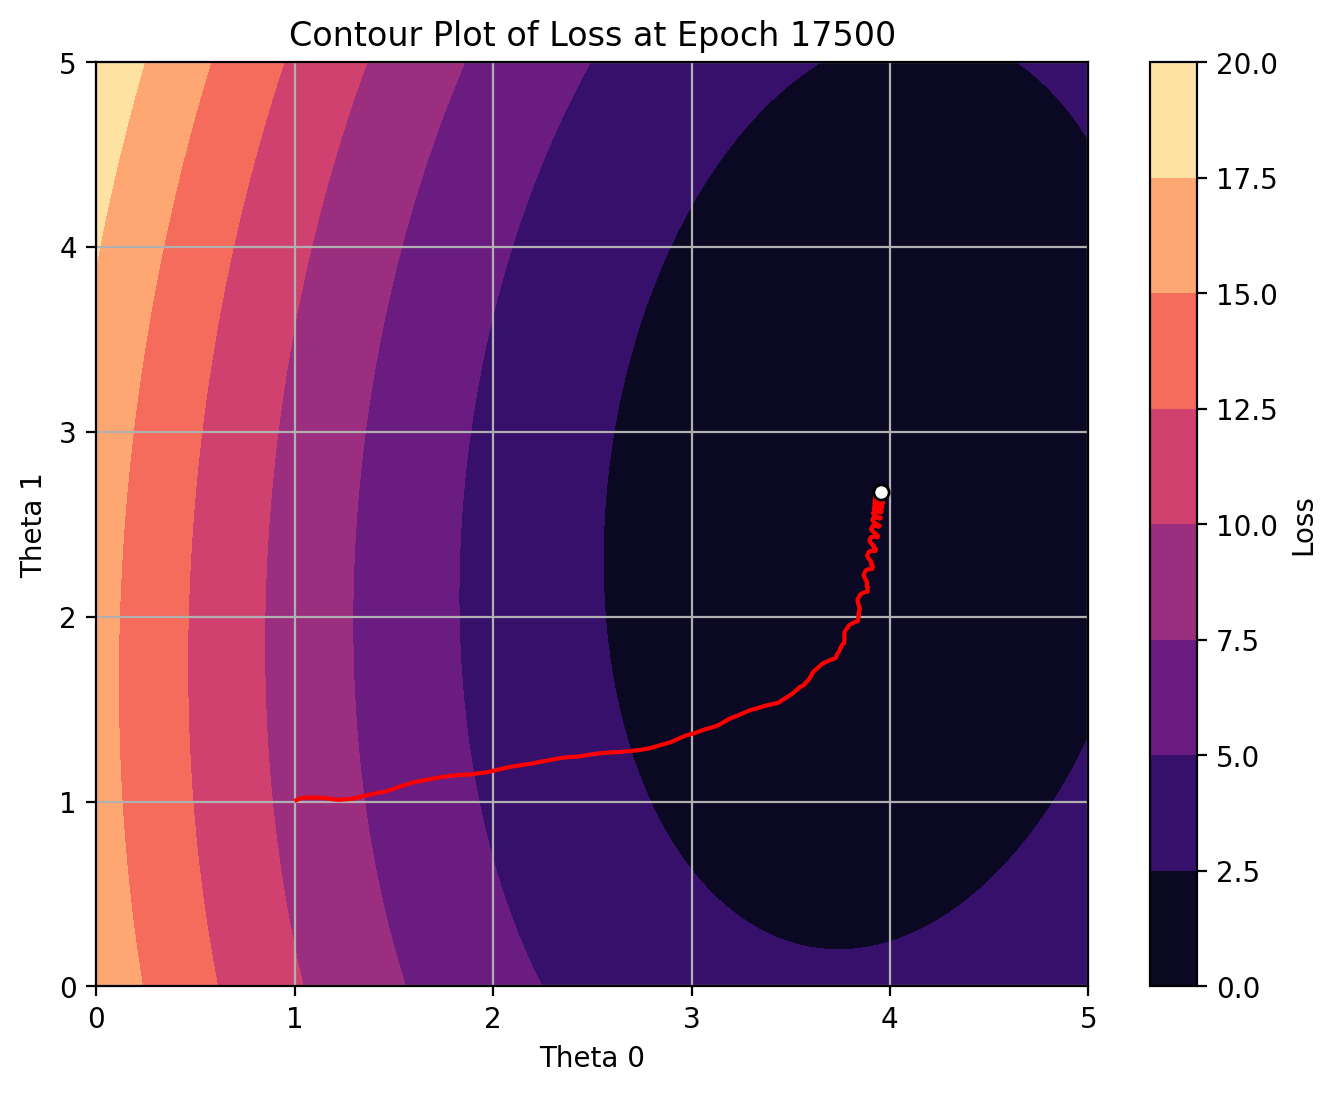

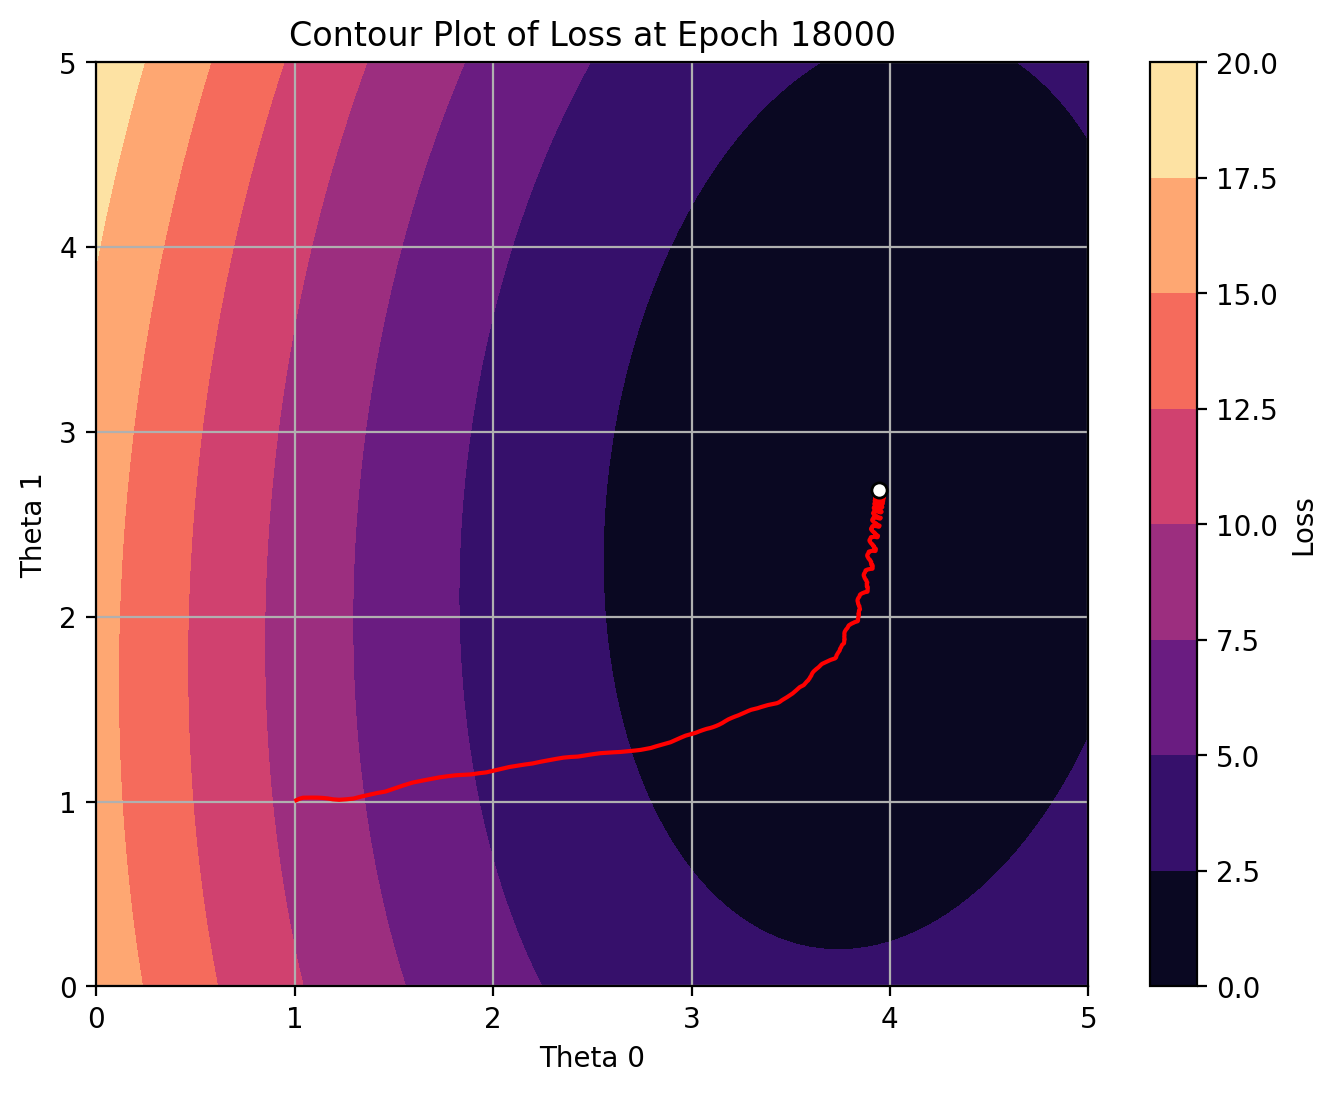

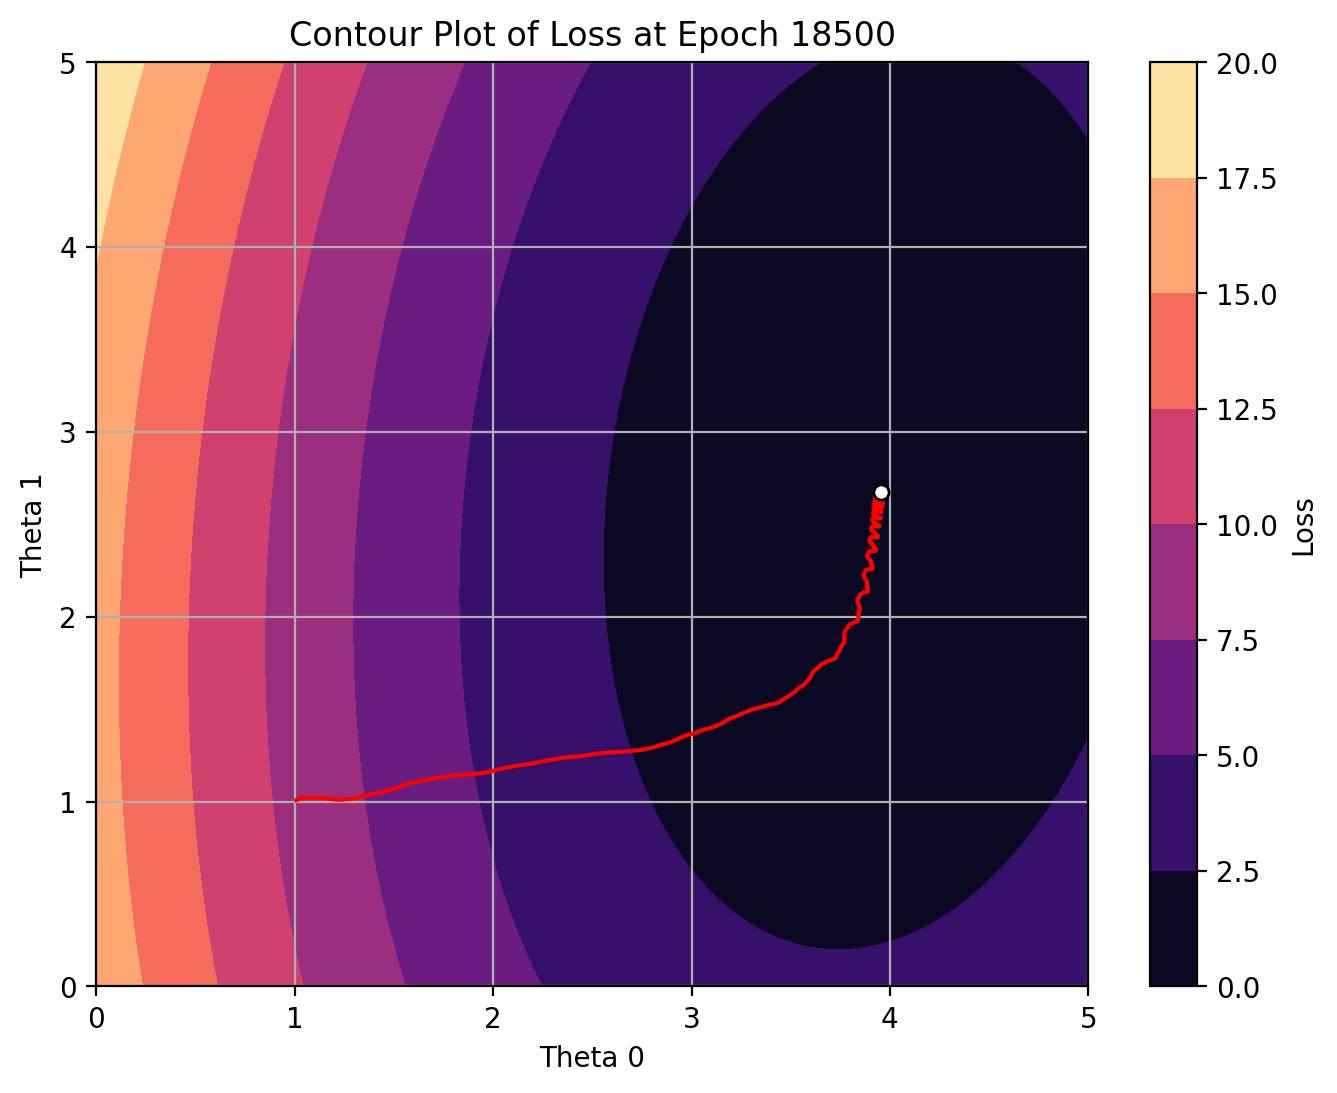

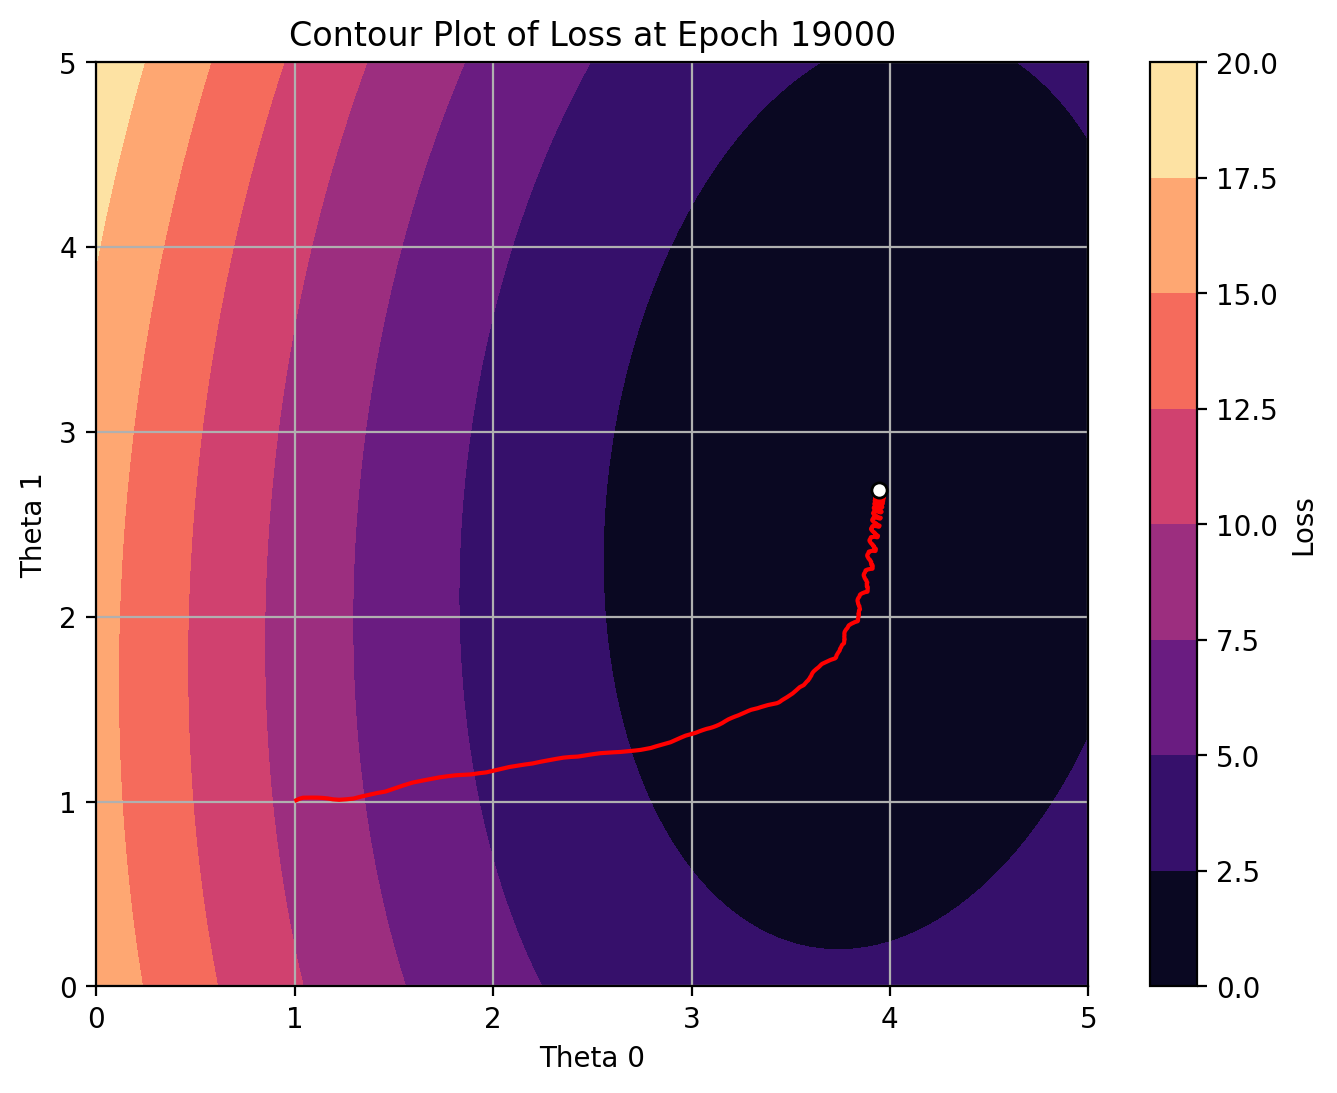

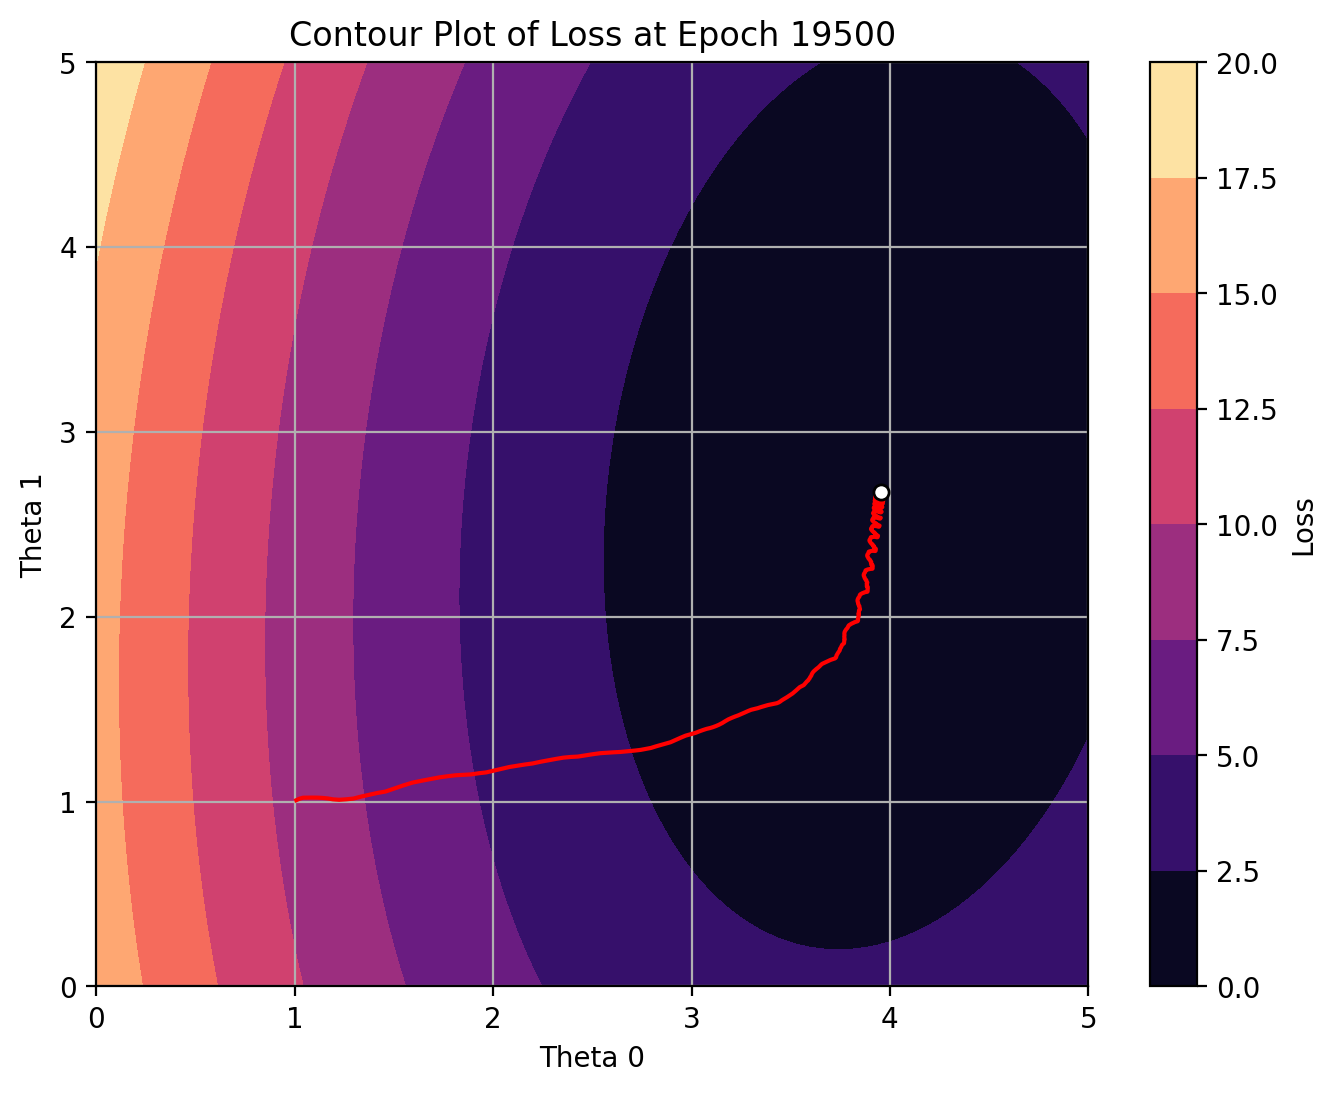

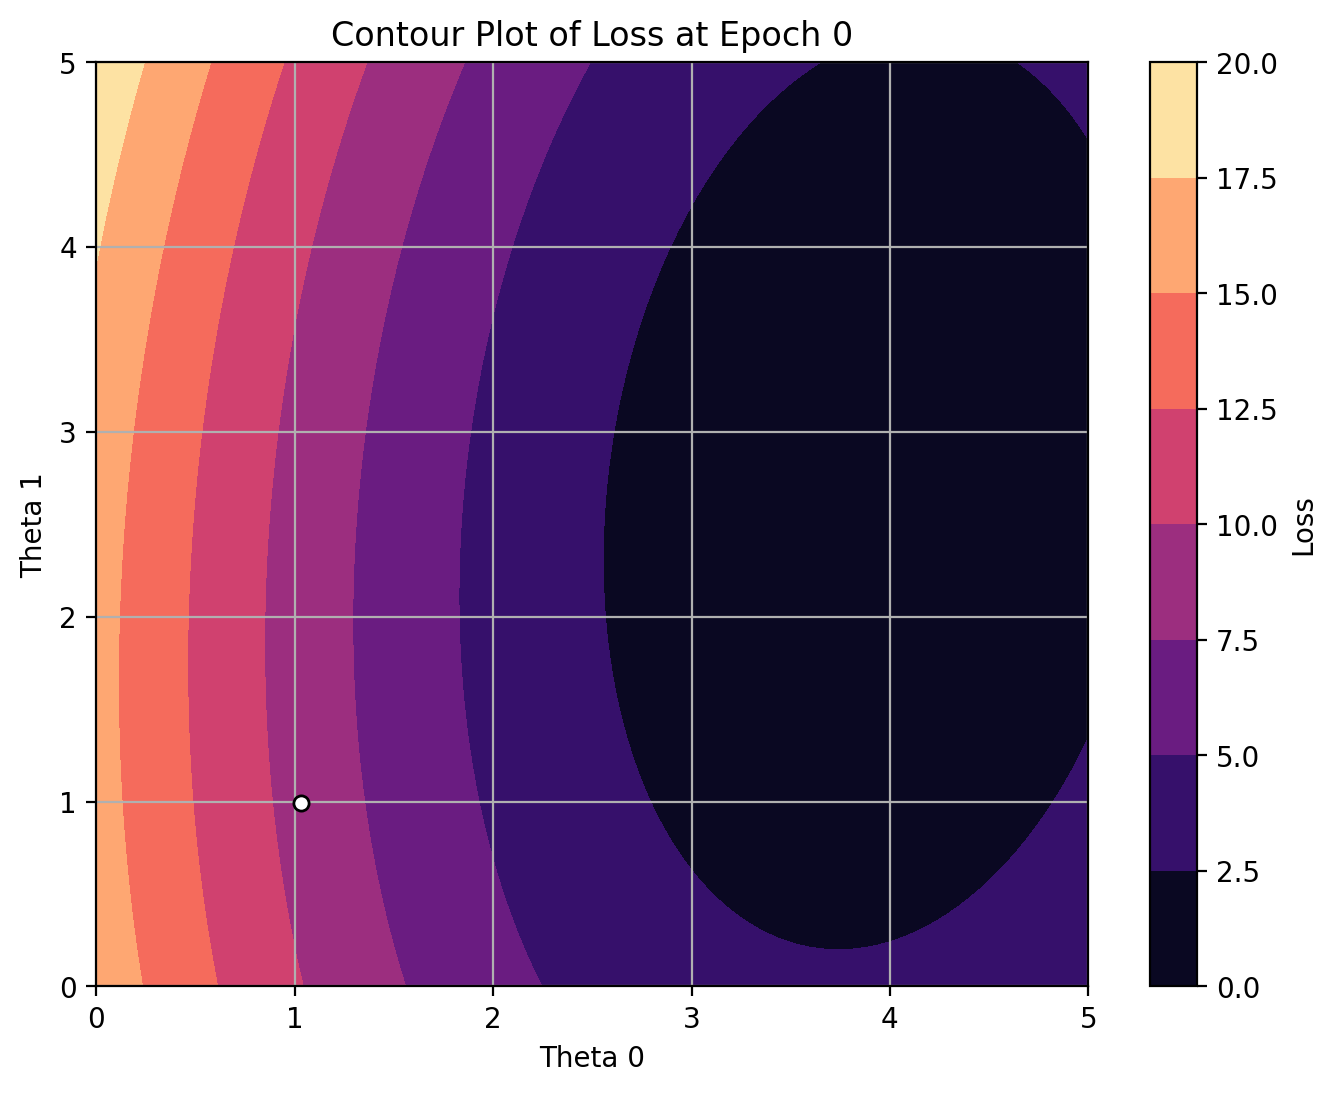

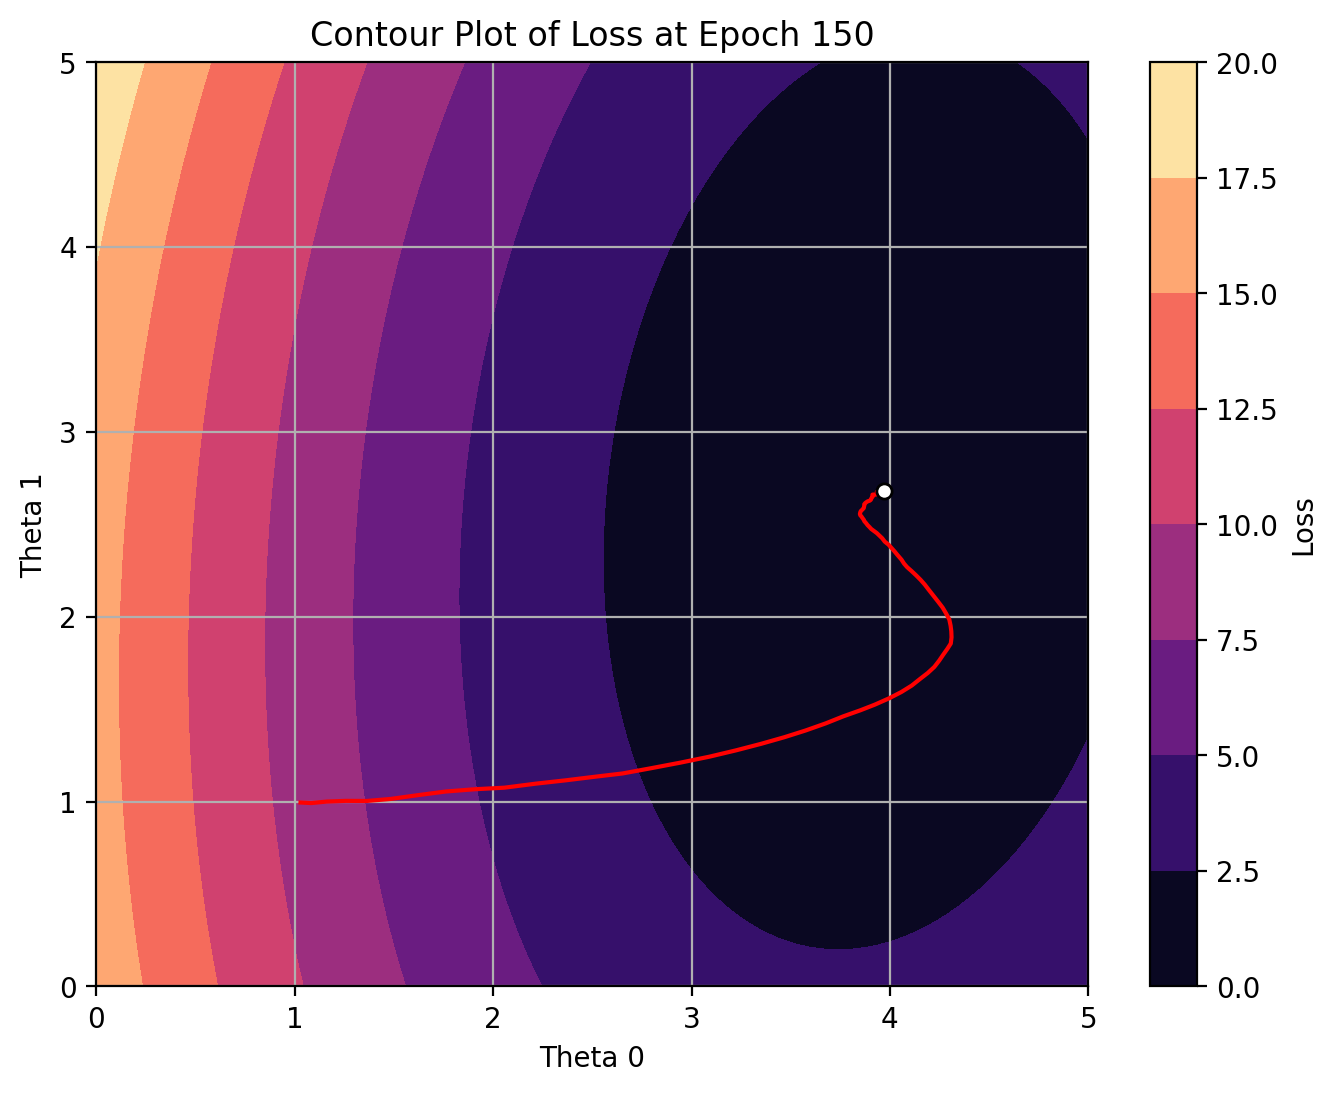

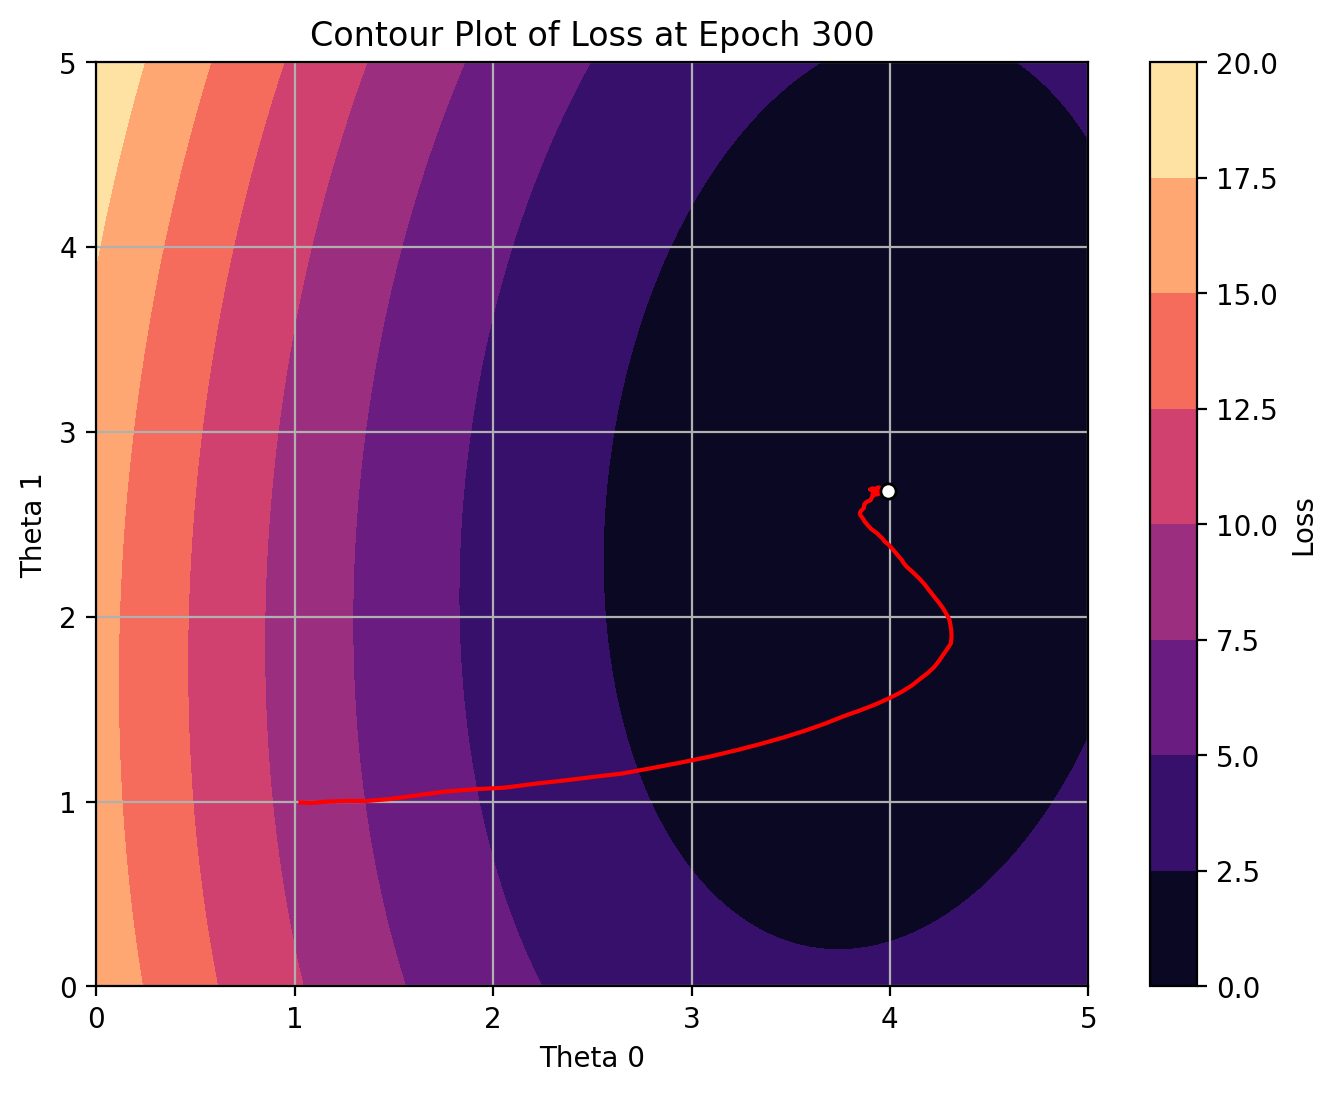

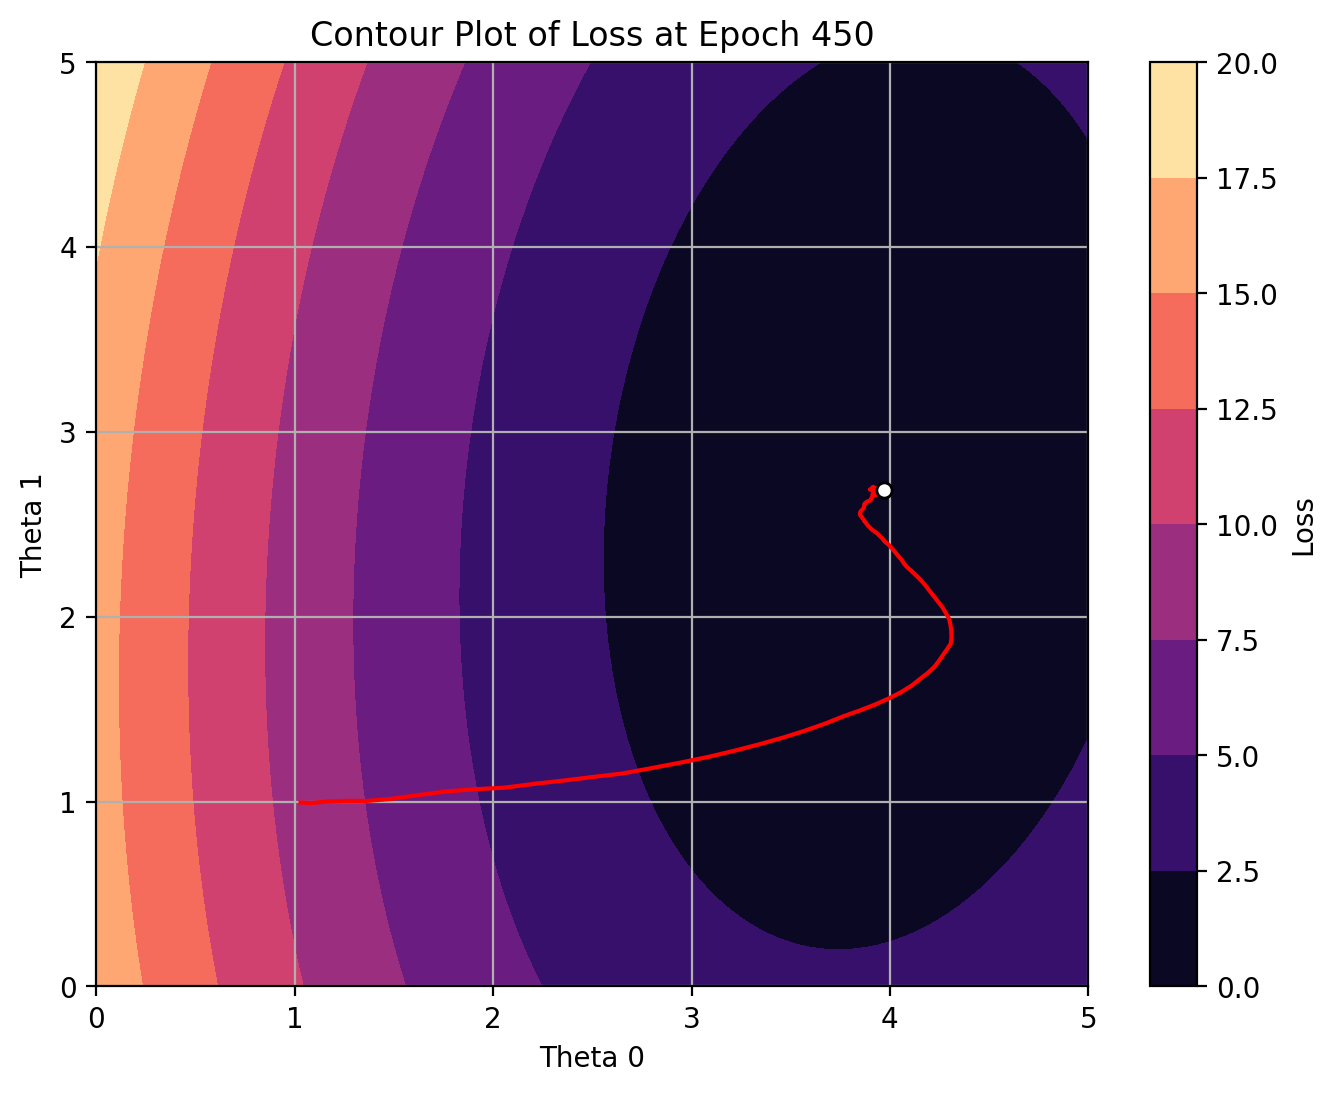

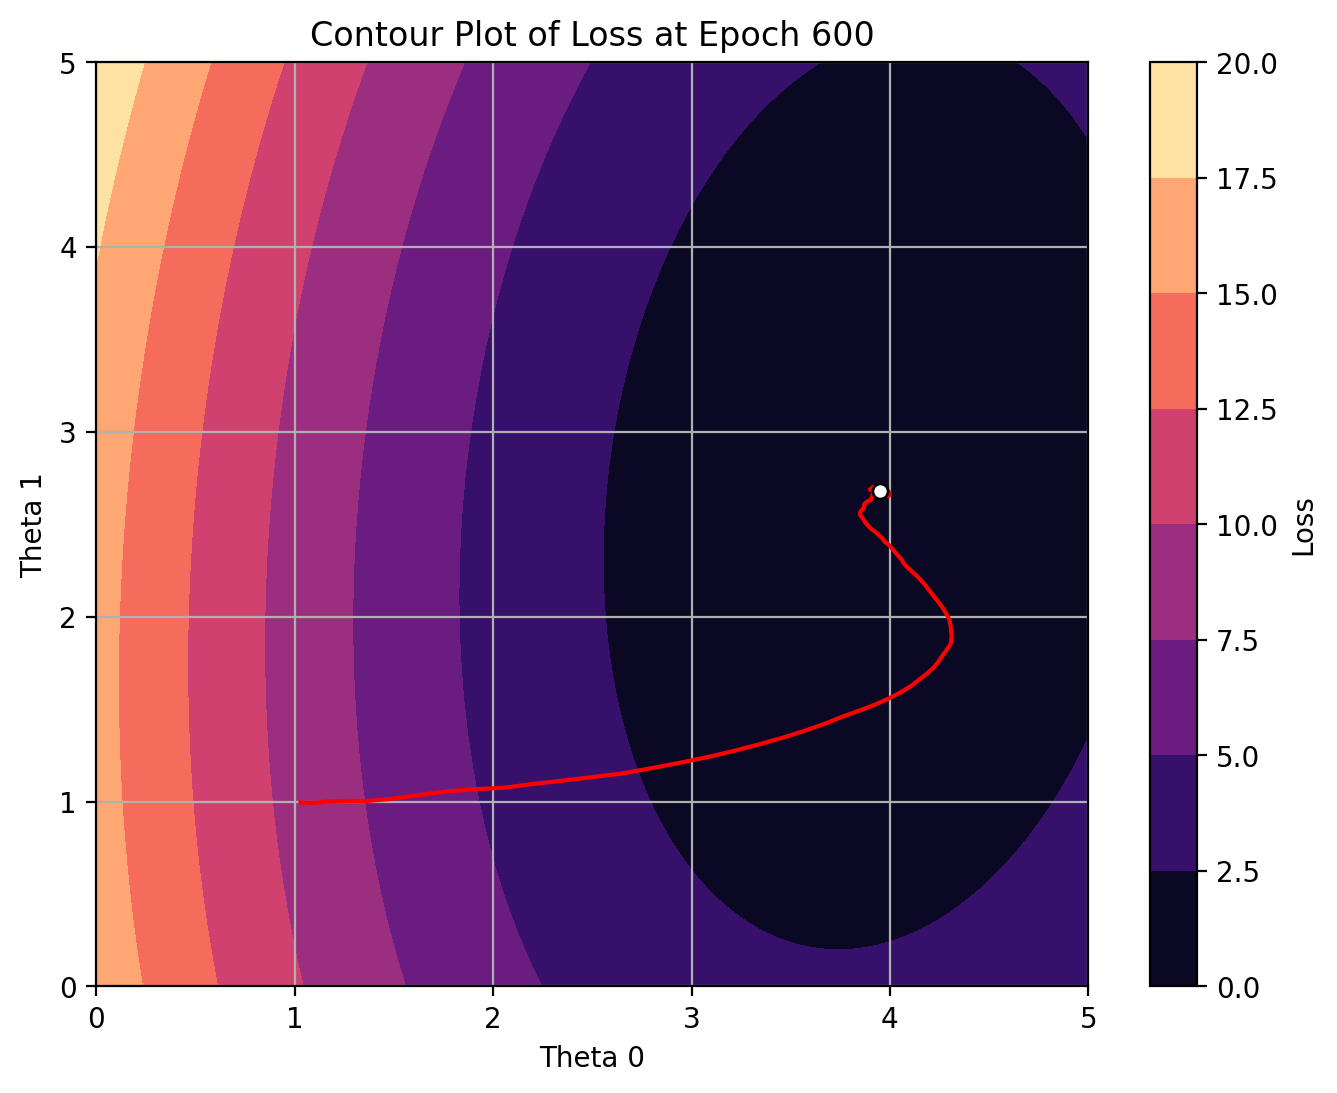

In [347]:
def create_contour_plot_show(epoch, a, b, grid_loss,
                         theta_0_c, theta_1_c, prev_theta_0, prev_theta_1,mode):

    plt.figure(figsize=(8, 6))

    plt.scatter(theta_0_c, theta_1_c, color='white', edgecolor='black', s=30, zorder=5)
    plt.contourf(a, b, grid_loss.T, cmap='magma')
    plt.plot(prev_theta_0, prev_theta_1, color='r')

    plt.colorbar(label='Loss')
    plt.title(f'Contour Plot of Loss at Epoch {epoch}')
    plt.xlabel('Theta 0')
    plt.ylabel('Theta 1')

    plt.grid(True)
    print(f'the value of theta0 for epoch {epoch} and {mode} : ', theta_0_c)
    print(f'the value of theta1 for epoch {epoch} and {mode} : ', theta_1_c)
    plt.show

#for full-batch
for epoch in range(0,120,24):

    create_contour_plot_show(epoch, a, b,
                         grid_loss, theta0_history_full_mom[epoch],
                         theta1_history_full_mom[epoch],
                         theta0_history_full_mom[:epoch],
                         theta1_history_full_mom[:epoch],'full_mom')
    
#for sgd
for epoch in range(0,epochs_stochastic_i_mom*40,500):

    create_contour_plot_show(epoch, a, b,
                         grid_loss, theta_0_history_sgd_mom[epoch],
                         theta_1_history_sgd_mom[epoch],
                         theta_0_history_sgd_mom[:epoch],
                         theta_1_history_sgd_mom[:epoch],'sgd_mom')


#for mini
for epoch in range(0,epochs_mini_i_mom*8,150):

    create_contour_plot_show(epoch, a, b,
                         grid_loss, theta_0_history_mini_mom[epoch],
                         theta_1_history_mini_mom[epoch],
                         theta_0_history_mini_mom[:epoch],
                         theta_1_history_mini_mom[:epoch],
                         'mini_mom')

In general the gradient descent with momentum should be converging faster than the vanilla gradient descent.

In some cases the estimator shoots value at higher than required, due to momentum.